## Letter Chunks Model: Mallet

## Resources

In [1]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240701_PhD_AltDiaChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns)

1023

In [6]:
# Get it back
#with open("20240405_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    #data_lemmatized = pickle.load(fp)

In [7]:
#len(data_lemmatized[0])

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## 1. LDA Mallet (Nouns Only)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [9]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(4887 unique tokens: ['ache', 'bed', 'boy', 'breakfast', 'candle']...)


In [10]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.52523
<20> LL/token: -8.20739
<30> LL/token: -7.99677
<40> LL/token: -7.87222

0	10	tea horse rain wind dinner water fire thing bread buggy black road hand clothe sand weather bath lot bed wash 
1	10	town port pound letter house club wheat office train wife flour question motion govt bank church meeting mill paper party 
2	10	home work truck bed people dinner land mill place side row sleep woman aunt lot gun point mother ship wine 
3	10	dinner home breakfast boy mail walk bed horse station room washing fish tea garden thing child kitchen flower job trouble 
4	10	weather bed child breakfast home dress work boat sleep place bath drive house friend beach rest man account ride dinner 

<50> LL/token: -7.79987
<60> LL/token: -7.76198
<70> LL/token: -7.71799
<80> LL/token: -7.70124
<90> LL/token: -7.67333

0	10	horse tea rain dinner wind breakfast weather fire lot bread water 

<570> LL/token: -7.528
<580> LL/token: -7.52774
<590> LL/token: -7.52016

0	10	horse weather rain water boy wind thing lot fire bread buggy road hand black head dinner cake sand sheep wash 
1	10	port town pound club house wheat letter office train wife flour question motion govt bank meeting party land paper cabinet 
2	10	home work place letter mill truck boat beach board side book wood game aunt bed gun wine dust order chapel 
3	10	dinner tea bed breakfast mail sleep room bath man clothe station rest washing fish girl vessel job store kitchen woman 
4	10	child walk house dress garden people drive friend talk trouble row church flower ride town note fear glass call school 

<600> LL/token: -7.52508
<610> LL/token: -7.533
<620> LL/token: -7.52681
<630> LL/token: -7.52639
<640> LL/token: -7.52859

0	10	horse weather rain water boy wind dinner thing fire lot bread buggy road hand black head cake sand sheep wash 
1	10	port pound town club wheat house office train wife letter flour question

<110> LL/token: -7.65537
<120> LL/token: -7.64029
<130> LL/token: -7.63547
<140> LL/token: -7.64448

0	8.33333	house office question friend hand govt cabinet matter aunt sale gun boat note treasurer point member bed life door river 
1	8.33333	horse thing boy wind rain fire room man road black buggy station rest bay sand sheep wash supper kitchen girl 
2	8.33333	home letter weather people bank rain paper vessel row ride church ton change call book bed school leave family glass 
3	8.33333	town port pound wheat club train mill flour wife truck motion meeting party land letter board business price ship order 
4	8.33333	work home water child walk dress place garden drive talk deal wood side lunch woman game cooking wine mama dog 
5	8.33333	dinner tea bed breakfast weather mail sleep bath bread clothe head washing cake lot fish job trouble meat flower bird 

<150> LL/token: -7.62313
<160> LL/token: -7.61874
<170> LL/token: -7.61865
<180> LL/token: -7.61469
<190> LL/token: -7.59712

0	8.33333

<610> LL/token: -7.54884
<620> LL/token: -7.54759
<630> LL/token: -7.53754
<640> LL/token: -7.5399

0	8.33333	house office question motion govt club paper cabinet business matter return treasurer point member note vote genl report mail notice 
1	8.33333	horse boy wind water room fire man buggy road black station bay sand rest wash supper girl start thing mother 
2	8.33333	home rain work weather bed people sleep truck vessel book ride fear wine glass shower leave family sea change river 
3	8.33333	town letter port pound wheat train mill wife flour club church bank meeting land price sale ton ship board school 
4	8.33333	child walk place dress dinner boat drive beach friend talk deal garden wood row flower trouble woman game side aunt 
5	8.33333	dinner tea breakfast bed mail bath lot bread thing clothe weather head washing hand cake fish job meat kitchen cooking 

<650> LL/token: -7.53747
<660> LL/token: -7.54374
<670> LL/token: -7.53912
<680> LL/token: -7.53096
<690> LL/token: -7.53141


<60> LL/token: -7.77332
<70> LL/token: -7.74194
<80> LL/token: -7.72148
<90> LL/token: -7.70515

0	7.14286	club house office mill flour pound motion govt wife church party board wheat cabinet matter sale ton ship wine member 
1	7.14286	bed mail house weather room question talk letter vessel rain hand return note account change place glass poll family man 
2	7.14286	town port letter pound train wheat bank meeting paper land wife price treasurer doctor river genl lunched college life load 
3	7.14286	tea dinner breakfast weather bath wind thing lot bread garden clothe black bed washing cake sleep job wood meat flower 
4	7.14286	dinner child walk dress friend man trouble people row ride woman drive girl fish call mama trip pain sea bed 
5	7.14286	home work place truck boat thing side kitchen aunt gun bed game people deal chapel bird sister dog door case 
6	7.14286	horse water boy rain breakfast buggy road station sleep bay sand fire sheep wash supper rest start fear hand mother 

<100> LL/

<460> LL/token: -7.58283
<470> LL/token: -7.57165
<480> LL/token: -7.56326
<490> LL/token: -7.56482

0	7.14286	house club office flour question motion govt party cabinet matter return ton treasurer member whist order vote genl report lunched 
1	7.14286	bed weather rain mail room man hand place beach house letter board vessel fear wine change glass family fellow door 
2	7.14286	town port pound letter wheat train wife church bank mill meeting paper land price ship account school doctor sale share 
3	7.14286	dinner tea breakfast bath lot thing bread sleep clothe black bed wind washing cake fish job kitchen meat cooking cook 
4	7.14286	child home walk dinner people dress drive friend talk store trouble row flower ride call poll mama buggy pair life 
5	7.14286	home work truck boat thing side wood book mill garden game aunt gun bird place chapel dog sea sleep river 
6	7.14286	horse water boy breakfast fire road station rest wind buggy sand sheep wash supper girl start bay woman mother tank 


<860> LL/token: -7.54342
<870> LL/token: -7.54617
<880> LL/token: -7.54208
<890> LL/token: -7.54219

0	7.14286	house club office question motion govt paper cabinet business matter return treasurer member whist vote genl report lunched notice railway 
1	7.14286	bed weather rain wind mail sleep room people man hand black bay vessel fear change shower dust family glass board 
2	7.14286	town port letter pound wheat train flour wife mill church bank meeting land price sale ton ship party school doctor 
3	7.14286	dinner tea breakfast bath bread lot clothe washing cake fish job thing meat kitchen head cooking bird cook sister trip 
4	7.14286	child home walk dress garden drive friend talk dinner row flower ride buggy call leave poll mama pair gentleman store 
5	7.14286	home work place thing truck boat beach deal book wood water side game aunt gun order chapel dog fellow sea 
6	7.14286	horse boy water road fire station rest sand sheep wash buggy supper girl breakfast rain lunch start woman moth

<260> LL/token: -7.63597
<270> LL/token: -7.62349
<280> LL/token: -7.62658
<290> LL/token: -7.62352

0	6.25	home church dress drive friend talk town row ride party shower glass poll point wine mama life news door note 
1	6.25	port pound town club wheat office train wife flour question govt bank land motion mill paper cabinet business matter price 
2	6.25	walk room man buggy people road station tea cake girl supper lunch woman store fear mother family sister flower police 
3	6.25	house letter meeting return bed member vote report order affair writing speech state case debate table resolution effect rise board 
4	6.25	tea dinner bed breakfast bath lot thing bread clothe washing fish wash job meat kitchen wind cooking head arm bedroom 
5	6.25	horse rain water boy fire wind hand black bay sand vessel place trouble sleep dust thunder tank camp rest scrub 
6	6.25	weather dinner child mail garden sleep breakfast sheep cook head bird rest call change bed fellow thing floor gentleman leave 
7	6

<660> LL/token: -7.57361
<670> LL/token: -7.57992
<680> LL/token: -7.57268
<690> LL/token: -7.57435

0	6.25	home dress walk garden drive friend talk town row flower ride wine call glass leave poll mama life door church 
1	6.25	port town pound letter wheat train wife flour club mill bank land church meeting price sale ton ship account party 
2	6.25	horse room people man road buggy house station place wash supper girl trouble thing lunch woman fear mother family police 
3	6.25	house office question club motion govt cabinet matter treasurer member paper business vote genl report return notice speech view state 
4	6.25	tea dinner breakfast bath bread lot clothe head washing thing cake fish job meat kitchen cooking trip pain arm bedroom 
5	6.25	horse rain boy water wind fire hand black bay rest sand sheep thing dust thunder tank foot camp start scrub 
6	6.25	bed weather dinner child mail sleep breakfast letter vessel cook change bird shower pair showery care floor writing bottle sewing 
7	6

<60> LL/token: -7.87055
<70> LL/token: -7.82619
<80> LL/token: -7.81849
<90> LL/token: -7.79352

0	5.55556	work thing fire bread buggy boat cake lot meat ride walk beach aunt gun game cooking dog door care scrub 
1	5.55556	dinner tea weather hand child rest breakfast sand girl job kitchen garden leave thunder tank pain arm milk mutton feed 
2	5.55556	dress home child walk meeting friend place row drive water wine call poll family mama vote store gentleman state table 
3	5.55556	rain mail bath house home bed sheep land deal point fear glass man writing bottle pair water case bird answer 
4	5.55556	home house bed man talk trouble garden flower people cook return life sea work showery foot drink woman read article 
5	5.55556	town club port office train wife question motion govt bank pound house cabinet matter price sale party treasurer member whist 
6	5.55556	horse boy room water road station place supper people sleep start lunch thing black fellow dust police camp floor bedroom 
7	5.5555

<410> LL/token: -7.62339
<420> LL/token: -7.62195
<430> LL/token: -7.62763
<440> LL/token: -7.6234

0	5.55556	work fire thing water wind truck boat side wood deal game aunt cooking gun mill beach chapel dog fellow door 
1	5.55556	dinner tea bread room hand black sand sheep rest girl breakfast job meat kitchen boy cook tank pain thunder milk 
2	5.55556	child walk dress drive friend row church ride call store poll family mama life gentleman party finish state read visit 
3	5.55556	rain bed mail letter man house work place fear glass shower book point bird care note pair writing heat dinner 
4	5.55556	home garden talk people trouble flower change leave sea return showery plant tree message round turn light catch mine coat 
5	5.55556	house club office wife question motion govt cabinet business matter price treasurer account member whist party vote share genl report 
6	5.55556	horse boy buggy road water station thing cake supper people place start woman board police baby lunch camp drink so

<760> LL/token: -7.6319
<770> LL/token: -7.63042
<780> LL/token: -7.62757
<790> LL/token: -7.62864

0	5.55556	work home truck boat thing wood side mill water game fire gun aunt beach wind dust chapel dog fellow river 
1	5.55556	tea dinner room bread hand black breakfast cake fire sheep rest girl job meat kitchen cook bird tank pain arm 
2	5.55556	child walk dress drive friend church talk town row ride call poll mama life heat book gentleman party finish plant 
3	5.55556	rain weather bed mail letter place house vessel wife dinner note change shower man pair writing bottle state care country 
4	5.55556	home people garden trouble flower store glass leave door deal cold egg tree mind sea visit turn music light chair 
5	5.55556	house office club question motion govt paper cabinet matter treasurer return member party vote genl report business notice speech view 
6	5.55556	horse boy water buggy thing road station man sand supper start mother bay lunch house fear police board baby camp 
7	5.55

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.60058
<720> LL/token: -7.59593
<730> LL/token: -7.59162
<740> LL/token: -7.595

0	5	tea dinner breakfast bread clothe washing cake fish job meat kitchen wash cooking lot wind garden milk goat mutton sewing 
1	5	letter pound train wife flour mill meeting land business ship board school news money paper steamer interest arrangement bower reading 
2	5	town port wheat club church bank party price sale ton account whist doctor share order wine lunched affair railway tender 
3	5	home walk child dress drive talk garden row flower ride call glass poll mama deal door plant finish tree read 
4	5	home work truck boat side book wood game aunt gun mill chapel dog point load place rate river duck fellow 
5	5	bed dinner sleep bath hand lot head beach friend supper vessel weather change shower leave store life sea heat foot 
6	5	thing people place man house station child girl trouble lunch woman mother family sister dust rest police baby road drink 
7	5	house office question motion 

Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.86234
<20> LL/token: -8.36269
<30> LL/token: -8.14343
<40> LL/token: -7.99501

0	4.54545	letter mill town home bank boat sale game account glass point share vote doctor aunt news meeting money party book 
1	4.54545	hand dress head home bath row drive ride call dinner pain work care foot drink walk view cake race trip 
2	4.54545	child boy house board people mail ship mother change tank dinner trouble bed rain table family load note husband wife 
3	4.54545	dinner wind breakfast bread weather rain sheep washing boy fire bird fear supper store shower writing sewing child cold vessel 
4	4.54545	port pound town wheat train club flour land office letter price ton meeting whist party wife affair railway college tender 
5	4.54545	house office question motion govt letter wife cabinet matter club return treasurer member genl report lunched notice speech business state 
6	4.54545	

<310> LL/token: -7.63171
<320> LL/token: -7.64547
<330> LL/token: -7.63552
<340> LL/token: -7.64337

0	4.54545	letter town wife mill party paper ship sale account wine doctor business news church showery affair glass arrangement country reading 
1	4.54545	walk dinner dress hand garden work child row ride store deal call poll pain trip pair gentleman plant buggy foot 
2	4.54545	rain boy child rest vessel trouble beach water board mother change family house thunder sea tank care heat note table 
3	4.54545	dinner breakfast bread head weather mail sheep bath bird supper washing shower writing bedroom milk goat feed cold chop cup 
4	4.54545	port pound wheat train town flour bank meeting club land price ton whist share lunched railway tender school interest purchase 
5	4.54545	house office club question motion govt cabinet matter treasurer member vote report genl notice speech view debate governor case return 
6	4.54545	home people drive friend talk church flower leave door life mind read fe

<610> LL/token: -7.62734
<620> LL/token: -7.61641
<630> LL/token: -7.61591
<640> LL/token: -7.62564

0	4.54545	letter town wife mill party paper church ship account wine family doctor news affair board arrangement country reading business end 
1	4.54545	walk garden dress dinner child row ride buggy store deal call poll mama pair gentleman plant finish catch feel face 
2	4.54545	rain child boy water rest place beach vessel dinner people supper note mother thunder sea tank change board care heat 
3	4.54545	dinner weather breakfast bread hand head washing sheep bath cooking bird shower bedroom milk writing goat mutton feed potato stew 
4	4.54545	port pound wheat train flour club town bank meeting land price sale ton whist share lunched railway tender school steamer 
5	4.54545	house office question motion govt club cabinet matter treasurer member return vote genl report notice speech view case debate governor 
6	4.54545	home drive friend talk people flower leave glass door church tree mind

<910> LL/token: -7.61322
<920> LL/token: -7.61798
<930> LL/token: -7.62003
<940> LL/token: -7.61255

0	4.54545	letter town wife mill party church board business ship account wine school doctor news affair family note country bower reading 
1	4.54545	walk dress garden child store dinner row ride call buggy poll mama deal pair gentleman finish plant round sight feel 
2	4.54545	rain boy place water child beach dinner thing supper vessel trouble rest change dust thunder sea sister care tank sewing 
3	4.54545	dinner tea breakfast bread hand bath weather washing sheep meat cooking shower pain bedroom milk writing goat mutton feed message 
4	4.54545	port pound wheat train town club flour bank land office price sale meeting ton paper whist share lunched railway college 
5	4.54545	house question office motion govt club cabinet matter return treasurer member vote genl report notice speech view case debate governor 
6	4.54545	home people drive friend talk flower glass leave life door rest mind re

<160> LL/token: -7.72968
<170> LL/token: -7.74365
<180> LL/token: -7.73616
<190> LL/token: -7.71919

0	4.16667	port pound wheat flour town club bank meeting land price sale ton office share lunched affair notice railway tender account 
1	4.16667	child home dress drive store row ride family mama door heat deal finish plant gentleman round visit turn end chair 
2	4.16667	horse boy buggy fire dinner washing sand sheep rain supper rest bay cook breakfast thunder tank station pair weather scrub 
3	4.16667	truck place boat home side wood wind game garden aunt gun work dust river deal point foot fire duck bit 
4	4.16667	home rain weather book note shower order showery bird people rate ground mind money husband catch bag mine boot stormy 
5	4.16667	letter town train mill wife church party paper wine doctor news school college business steamer committee feeling carriage cheque market 
6	4.16667	work walk dinner people friend talk water trouble flower call poll chapel beach dog thing read articl

<410> LL/token: -7.66906
<420> LL/token: -7.67075
<430> LL/token: -7.68161
<440> LL/token: -7.67746

0	4.16667	port pound wheat train town flour club bank land meeting price sale ton ship whist share lunched railway tender office 
1	4.16667	child home dress drive row ride garden mama door gentleman plant deal tree finish round turn chair papa butter buggy 
2	4.16667	boy rain fire buggy washing sand sheep supper weather breakfast black cook rest head tank thunder bay scrub cold pair 
3	4.16667	work home truck boat side wood mill game aunt gun wind chapel dog fellow book deal river load rate duck 
4	4.16667	home weather people place rain bird shower order store life showery sea ground message mind book catch bag mine note 
5	4.16667	letter town wife church mill party paper account school doctor money news wine affair business college family steamer reading carriage 
6	4.16667	dinner walk work thing friend talk trouble beach flower call poll water glass leave read country music light brot

<660> LL/token: -7.64964
<670> LL/token: -7.65596
<680> LL/token: -7.65732
<690> LL/token: -7.6526

0	4.16667	port pound wheat train town flour club bank meeting land price sale ton ship whist office share railway tender lunched 
1	4.16667	home child dress row drive ride mama garden door leave finish store plant deal end chair tree papa butter lunch 
2	4.16667	boy fire thing rain buggy black washing sand head sheep rest supper cook thunder tank pair lubra scrub cold eat 
3	4.16667	work home truck boat wood mill book game aunt gun side chapel dog deal river money beach load wind duck 
4	4.16667	home weather place rain people bird shower life sea change showery store message note fellow husband mind bag north state 
5	4.16667	letter town wife church mill party paper account wine school doctor news business affair college return reading person carriage cheque 
6	4.16667	dinner walk work friend talk garden thing flower poll glass beach read trouble call music light drive feel face eye 
7	4

<910> LL/token: -7.63534
<920> LL/token: -7.63946
<930> LL/token: -7.65106
<940> LL/token: -7.64084

0	4.16667	port pound town wheat train flour club bank land office price sale ton ship share mill lunched railway tender whist 
1	4.16667	dress child home row garden ride drive call mama door walk deal gentleman finish plant tree round end turn chair 
2	4.16667	rain thing boy wind fire black head sand sheep supper cook rest dust thunder tank arm pair scrub cold lubra 
3	4.16667	work home truck boat mill wood game aunt gun water chapel dog river money side deal load rate duck ground 
4	4.16667	home weather place people rain store bird note change shower trip sea showery state life country message mind brother leave 
5	4.16667	letter wife town church party paper business account school meeting news affair college return person steamer mill order doctor reading 
6	4.16667	walk dinner work beach friend talk trouble flower garden thing glass buggy poll book drive read leave point light feel 


<160> LL/token: -7.73968
<170> LL/token: -7.72508
<180> LL/token: -7.72164
<190> LL/token: -7.71019

0	3.84615	walk child dress drive friend talk store row flower ride garden deal call poll mama finish plant read paper music 
1	3.84615	office club question govt party cabinet business matter house treasurer member whist report lunched genl note case speech governor answer 
2	3.84615	work home place truck boat side wood order dog beach son load ground end money sight thing piece paddock leg 
3	3.84615	pound wheat port train town motion club bank land price sale ship account paper share vote notice railway college tender 
4	3.84615	dinner thing weather mail clothe washing vessel cook sister showery camp chop fig mailman husband beach beef lubra place mine 
5	3.84615	letter town port wife flour mill meeting ton school wine doctor news affair return person charge bower reading pay carriage 
6	3.84615	horse road boy station lunch start woman water sheep bird girl mother drink trouble scrub f

<410> LL/token: -7.65956
<420> LL/token: -7.65803
<430> LL/token: -7.65609
<440> LL/token: -7.6637

0	3.84615	walk dress child drive talk row flower garden call poll mama ride deal gentleman plant finish read music store feel 
1	3.84615	office question motion house govt club cabinet matter treasurer member vote genl report notice speech view case debate governor answer 
2	3.84615	home work place thing side money bird load beach store paddock bacon cut wood birthday cart seat saddle match plate 
3	3.84615	pound port wheat train town club bank land price sale account paper ship whist share lunched railway tender college business 
4	3.84615	dinner mail weather head black washing clothe bay bath vessel thing cook wind lubra goat showery eat chop mailman husband 
5	3.84615	letter town wife flour mill port meeting ton doctor news wine church order person affair steamer arrangement charge school bower 
6	3.84615	horse road station sand boy sheep water start lunch woman mother tank police drin

<660> LL/token: -7.6612
<670> LL/token: -7.66793
<680> LL/token: -7.66028
<690> LL/token: -7.64944

0	3.84615	walk dress child drive talk row ride call poll mama flower deal store finish garden plant read book feel papa 
1	3.84615	office house question motion govt club cabinet treasurer member matter vote genl report notice speech view debate governor case answer 
2	3.84615	home work place dinner side trouble bird arm money thing ground beach quarter bag store fall paddock sheet cart saddle 
3	3.84615	pound port wheat train town club bank land price sale ship share party business railway tender whist lunched interest arrangement 
4	3.84615	mail weather dinner clothe black head washing thing bay cook wash pain lubra goat feed heart eat showery husband beef 
5	3.84615	letter town wife flour mill port meeting church ton account wine doctor news order affair steamer bower reading carriage cheque 
6	3.84615	horse road boy station sand water start woman supper sheep mother tank police camp d

<910> LL/token: -7.63949
<920> LL/token: -7.64598
<930> LL/token: -7.66139
<940> LL/token: -7.64908

0	3.84615	walk dress drive talk garden child row ride flower call poll mama deal finish plant read round store turn book 
1	3.84615	office house question motion govt club cabinet treasurer matter member vote genl report notice speech view paper debate governor case 
2	3.84615	home work place dinner trouble money arm store ground husband side quarter fall woman meal drinking wine bag set saddle 
3	3.84615	pound port wheat town club train bank land flour price sale ton ship whist share lunched business railway tender paper 
4	3.84615	mail thing clothe black weather head breakfast dinner washing bay cook bird milk lubra goat feed heart eat pain showery 
5	3.84615	letter town wife mill port meeting church account flour train doctor news affair order steamer person bower reading cheque stock 
6	3.84615	horse road station water sand boy lunch start supper mother tank police sheep camp drink w

<160> LL/token: -7.73722
<170> LL/token: -7.73319
<180> LL/token: -7.71289
<190> LL/token: -7.70829

0	3.57143	bed wind sleep fire lot weather water fish bath beach fear dust arm foot trip black fishing tea shirt window 
1	3.57143	child dinner place rest garden friend store glass change leave mind turn end wine trap paddock lesson set ther visitor 
2	3.57143	town port train church mill meeting ship account land college person club steamer arrangement bower pay company committee stormy buy 
3	3.57143	tea dinner breakfast bed cake hand meat supper clothe pain lot garden milk mutton potato message stew fig set_bread card 
4	3.57143	rain thing boy water head sister thunder tank care camp police sewing chop husband tent cloud catch cold journey mile 
5	3.57143	home boat mill wood gun order point river pair rate life read shot visit music island piece stock jug stand 
6	3.57143	dinner room breakfast mail bread washing bath black weather job bay kitchen cooking cook wash clothe shower showery

<410> LL/token: -7.6894
<420> LL/token: -7.68553
<430> LL/token: -7.68886
<440> LL/token: -7.6851

0	3.57143	wind weather sleep bed black lot beach bath fish fear dust water arm fishing cold tea shirt window fire table 
1	3.57143	child dinner place rest friend garden home supper leave change glass care wine son telegraph mind turn visit end dance 
2	3.57143	town port train pound church mill meeting land ship account doctor person steamer bower board cheque defence success property telegram 
3	3.57143	tea dinner breakfast hand bed cake clothe meat pain garden milk mutton eat potato egg feed lot set_bread fig supper 
4	3.57143	rain boy thing fire head water tank pair thunder shower camp foot store chop tent cloud journey stand chest mare 
5	3.57143	home boat side wood gun point trip fellow river thing showery life load duck sea shot ground island piece jug 
6	3.57143	dinner breakfast room mail bread weather washing bath job kitchen cooking clothe bay cook wash writing bedroom goat lubra 

<660> LL/token: -7.66008
<670> LL/token: -7.67746
<680> LL/token: -7.66659
<690> LL/token: -7.65945

0	3.57143	bed wind weather sleep tea lot fish black fear bath dust arm care change cold fishing window jug north sewing 
1	3.57143	child home dinner place garden friend mother wine rest glass leave flower turn mind end dance ball supper visit wedding 
2	3.57143	town port pound train mill land meeting ship account doctor affair church board bower committee carriage cheque party claim defence 
3	3.57143	dinner tea breakfast bread clothe hand washing cake meat pain milk mutton feed potato egg stew eat fig set_bread thing 
4	3.57143	rain boy fire water thing head supper shower thunder tank black pair store foot camp mare chop tent husband cloud 
5	3.57143	home boat beach side lot gun point water fellow sea river trip showery load shot ground island duck life piece 
6	3.57143	breakfast room mail weather bath dinner bay job kitchen cooking cook bird floor bedroom bottle lubra goat writing hea

<910> LL/token: -7.65892
<920> LL/token: -7.66106
<930> LL/token: -7.66958
<940> LL/token: -7.65739

0	3.57143	bed weather wind sleep bath fish lot fear black change dust arm care fishing sewing window telegraph lesson dinner jug 
1	3.57143	home child place garden dinner friend flower rest glass leave mind visit turn end light wine sake dance wedding ball 
2	3.57143	town port pound train mill meeting church land ship account doctor affair steamer bower college cheque company carriage committee claim 
3	3.57143	dinner tea breakfast bread clothe washing hand cake meat milk cooking mutton feed eat egg stew potato lot garden pain 
4	3.57143	rain boy thing fire water head supper black shower thunder tank camp mare side chop pair tent husband catch coat 
5	3.57143	home boat beach point water fellow trip sea life river lot showery side foot gun load duck ground shot island 
6	3.57143	breakfast room mail dinner bay weather bath kitchen job cook bird sheep floor bedroom writing lubra goat bottl

<110> LL/token: -7.78822
<120> LL/token: -7.77958
<130> LL/token: -7.77974
<140> LL/token: -7.78554

0	3.33333	horse water road buggy sand sheep tank cook camp son station man mare eat hill catch sun eye journey country 
1	3.33333	port town train mill meeting party board wine doctor affair arrangement bower pay business carriage company wife steamer market claim 
2	3.33333	work home truck wood game aunt side book chapel place dog deal beach ground bit finish word order load paddock 
3	3.33333	home walk drive talk flower child call poll mama note deal read plant paper feel glass ball light holiday fact 
4	3.33333	room child dress tea cake garden rest girl trouble breakfast heat lot cold turn distance chair bottle beef egg papa 
5	3.33333	breakfast bed bath dinner wind bay fish supper beach weather sister sea showery stew chop fig fellow lesson sponge north 
6	3.33333	boy head thing tea start wash lunch lot thunder pain police care baby dust drink horse feed sewing telegraph race 
7	3.33

<310> LL/token: -7.71176
<320> LL/token: -7.72029
<330> LL/token: -7.69251
<340> LL/token: -7.71902

0	3.33333	horse water boy road buggy sand sheep start tank supper station camp scrub mare tent hill sun journey mile grass 
1	3.33333	port town train pound meeting mill party church ship doctor board steamer bower college reading wine carriage cheque company defence 
2	3.33333	work truck home mill wood game aunt deal chapel dog gun money side book rate ground bit shot load piece 
3	3.33333	walk dress drive talk flower row call poll mama plant read gentleman country deal papa eye tree wedding life holiday 
4	3.33333	child room cake rest girl trouble water cook arm heat bottle cold buggy mail turn finish chair beef heart baby 
5	3.33333	dinner breakfast bed bath beach fish bay sister weather walk fishing stew chop fig sleep shirt sea showery sponge fruit 
6	3.33333	tea head thing wash boy trip pain leave care drink lot bay sewing police telegraph race lunch thunder board egg 
7	3.33333	ra

<510> LL/token: -7.69247
<520> LL/token: -7.70047
<530> LL/token: -7.70375
<540> LL/token: -7.69672

0	3.33333	horse boy water road sand start tank camp sheep bay buggy supper mare chop tent distance hill sun station scrub 
1	3.33333	port town pound train mill meeting land ship doctor party church account college steamer board bower carriage cheque company wine 
2	3.33333	work home truck wood aunt boat game gun mill chapel dog river side rate duck bit shot ground load island 
3	3.33333	dress walk talk row flower ride call poll mama finish plant drive read deal round store papa gentleman wedding holiday 
4	3.33333	child room buggy rest cake water cook girl trouble arm heat baby bottle heart mailman cold chair beef sleep butter 
5	3.33333	dinner breakfast bed tea bath beach fish walk sister sea sleep supper showery fishing stew fig shirt article sponge north 
6	3.33333	tea head thing wash lot bay pain trip board police vessel drink sewing race egg telegraph beer deal kind food 
7	3.33333

<710> LL/token: -7.67097
<720> LL/token: -7.66646
<730> LL/token: -7.66861
<740> LL/token: -7.66118

0	3.33333	horse boy road water sand buggy start tank camp supper mare scrub sheep tent distance hill chop sun journey mile 
1	3.33333	town port pound train meeting mill land ship church account doctor board steamer bower wine carriage cheque company college notice 
2	3.33333	home work truck boat mill wood game aunt gun chapel dog river side deal load rate duck bit shot island 
3	3.33333	dress walk talk friend row flower ride call poll mama store plant finish deal read life round gentleman feel eye 
4	3.33333	child room water cake rest trouble buggy sleep arm heat floor bottle cold girl turn beef chair mailman butter heart 
5	3.33333	dinner tea breakfast bath beach fish bed sister walk sea supper foot fishing stew fig water lesson north fruit bout 
6	3.33333	tea head wash vessel thing lot trip pain police change care board telegraph drink sewing race egg baby wind beer 
7	3.33333	weather

<910> LL/token: -7.65559
<920> LL/token: -7.66833
<930> LL/token: -7.66328
<940> LL/token: -7.67106

0	3.33333	horse boy road water sand buggy start tank camp sheep son scrub eat mare chop tent rest distance sun journey 
1	3.33333	town port pound train mill meeting land ship account doctor church steamer bower reading college cheque company stormy defence property 
2	3.33333	home work truck boat wood mill aunt gun game chapel dog river load rate side duck ground bit shot island 
3	3.33333	walk dress talk garden row ride flower friend call poll mama finish deal read plant store life tree feel town 
4	3.33333	child room cake sleep water rest trouble meat buggy girl arm floor bottle heat cold turn beef butter chair leg 
5	3.33333	dinner tea breakfast bed bath beach fish sea sister fishing stew fig friend lesson sponge fruit heart pie bout write 
6	3.33333	tea lot thing head wash vessel board trip pain care drink sewing race baby beer food kind face egg lunch 
7	3.33333	weather rain mail b

<110> LL/token: -7.80022
<120> LL/token: -7.7888
<130> LL/token: -7.79103
<140> LL/token: -7.79746

0	3.125	mail room bread clothe tea breakfast washing cake meat cook cooking dinner girl pain bedroom lubra floor bay potato black 
1	3.125	thing bed lot house garden fire dinner sister foot glass water egg beer cleaning window shirt finish kid eye jug 
2	3.125	weather wind dinner fish lot bed supper point dust thunder tank sea shower breakfast fishing message life people cloud rain 
3	3.125	tea dinner breakfast bed bath job store kitchen bay goat stew chop music sponge mutton sit shower pudding surprise shearer 
4	3.125	horse water road buggy black sheep drink feed tea scrub round hill eat kind camp sun butter girl hand mile 
5	3.125	walk dress drive child friend row call flower door garden beach read deal end food chair side papa wedding room 
6	3.125	rain place work dinner head fire weather bed beach sewing distance wash sock country rise parcel set bacon birthday gentleman 
7	3.125	sl

<310> LL/token: -7.73772
<320> LL/token: -7.74408
<330> LL/token: -7.73424
<340> LL/token: -7.74268

0	3.125	tea room bread clothe washing cake mail breakfast meat cook kitchen black cooking girl floor lubra bedroom mutton potato mailman 
1	3.125	bed house fire thing lot place fear care garden water foot glass shirt cleaning telegraph window eye jug pay sheet 
2	3.125	wind weather sleep rain breakfast bay fish lot dinner bird dust thunder sea change showery message fig cloud point bag 
3	3.125	dinner tea breakfast bath bed job beach sister goat sewing fishing store stew pair beer pudding temper cockle shell sight 
4	3.125	horse water road buggy sheep black supper tank start camp feed eat scrub mare catch hill sun drink cloth grass 
5	3.125	walk dress drive garden row flower child call deal door friend ride plant egg store round book gentleman papa butter 
6	3.125	rain dinner work weather head thing place bed pain shower trip wash sock lesson parcel side set birthday picture lake 
7	3.1

<510> LL/token: -7.71012
<520> LL/token: -7.71613
<530> LL/token: -7.72061
<540> LL/token: -7.71625

0	3.125	tea bread breakfast clothe washing room cake mail meat kitchen cooking cook black floor bedroom lubra mutton sleep potato mailman 
1	3.125	bed thing place fire house water lot fear care foot cleaning window rise mine hand jug shirt glass garden sheet 
2	3.125	wind dinner weather sleep lot bird dust thunder sea fellow showery fish breakfast point change black article message fig light 
3	3.125	dinner tea breakfast bath bed job beach sister fish fishing sewing store stew beer lesson sponge vessel egg goat oyster 
4	3.125	horse buggy road water sand sheep start camp black eat mare chop supper side hill feed sun scrub mile cloth 
5	3.125	walk dress garden row flower ride child call door drive store deal plant round papa butter feel holiday leg meal 
6	3.125	rain dinner weather work head thing shower pain trip wash bed sock place repair deal chest set note picture wall 
7	3.125	man s

<710> LL/token: -7.68637
<720> LL/token: -7.69437
<730> LL/token: -7.68251
<740> LL/token: -7.67863

0	3.125	tea bread clothe mail cake washing breakfast meat kitchen cook cooking room job floor milk goat bedroom lubra mutton potato 
1	3.125	bed house thing fire place hand water fear care foot rise cleaning sight window mine return sheet cut smoke wind 
2	3.125	weather wind sleep lot black bird dinner change dust thunder sea showery fellow point fish message article fig light table 
3	3.125	dinner tea breakfast bed bath beach sister fish lot sleep fishing sewing job sponge stew lesson music bout wool fence 
4	3.125	horse water buggy sand sheep road start camp supper scrub feed black mare tank side hill chop sun baby mile 
5	3.125	walk dress garden drive row flower ride call deal store door plant finish egg round papa heat butter ball buggy 
6	3.125	rain dinner work weather head thing wash shower trip pain place garden chest set writing wall dinnison ache morn coast 
7	3.125	man room ba

<910> LL/token: -7.6911
<920> LL/token: -7.69971
<930> LL/token: -7.71278
<940> LL/token: -7.70817

0	3.125	tea bread clothe washing cake breakfast mail meat kitchen cook cooking job sheep floor bedroom milk lubra goat mutton potato 
1	3.125	place bed fire house thing water hand fear foot lot return cleaning sight window sheet state cut wind rise pain 
2	3.125	wind weather black dinner sleep lot bird change dust thunder fellow sea bay showery point message article store cat iron 
3	3.125	dinner tea breakfast bath bed beach fish sleep sister fishing sewing stew job lot lesson bout parcel wool heart fence 
4	3.125	horse water road boy sand buggy start tank sheep camp scrub mare chop hill side baby sun mile catch grass 
5	3.125	walk dress garden drive row ride flower call mama deal door buggy finish plant child egg round feel papa butter 
6	3.125	rain dinner work weather head thing wash shower trip pain country store hand chest saddle lake pudding dinnison ache temper 
7	3.125	bed man roo

<110> LL/token: -7.81766
<120> LL/token: -7.82031
<130> LL/token: -7.80714
<140> LL/token: -7.81426

0	2.94118	dinner breakfast tea bath job fish kitchen bed lot bedroom writing washing stew fig music cleaning article sock fellow kid 
1	2.94118	letter wheat wife flour pound land town price ton account news railway tender arrangement purchase lunched rise steamer ministry arrival 
2	2.94118	water boy sand buggy rest thing supper fire horse tank sheep wash feed lot scrub race chop head distance tent 
3	2.94118	house party paper friend matter return wine business money genl school resolution effect appointment carriage stow discussion consequence step meet 
4	2.94118	dinner weather thing hand beach store bird washing shower sister bed showery sewing fishing mail write chest wool surprise codgie 
5	2.94118	bed sleep child family mama pain dinner meat drive finish fear glass deal shirt beer cup feel papa girl fellow 
6	2.94118	house motion govt board cabinet member vote notice debate govern

<310> LL/token: -7.73316
<320> LL/token: -7.74035
<330> LL/token: -7.72416
<340> LL/token: -7.74226

0	2.94118	dinner tea breakfast bath washing bed fish job kitchen sea writing bedroom stew article cleaning card fig kid sponge cat 
1	2.94118	letter wheat wife flour land price ton account pound news railway tender purchase reading order market affair school difficulty stock 
2	2.94118	water boy fire horse sand sheep rest supper head thing tank scrub cold chop tent hill sun wash mess fall 
3	2.94118	house party paper return business genl matter wine money resolution effect appointment end goyder brother death book consequence glass discussion 
4	2.94118	thing lot dinner hand beach store weather bird showery care sewing sister fishing feed baby parcel coat chest water oyster 
5	2.94118	bed sleep man work people child family dinner pain race fellow husband beer cup shirt deal foot cocoa fruit breakfast 
6	2.94118	house motion govt member vote report notice person debate feeling ministry s

<510> LL/token: -7.703
<520> LL/token: -7.71346
<530> LL/token: -7.71171
<540> LL/token: -7.71285

0	2.94118	dinner tea breakfast bath washing fish job kitchen pain bedroom stew article bed fig wash cleaning sock kid lesson cat 
1	2.94118	letter wheat wife flour pound mill price sale ton share news railway affair tender arrangement order purchase reading bank cheque 
2	2.94118	boy water fire horse sand sheep supper rest tank scrub chop cold tent head hill sun mile wind grass cart 
3	2.94118	house party paper business matter wine genl country resolution effect appointment goyder brother end death discussion consequence difficulty paddock step 
4	2.94118	thing dinner lot hand beach weather store bird water sister sea showery care feed fishing sewing writing leg chest sight 
5	2.94118	bed sleep work man child people family pair race beer ground cup shirt card food husband cocoa fruit oyster cup_tea 
6	2.94118	house motion govt member return vote club report notice debate feeling ministry 

<710> LL/token: -7.71167
<720> LL/token: -7.7092
<730> LL/token: -7.70461
<740> LL/token: -7.70706

0	2.94118	dinner tea breakfast bath fish kitchen job pain washing stew fig sock lesson sponge cat music bout bed waggon singing 
1	2.94118	wheat letter flour pound mill wife price sale ton share news bank railway tender affair interest arrangement account purchase reading 
2	2.94118	boy water fire horse sand supper sheep buggy tank head rest camp scrub cold foot chop black tent hill sun 
3	2.94118	party wife house business paper point case resolution effect family country appointment end goyder death difficulty discussion consequence master order 
4	2.94118	thing lot dinner hand beach weather water bird sister sea showery feed care sewing fishing store writing sight north fruit 
5	2.94118	bed sleep work man people trouble child pair ground beer husband cup bottle shirt tea medicine cloth cup_tea race pudding 
6	2.94118	house motion govt return member report vote notice debate ministry sq

<910> LL/token: -7.69323
<920> LL/token: -7.6973
<930> LL/token: -7.70826
<940> LL/token: -7.70647

0	2.94118	dinner tea bath breakfast fish job kitchen washing pain stew fig article sock lesson sponge music waggon bout building trouser 
1	2.94118	letter wheat pound flour mill bank wife price sale ton share news affair railway tender steamer purchase reading telegram cheque 
2	2.94118	boy water fire horse sand sheep buggy tank camp supper scrub cold side tent rest hill chop head distance sun 
3	2.94118	party wife paper business letter house report case country feeling resolution effect end family goyder death point discussion consequence step 
4	2.94118	thing lot hand dinner beach weather store water bird sea showery sewing writing point fishing pay feed sight night repair 
5	2.94118	bed work sleep man breakfast trouble child house people sister foot baby beer husband shirt fruit picnic face medicine wall 
6	2.94118	house motion govt return club member vote notice speech debate ministr

<110> LL/token: -7.82162
<120> LL/token: -7.80038
<130> LL/token: -7.81912
<140> LL/token: -7.81333

0	2.77778	home work truck boat game aunt dog river rate side duck bit deal shot piece cricket boot book boiler spring 
1	2.77778	child dinner buggy lot drive gun pair ride finish ground fellow hand butter parcel hole meal sit home rock singing 
2	2.77778	tea dinner bed clothe head bath mother chapel sister trip foot girl music set_bread beer card sponge fruit cold brother 
3	2.77778	letter town meeting paper land business tender person answer charge whist effect ministry company quarter difficulty railway arrival order parliament 
4	2.77778	breakfast bed dinner weather sleep cook cooking sewing potato stew care beef catch mail wind goat lesson coat melon chest 
5	2.77778	home walk friend garden beach book school life bird read deal light sight mine meet store hat turkey cold temper 
6	2.77778	thing hand sand place people dust state message tent tree side hill feel face wedding medicine 

<310> LL/token: -7.77377
<320> LL/token: -7.77663
<330> LL/token: -7.76512
<340> LL/token: -7.77143

0	2.77778	work truck boat home wood game aunt gun chapel dog river side rate duck bit shot load cricket boot book 
1	2.77778	home child drive buggy dinner ride fellow pair island fact meal rock cream rabbit hymn hope stocking love hunt lie 
2	2.77778	tea dinner head bed bath clothe sister mother trip cake beer music set_bread job sewing sponge girl card fruit cold 
3	2.77778	letter wife meeting land business town paper family tender party effect company arrival defence position parliament purchase amount deed colony 
4	2.77778	breakfast bed dinner cook washing thing weather sleep cooking clothe goat potato stew cup beef onion article bread catch meat 
5	2.77778	walk home friend talk garden flower deal call poll book read beach plant feel leg life meet sight hat cold 
6	2.77778	thing place hand people dust leave side ground egg visit tree order face fall master ball stand wedding medicin

<510> LL/token: -7.73625
<520> LL/token: -7.73449
<530> LL/token: -7.74085
<540> LL/token: -7.74157

0	2.77778	work home truck boat wood aunt gun game chapel dog mill river rate duck bit shot load side quarter piece 
1	2.77778	home child drive ride dinner buggy pair fellow mind tree butter wedding meal fact sofa temper rabbit trip hold lie 
2	2.77778	bed tea dinner bath head work sister sewing trip beer foot music sponge cold lake singing picnic pudding journey shearer 
3	2.77778	letter wife meeting land business town news tender purchase family death effect sheet property claim party amount parliament deed chat 
4	2.77778	dinner breakfast tea clothe washing cook bread mutton wash stew potato goat article weather cup set_bread onion coat cocoa melon 
5	2.77778	walk home friend talk flower book poll life deal beach read call light family garden leg sit meet rock bus 
6	2.77778	thing people place hand leave dust state side egg order trouble ground dress dance master ball fall repair face

<710> LL/token: -7.72571
<720> LL/token: -7.72132
<730> LL/token: -7.71563
<740> LL/token: -7.71333

0	2.77778	home work truck boat wood aunt gun game mill chapel dog river side load rate duck bit shot deal quarter 
1	2.77778	home child drive ride buggy pair cold mind butter trip play eye catch meal opera temper tree master fact love 
2	2.77778	bed dinner breakfast bath tea head sister foot beer music shirt sponge bout pudding singing bar bet sum cockle acid 
3	2.77778	letter wife business office news tender family note effect paper land company brother death arrival claim sheet parliament property amount 
4	2.77778	dinner tea bread clothe breakfast washing cook garden goat mutton cooking fire potato stew article set_bread onion wash coat cocoa 
5	2.77778	walk friend talk home book flower deal poll life beach read light call feel meet leg sit rock bus hair 
6	2.77778	thing people place hand boy leave state egg visit dance order wedding fall stand number cart tree ball ground bride 
7	2

<910> LL/token: -7.70973
<920> LL/token: -7.71581
<930> LL/token: -7.71654
<940> LL/token: -7.71612

0	2.77778	home truck work boat wood mill aunt gun game chapel dog river rate side load duck bit shot deal piece 
1	2.77778	home child drive dinner ride buggy mind pair catch butter order cream break opera temper picnic fact show hymn doubt 
2	2.77778	bed breakfast bath dinner tea head sister foot child beer shirt music sponge fruit chest bout cake cool wool singing 
3	2.77778	letter wife business note news land family tender effect company brother death arrival claim parliament appointment property deed thinking colony 
4	2.77778	dinner breakfast tea bread clothe washing wash goat garden job mutton cooking potato stew article set_bread onion kid cocoa cleaning 
5	2.77778	walk friend talk flower poll call book home life tree read light deal woman hat view leg turkey sit rock 
6	2.77778	thing place people hand boy leave egg visit coat fall ball repair state stand wedding dance meal buildi

<110> LL/token: -7.85403
<120> LL/token: -7.85387
<130> LL/token: -7.85037
<140> LL/token: -7.85455

0	2.63158	child station man thunder note care gentleman dress egg walk beach shower dance cough eye wedding ball fellow drinking set 
1	2.63158	home dress talk ride leave poll mama lunch drive trouble race call child church town woman buggy papa ale tree 
2	2.63158	rain weather hand vessel point dust wine writing shower chair cloud medicine master repair trap north ache cloudy neck exchange 
3	2.63158	home truck boat game aunt gun wood chapel dog river load rate duck shot island bit piece order cricket talk 
4	2.63158	water dinner friend row mother sister life head beach read eat brother call hill sake hat sit surprise hair meal 
5	2.63158	fire room mail wind rest kitchen sheep bay trip black floor bedroom wash thing bottle heart food goat sock iron 
6	2.63158	road man garden black fear supper door drink wash room mare husband baby girl lubra foot window jug face return 
7	2.63158	lot d

<310> LL/token: -7.77801
<320> LL/token: -7.78137
<330> LL/token: -7.76804
<340> LL/token: -7.77636

0	2.63158	child girl boy fellow care gentleman lunch dress trip egg husband visit mind cough dance wedding turn hole pony drinking 
1	2.63158	home dress drive talk row ride call poll mama buggy finish race papa holiday fact meet meal tree rock fun 
2	2.63158	weather rain hand vessel store dust shower showery writing point chair cloud parcel medicine repair opera master hat fruit cloudy 
3	2.63158	home truck boat wood aunt game gun mill chapel dog river side rate duck bit shot island load work piece 
4	2.63158	water station dinner friend beach rest mother supper leave sister life read wine kind brother death sake leg north street 
5	2.63158	room mail fire wind bay kitchen black sheep arm floor bottle bedroom wash rest thing heart sock eye jug mess 
6	2.63158	man horse woman fear black wash drink police mare road baby food foot shirt window face butter ale lesson fall 
7	2.63158	dinner te

<510> LL/token: -7.74789
<520> LL/token: -7.75208
<530> LL/token: -7.76364
<540> LL/token: -7.76445

0	2.63158	child girl dress rest room gentleman heat store care dance sake wedding end trip master ball post mind drinking drive 
1	2.63158	home talk drive row ride dress call poll mama church finish papa feel river holiday fact meal book sit school 
2	2.63158	weather rain hand wind vessel shower fellow store dust showery writing sea cloud point medicine bout repair parcel bath cloudy 
3	2.63158	home truck boat wood work aunt gun mill game chapel dog rate duck bit shot island piece river load cricket 
4	2.63158	water dinner friend supper mother leave life beach child sister read foot hill death oyster meet husband street morn brother 
5	2.63158	fire mail room black bay wind kitchen rest arm cook floor bedroom bottle goat sheep heart kid eye jug mess 
6	2.63158	horse man road station lunch fear woman police wash drink baby race mare shirt face ale food fall trap son 
7	2.63158	lot dinner 

<710> LL/token: -7.7451
<720> LL/token: -7.74375
<730> LL/token: -7.7348
<740> LL/token: -7.73345

0	2.63158	child dress girl rest boy pair heat gentleman round mind care dance sake butter wedding turn ball post leave note 
1	2.63158	home drive talk row ride call poll dress mama buggy church finish feel papa fact holiday meet sit start river 
2	2.63158	weather rain vessel hand store dust thunder point sea shower showery writing fellow wind sight cloud iron medicine north bout 
3	2.63158	home truck boat wood game aunt gun mill chapel dog side load rate duck bit shot river piece island cricket 
4	2.63158	water dinner beach friend supper mother sister life lot rest read leave music brother death oyster fruit thing street sleep 
5	2.63158	room mail wind black fire bay kitchen fear arm floor bedroom goat heart bottle jug kid mess nobbler cut smoke 
6	2.63158	horse man road station lunch wash woman police drink tea race mare board shirt food kind card husband ale baby 
7	2.63158	breakfast lo

<910> LL/token: -7.71494
<920> LL/token: -7.72749
<930> LL/token: -7.74233
<940> LL/token: -7.74055

0	2.63158	child dress girl rest pair gentleman store baby heat round turn mind care boy butter sake feel dance note ball 
1	2.63158	drive talk row ride dress call poll mama buggy door finish read walk book visit papa eye tree holiday home 
2	2.63158	rain weather hand wind vessel dust thunder sea shower showery writing store fellow sight point cloud iron repair bout medicine 
3	2.63158	home truck boat wood mill game aunt gun chapel dog river load rate side ground duck shot bit island piece 
4	2.63158	water dinner beach friend supper people mother leave sister breakfast life brother music death north fruit family oyster drinking street 
5	2.63158	room mail wind black bay kitchen cook fire arm floor bedroom lubra goat bottle fear heart rest mess jug kid 
6	2.63158	horse road man station lunch woman water police drink race mare shirt food card kind cough ale start fall trap 
7	2.63158	lot c

<70> LL/token: -8.00594
<80> LL/token: -7.96743
<90> LL/token: -7.94646

0	2.5	wind thing lot bath cooking fish bay clothe fear beach rain shower pain sea trip dust article care breakfast sock 
1	2.5	house question motion land cabinet business treasurer club member matter vote genl notice speech view return ministry opinion squatter feeling 
2	2.5	rain black dress store boy thing poll walk rest flower camp gentleman lubra weather cold supper dance end gard care 
3	2.5	home place woman house trouble life change son bed resolution tree people visit feel husband kid master stand post chat 
4	2.5	bed breakfast room dinner mail washing bath garden girl floor bottle heart potato cup set_bread beef beer onion cleaning sponge 
5	2.5	dinner boy horse head sand breakfast kitchen sheep tank arm fire bedroom goat eat stew chop scrub message bay hill 
6	2.5	home work truck wood dinner dog river ground mind piece trap shot round spring order fine birthday concertina boiler shooting 
7	2.5	home hand 

<210> LL/token: -7.84734
<220> LL/token: -7.84051
<230> LL/token: -7.85626
<240> LL/token: -7.84608

0	2.5	wind dinner thing rain black fish lot kitchen cooking washing trip sea dust bedroom pain message fig table thunder north 
1	2.5	house question motion cabinet treasurer member vote report genl club speech matter debate effect ministry feeling governor squatter position goyder 
2	2.5	rain dress thing walk store poll finish mind pair leave boy coat end face dance ther round gard gentleman turkey 
3	2.5	place people home trouble woman change sister son note resolution egg case husband state visit life tree kid master service 
4	2.5	breakfast room bed dinner mail girl garden work floor lubra bottle washing heart potato beer set_bread onion beef cleaning bath 
5	2.5	boy fire horse sand sheep tank breakfast arm milk wind goat scrub head rest cold chop eat tent hill sun 
6	2.5	home work truck wood side chapel dog deal dinner load ground shot piece fine quarter boiler concertina spring sho

<370> LL/token: -7.80644
<380> LL/token: -7.82595
<390> LL/token: -7.80322

0	2.5	thing wind rain lot fish kitchen cooking weather washing black dust pain bedroom telegraph egg message trip fig sea sock 
1	2.5	house question motion govt cabinet treasurer member vote club genl report speech debate governor matter resolution appointment squatter opposition goyder 
2	2.5	rain dress walk store ride call poll thing pair gentleman boy finish round end coat mind ther dance gard son 
3	2.5	place people home trouble woman note friend life change supper husband visit heat mine stand case daughter sleep street hole 
4	2.5	bed breakfast room dinner girl rest mail garden floor washing lubra bottle heart sister set_bread goat beef onion cleaning work 
5	2.5	horse boy fire sand sheep breakfast wind tank head supper arm scrub cold eat rest chop tent hill sun mile 
6	2.5	work home truck side wood deal dog chapel load ground book piece fine boiler spring concertina birthday cart match plate 
7	2.5	home 

<510> LL/token: -7.80469
<520> LL/token: -7.80838
<530> LL/token: -7.81038
<540> LL/token: -7.7974

0	2.5	wind thing rain weather lot black cooking washing kitchen pain bedroom fire dust egg thunder article sea fish table message 
1	2.5	house question motion cabinet govt treasurer member vote genl report speech debate governor case resolution return ministry matter squatter club 
2	2.5	dress rain thing ride store call walk poll pair gentleman round deal face finish feel sit gard write sofa boy 
3	2.5	home place people friend life trouble money supper music end woman husband parcel mine set change picture trip wall singing 
4	2.5	breakfast dinner room bed work rest washing bottle lubra floor black heart set_bread beef cleaning kitchen kid north goat nobbler 
5	2.5	boy horse fire sand sheep head cook tank arm camp wind rest scrub eat cold chop supper tent hill sun 
6	2.5	work home truck wood side chapel dog rate bit ground deal load order sea boiler spring fine book concertina cart 
7	2.

<660> LL/token: -7.78263
<670> LL/token: -7.78987
<680> LL/token: -7.77945
<690> LL/token: -7.78108

0	2.5	wind weather rain black lot fire cooking thing dust washing kitchen sea arm telegraph thunder message job cloud trip sock 
1	2.5	house question motion office govt cabinet treasurer vote member club genl matter report speech debate governor resolution ministry squatter opposition 
2	2.5	rain dress walk store ride boy poll pair thing gentleman egg shower note feel round write coat turkey sofa sit 
3	2.5	place people thing home friend money woman trouble husband life lot mine trip parcel music stand end lake wall street 
4	2.5	dinner bed breakfast room work rest washing cook floor bedroom bottle lubra heart kitchen beef cleaning kid nobbler wool building 
5	2.5	horse boy water sand sheep fire tank buggy camp scrub cold head chop tent hill sun tree mile eat cook 
6	2.5	work home truck wood side chapel dog deal book load ground quarter cricket order boiler bit fine concertina cart spri

<810> LL/token: -7.7671
<820> LL/token: -7.77834
<830> LL/token: -7.78686
<840> LL/token: -7.77948

0	2.5	wind rain weather black fire cooking dust thunder sea arm message lot fish cloud telegraph north trip table iron medicine 
1	2.5	question motion govt house office cabinet treasurer member club vote report genl speech matter debate governor resolution ministry squatter opposition 
2	2.5	dress rain walk store boy ride poll pair gentleman egg cake paper catch coat ther ball turkey sit surprise sofa 
3	2.5	place thing people friend trouble home order money life husband trip parcel end set head case lake wall picture street 
4	2.5	dinner bed breakfast room work rest kitchen floor bedroom bottle lubra cook heart beef washing cleaning kid sheep nobbler mine 
5	2.5	horse boy water sand fire sheep buggy thing tank camp cold scrub chop tent distance hill head tree cook mile 
6	2.5	work home truck side wood chapel dog deal load bit ground book piece cricket rate paddock fine boiler spring con

<970> LL/token: -7.78499
<980> LL/token: -7.77202
<990> LL/token: -7.7752

0	2.5	wind rain weather black fire cooking dust thunder arm message table cleaning cloud window trip iron jug sea medicine dinnison 
1	2.5	house question motion govt cabinet office treasurer member vote genl club speech governor debate report resolution ministry squatter position paper 
2	2.5	dress rain store boy walk poll ride pair gentleman egg round cake catch feel dance ther ball coat sit turkey 
3	2.5	thing place people friend trouble home order return husband end money trip parcel meal set repair woman picture country street 
4	2.5	room bed breakfast dinner work kitchen rest cook mail washing floor bedroom bottle lubra job heart beef kid nobbler mine 
5	2.5	horse boy water sheep sand buggy tank camp fire scrub start cold chop rest mailman tent distance mile sun grass 
6	2.5	work truck home wood game dog chapel side deal load rate book bit piece cricket shot boiler spring concertina sea 
7	2.5	home drive ta

<110> LL/token: -7.92637
<120> LL/token: -7.91267
<130> LL/token: -7.91269
<140> LL/token: -7.9082

0	2.38095	letter paper town school family doctor college heat reading note book service claim post home bill visitor chat hair sake 
1	2.38095	child buggy breakfast supper sister flower pair baby man sewing cold potato light son sheep journey jug cough bout oyster 
2	2.38095	club bank office party port whist share point lunched railway town telegram cheque chair buy parliament conversation death property amount 
3	2.38095	dinner bed mail bread garden weather leave mutton husband article foot catch melon fruit cleaning tin washing birthday waggon vision 
4	2.38095	wind lot vessel kitchen fish bird bath door wash change cook bed message dinner cup sock fig window cloud sponge 
5	2.38095	pound wife port meeting land board town ship mill account pay interest carriage lady sell widow credit sheet offering enquire 
6	2.38095	place room house rest station bed people ride state glass turn girl m

<260> LL/token: -7.81687
<270> LL/token: -7.80898
<280> LL/token: -7.81642
<290> LL/token: -7.81272

0	2.38095	letter church wife town paper school book college reading money sake service fact claim post success chat stormy colony bill 
1	2.38095	child man buggy work supper breakfast sister flower pair baby cold son jug boy journey fear butter cream temper tree 
2	2.38095	club bank office party whist share lunched affair railway tender rise view port telegram parliament conversation sell amount manager market 
3	2.38095	dinner bed mail weather garden bread showery mutton writing potato foot article cleaning melon fruit tin pie waggon fowl birthday 
4	2.38095	wind fire lot vessel kitchen change door arm fear bay sleep point table message care cat fish parcel hole buggy 
5	2.38095	pound port meeting land board wife ship business interest cheque pay town company steamer sheet property widow lady person territory 
6	2.38095	room place house rest station bed people glass gentleman turn husb

<410> LL/token: -7.79049
<420> LL/token: -7.79041
<430> LL/token: -7.7895
<440> LL/token: -7.80155

0	2.38095	letter wife church paper school town college reading affair family service news stormy lady post money book thinking chat colony 
1	2.38095	child man buggy supper flower pair baby son cold husband turn light cough jug temper morn fould gard shirt shearer 
2	2.38095	club bank party office whist share lunched railway tender opinion telegram view point stock life chair parliament conversation rise amount 
3	2.38095	dinner bread bed garden weather mail work writing showery mutton potato message fig article cleaning onion butter melon fruit tin 
4	2.38095	wind lot fire breakfast kitchen vessel change sleep arm care cooking door point fish fear table bay north cup_tea hole 
5	2.38095	pound port train town meeting land board ship order interest charge pay carriage cheque company business person sheet deed property 
6	2.38095	place room house rest bed station heat gentleman glass teleg

<560> LL/token: -7.78871
<570> LL/token: -7.78059
<580> LL/token: -7.77615
<590> LL/token: -7.7757

0	2.38095	letter wife church paper school news money affair reading mail college town post fact service thinking chat death spirit power 
1	2.38095	child buggy man supper girl flower pair baby mind turn light garden cold sleep leave jug son care feel cough 
2	2.38095	club bank office party whist share railway tender lunched opinion order life telegram rise person stow arrival view conversation charge 
3	2.38095	dinner bread garden weather work bed mutton potato message article cooking fig writing cleaning onion hand melon kid tin pie 
4	2.38095	wind fire sleep vessel breakfast kitchen change note arm lot bay fear table mess chair cooking care north parcel hole 
5	2.38095	pound town port train meeting land board ship business interest carriage cheque company property college success deed widow offering credit 
6	2.38095	room house place rest station heat gentleman side telegraph beer danc

<710> LL/token: -7.77575
<720> LL/token: -7.76859
<730> LL/token: -7.76114
<740> LL/token: -7.76348

0	2.38095	letter wife home church school business news affair paper mail reading service fact money pay colony chat thinking feeling spirit 
1	2.38095	child man buggy supper flower girl pair baby cold tree son mind note light cough feel jug station leave care 
2	2.38095	club bank party office whist share railway tender lunched opinion rise order life telegram paper charge death parliament conversation quarter 
3	2.38095	dinner bread garden mutton potato message cooking article fig weather stew cleaning onion butter kid melon kitchen tin lamp writing 
4	2.38095	wind fire sleep breakfast vessel change lot arm point fear fish bay table chair care hole cut passenger sight sheet 
5	2.38095	port town train pound meeting land board ship church college interest carriage cheque company stormy property deed widow credit bill 
6	2.38095	room place house rest glass kitchen heat gentleman telegraph 

<860> LL/token: -7.77147
<870> LL/token: -7.78167
<880> LL/token: -7.77254
<890> LL/token: -7.77879

0	2.38095	letter wife business mail school paper news home reading pay church service note fact brother affair colony chat thinking enquire 
1	2.38095	child man supper flower buggy girl pair baby son note light cough jug egg feel cold tree cup_tea care plant 
2	2.38095	club office bank party whist share lunched railway tender opinion rise order matter telegram stow affair life quarter point arrival 
3	2.38095	dinner bread garden breakfast cooking writing mutton potato article fig cleaning kitchen girl onion bath butter kid melon coat black 
4	2.38095	wind fire sleep lot vessel change fear bay arm fish chair table point trip mess parcel hole cold mine breakfast 
5	2.38095	port town train pound meeting church land ship board college interest money carriage cheque company stormy property deed sheet widow 
6	2.38095	room place house rest station sleep glass kitchen heat telegraph beer gentl

Mallet LDA: 22 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -9.17446
<20> LL/token: -8.57129
<30> LL/token: -8.3245
<40> LL/token: -8.17184

0	2.27273	house wife party church meeting state home person position kind family discussion wedding talk support measure excitement speaker paddock hair 
1	2.27273	home boat row ride work game wood river trip door rate duck flower cricket book deal concertina birthday sea dinner 
2	2.27273	horse lot cake trouble milk drink baby deal dinner cold dust drive bed beer catch sand thing dance play gard 
3	2.27273	tea breakfast dinner clothe washing fish bath cook mail arm wash sleep goat lubra chop vessel cup set_bread bay bed 
4	2.27273	club letter flour bank office pound sale ton wife whist point lunched news rise company stow bran conversation success court 
5	2.27273	walk dinner poll store place home steamer fellow tree book sight papa round ground ther fruit supper egg country visit 
6	2.2727

<160> LL/token: -7.88301
<170> LL/token: -7.86801
<180> LL/token: -7.86192
<190> LL/token: -7.85645

0	2.27273	house wife party church mail family business news state change person kind end port speaker territory excitement paddock daughter spite 
1	2.27273	boat side wood row ride game home book river load point trip rate piece cricket play deal sight shooting bus 
2	2.27273	thing lot horse cake trouble girl drink race feed husband beer dance hole start fall chest gard coat pudding rug 
3	2.27273	tea breakfast clothe washing bath fish dinner wash job cook wind milk lubra stew set_bread cup fishing bay sponge cocoa 
4	2.27273	club flour bank office pound sale ton whist account railway lunched letter affair telegram rise bran parliament conversation sell wife 
5	2.27273	walk dinner talk flower poll door store place son read visit fellow papa fear face ther supper leg tree turkey 
6	2.27273	room weather vessel bed writing gentleman finish heat ship onion ground book parcel eye beach meal 

<310> LL/token: -7.82794
<320> LL/token: -7.84631
<330> LL/token: -7.82252
<340> LL/token: -7.84065

0	2.27273	wife house party business family church news affair state person effect end case order territory chat mail address loss excitement 
1	2.27273	home side wood row ride game point river book load ground trip cricket meet break bus night fun play goose 
2	2.27273	thing lot horse trouble cake feed race beer wash black drink dance coat fall hole gard pole saddle pie pudding 
3	2.27273	tea dinner clothe breakfast bath washing fish job bird milk cook lubra fishing stew cup set_bread sponge weather cocoa black 
4	2.27273	wheat club flour bank office price sale ton whist pound share lunched railway tender matter account telegram market bran stock 
5	2.27273	walk talk flower poll supper store door call read visit sake ther fellow bacon spite sit leg turkey dinner life 
6	2.27273	room bed vessel bath change weather heat writing hand gentleman book country rise sea mine window eye parcel r

<460> LL/token: -7.79115
<470> LL/token: -7.78372
<480> LL/token: -7.78702
<490> LL/token: -7.78954

0	2.27273	wife house party church family town news affair country business effect feeling person point state holiday service chat territory loss 
1	2.27273	home side book ride game wood river load ground trip paddock meet cricket end accident goose past spot pea cutting 
2	2.27273	thing lot buggy wash trouble bed race drink beer dance coat stand lunch hole fall gard seat woman pudding rug 
3	2.27273	tea clothe dinner breakfast bath washing job fish cook bird milk lubra fishing feed stew article cup set_bread melon cocoa 
4	2.27273	wheat club flour bank office pound price ton whist sale share lunched railway tender account matter telegram purchase market parliament 
5	2.27273	walk talk flower poll store life door read supper tree ther sake son call sit bacon turkey rock lunch rabbit 
6	2.27273	room hand vessel bath fear change weather floor heat writing gentleman bottle rise sight turn s

<610> LL/token: -7.78691
<620> LL/token: -7.78971
<630> LL/token: -7.79216
<640> LL/token: -7.80119

0	2.27273	party church wife return news house family affair state person effect country feeling business point service account death town report 
1	2.27273	home side book game deal wood load ground garden river trip word success paddock meet temper bus cricket goose past 
2	2.27273	thing lot wash trouble wind drink race beer buggy egg coat dance pain fall hole stand clothe pole saddle pony 
3	2.27273	tea dinner breakfast clothe washing fish bath job bird cook lubra fishing stew milk set_bread article sponge cocoa melon cup 
4	2.27273	wheat club flour bank office price ton sale whist pound lunched railway tender opinion purchase port matter share quarter market 
5	2.27273	walk talk flower buggy poll read son supper face turn sake life ther leg door bacon spite sit turkey rock 
6	2.27273	room hand bath vessel sleep fear writing floor heat change sight window medicine mine repair chest nob

<760> LL/token: -7.78424
<770> LL/token: -7.79372
<780> LL/token: -7.77445
<790> LL/token: -7.76266

0	2.27273	wife church port party news affair person business steamer effect country feeling family change account state point death service fact 
1	2.27273	home book side deal game wood river load ground cricket word meet bus accident bake goose spot cellar pea temper 
2	2.27273	lot thing wash buggy trouble wind trip mare egg race beer bay clothe coat dance fall hole drink pole pony 
3	2.27273	tea dinner breakfast clothe bath washing fish job bird cook milk lubra fishing stew article arm set_bread sponge melon trouser 
4	2.27273	wheat club flour office bank price sale ton share whist lunched railway tender interest purchase telegram opinion quarter market stock 
5	2.27273	walk garden talk flower poll life tree read turn son feel face eye leg ther bacon sit turkey rock sofa 
6	2.27273	room hand vessel kitchen store pain fear heat floor sleep bath sight parcel window repair change thing m

<910> LL/token: -7.78337
<920> LL/token: -7.77932
<930> LL/token: -7.78516
<940> LL/token: -7.78802

0	2.27273	wife church party state news affair steamer person feeling effect death service account fact business family number chat loss point 
1	2.27273	home game book deal side load ground water wood walk light paddock meet order temper river accident work goose pea 
2	2.27273	thing lot wash trouble clothe job trip buggy race mare egg beer food coat dance wind fall stand hole care 
3	2.27273	dinner tea breakfast bath washing fish clothe cook bird milk fishing stew goat lubra job set_bread article lesson sponge melon 
4	2.27273	wheat club flour bank office price sale ton whist share lunched railway tender purchase interest market buy quarter bran arrival 
5	2.27273	walk garden talk flower poll son life read turn eye sake feel ther leg bacon tree spite turkey seat sit 
6	2.27273	room vessel kitchen thing bath fear hand sleep pain change telegraph floor weather window country repair parce

<60> LL/token: -8.0509
<70> LL/token: -8.0171
<80> LL/token: -7.97975
<90> LL/token: -7.94683

0	2.17391	letter child rest business boy school change sake master ball note meet play visitor sum bride carriage end room gentleman 
1	2.17391	home truck boat book aunt thing river rate duck piece cricket boot spring boiler bat dinnison foot drill stump past 
2	2.17391	dinner house bed home work sister sea start lot man mare egg light face coat dance fall lesson kind lady 
3	2.17391	dinner place walk store flower ride head card care death bout friend birthday bus bake spot change sky success glass 
4	2.17391	letter party point life order railway showery tender charge home money bran stock mail parliament post person manager tree reading 
5	2.17391	fire black sheep kitchen head bird horse camp milk lubra job cook feed cold eat kid grass cat pole vision 
6	2.17391	port town train mill pound meeting club flour account doctor affair steamer arrangement interest bower defence wheat genl credit el

<210> LL/token: -7.85988
<220> LL/token: -7.85942
<230> LL/token: -7.86822
<240> LL/token: -7.85347

0	2.17391	child change boy school letter rest leave family end heat chair master sake post hat north person meet tree bride 
1	2.17391	home truck boat aunt book river duck load piece boot trip boiler spring bat cart sight read rabbit play stump 
2	2.17391	work dinner house bed home son sea start message mare light face fall parcel set lady saddle wall temper accident 
3	2.17391	dinner place head walk store ride pain pair ther bout leg chest care flower pony ache trip rise bet spot 
4	2.17391	letter party ton news order tender railway flour point town death stock matter company bran sheet parliament fact amount answer 
5	2.17391	fire black sheep kitchen bird cook milk lubra goat cold horse camp floor eat feed kid mess turn care jug 
6	2.17391	port train town mill pound meeting flour doctor account wine steamer interest arrangement bower cheque carriage defence committee action credit 
7	

<360> LL/token: -7.81977
<370> LL/token: -7.82536
<380> LL/token: -7.83967
<390> LL/token: -7.81558

0	2.17391	child school leave boy heat rest family turn dance chair wedding sake master tree meet post ball sofa note bride 
1	2.17391	home boat book river truck load duck beach aunt boot piece sight sea fine paddock boiler spring mill cart bat 
2	2.17391	work house home dinner bed store care message light face north fall number saddle wall break accident drill set temper 
3	2.17391	dinner place head ride trip pair walk pain husband ther sea bout bed bus pony store breakfast coffee eye chest 
4	2.17391	letter flour party ton news railway tender order purchase matter death stormy stock bran sheet parliament amount chat territory conduct 
5	2.17391	fire black sheep wind kitchen bird arm milk lubra goat feed cold boy kid mess jug hole scrub gard trouser 
6	2.17391	port town train pound mill church meeting doctor person bower account college steamer carriage cheque defence property peacock e

<510> LL/token: -7.78142
<520> LL/token: -7.79524
<530> LL/token: -7.78943
<540> LL/token: -7.78782

0	2.17391	child dress leave heat tree rest family turn chair dance butter sake wedding master boy school ball post end trouble 
1	2.17391	home boat fellow beach duck load river fine paddock sea boiler meet cart bat rabbit drill boot companion blame collection 
2	2.17391	house work dinner store bed trouble care message light husband face fall set neighbour saddle visitor wall break accident home 
3	2.17391	place dinner people head book ride trip pair walk ther bout breakfast pony bus eye foot stocking draught mesurier sandhill 
4	2.17391	letter party ton flour order news railway tender town purchase death stormy quarter stock amount parliament sheet chat territory conduct 
5	2.17391	fire black wind sheep kitchen bird arm milk goat feed cold lubra scrub kid jug mess cat hole side cook 
6	2.17391	port town train mill pound church doctor meeting account school bower carriage cheque college 

<660> LL/token: -7.77821
<670> LL/token: -7.77397
<680> LL/token: -7.77473
<690> LL/token: -7.76609

0	2.17391	child boy dress leave heat turn rest chair dance butter tree sake ball master post life family hole wedding body 
1	2.17391	home fellow beach sea boot fine paddock meet boiler sight cart bat rabbit drill boat show duck wake commence companion 
2	2.17391	work dinner house store trouble bed message husband light face fall set flower neighbour saddle wall harness sugar hold article 
3	2.17391	place dinner people head ride book trip pair deal thing walk ther bout paper bus pony catch eye cool stocking 
4	2.17391	letter party business order news paper tender purchase stock stormy parliament sheet matter flour territory excitement conduct death correspondence spirit 
5	2.17391	fire black sheep wind bird arm milk kitchen goat cook care feed cold mess jug kid cat night window wool 
6	2.17391	port town train church meeting doctor school pound mill bower college carriage company cheque 

<810> LL/token: -7.73568
<820> LL/token: -7.74249
<830> LL/token: -7.75241
<840> LL/token: -7.76125

0	2.17391	child dress boy family leave heat woman turn chair dance butter sake rest wedding end ball post hole tree gentleman 
1	2.17391	home fellow sea beach boot master paddock drinking boiler meet fine cart load bat opera drill point show blame catch 
2	2.17391	work dinner house trouble store side message light husband face fall set neighbour saddle picture wall ground sugar turnip hold 
3	2.17391	place people dinner head book ride pair deal trip telegraph ther bout pony sea eye stocking doubt sandhill captain dray 
4	2.17391	letter party business order news tender railway paper purchase opinion stock stormy death arrival parliament sheet quarter amount matter territory 
5	2.17391	fire black wind sheep kitchen bird arm milk goat cold feed care dinner window table kid jug job cook mess 
6	2.17391	port town train church meeting doctor college school person bower carriage company cheque

<960> LL/token: -7.75991
<970> LL/token: -7.76409
<980> LL/token: -7.76709
<990> LL/token: -7.76067

0	2.17391	child dress rest heat leave turn end chair family dance butter wedding ball hole gentleman tree sake post care body 
1	2.17391	home beach fellow boot paddock sea meet master meal cart bat opera street sight drill show bus blame hall fine 
2	2.17391	work house dinner thing trouble store side message light husband face fall set neighbour harness saddle drinking picture wall temper 
3	2.17391	dinner place people head pair telegraph book trip ride stand bout deal pony building break ther stocking lake shell coffee 
4	2.17391	letter wife party news business railway tender opinion purchase paper death stock effect parliament quarter order return matter conduct sheet 
5	2.17391	fire black wind sheep kitchen bird arm milk goat feed cold care window mess kid cat table jug night mine 
6	2.17391	town port train meeting church doctor college school steamer person cheque carriage company b

<110> LL/token: -7.92423
<120> LL/token: -7.92324
<130> LL/token: -7.91838
<140> LL/token: -7.92958

0	2.08333	wheat flour pound price club ton paper whist railway tender charge interest land telegram market matter rise stow view bran 
1	2.08333	water boy rest cake head kitchen sheep tank pain wash camp sewing tent distance supper mailman hill chest grass mile 
2	2.08333	office question motion govt house treasurer member cabinet club matter speech debate resolution ministry squatter genl opposition report goyder case 
3	2.08333	truck boat game gun dog rate duck shot island piece cricket side beach fellow bit order rock spring watch shooting 
4	2.08333	dinner work fish wind store weather washing tea fishing change beer walk showery kid north table night finish pudding sonth 
5	2.08333	walk child dress talk row drive call poll mama ride garden plant papa store ther post deal turkey sit hat 
6	2.08333	home place book wood chapel flower load mill foot word dust quarter change eye bag read 

<260> LL/token: -7.86416
<270> LL/token: -7.84227
<280> LL/token: -7.85954
<290> LL/token: -7.84463

0	2.08333	wheat flour pound price ton club office railway tender whist matter paper rise order charge purchase telegram market sale stow 
1	2.08333	boy water head sheep rest tank kitchen wash camp sewing chop tent mailman hill supper pain foot mess mile grass 
2	2.08333	office question motion govt house cabinet treasurer member club speech debate resolution ministry matter notice squatter genl action opposition goyder 
3	2.08333	truck boat mill game gun dog rate duck bit shot island deal piece cricket ball play beach boiler side shooting 
4	2.08333	dinner work wind weather fish bird fishing beer table night bout hole north saddle mare kid sonth store pudding stick 
5	2.08333	walk dress row drive call poll mama talk child store garden plant ride finish papa gentleman sake ther feel hat 
6	2.08333	home place book wood side flower chapel change showery load quarter read bag word paddock co

<410> LL/token: -7.80839
<420> LL/token: -7.79941
<430> LL/token: -7.81403
<440> LL/token: -7.80773

0	2.08333	wheat flour pound office price sale ton railway tender charge matter purchase telegram whist order bank market club stock buy 
1	2.08333	boy water head sheep rest tank camp wash supper foot chop tent mailman bay hill sun sewing mile cup_tea grass 
2	2.08333	question motion govt office cabinet treasurer club house vote genl member speech debate matter resolution ministry squatter action opposition report 
3	2.08333	truck boat mill game gun aunt chapel dog river deal rate duck bit shot island piece water cricket side wood 
4	2.08333	work dinner fish wind kitchen bird weather fishing sea table store kid cat north night hole mess saddle pudding sonth 
5	2.08333	walk dress row garden call mama poll child talk ride plant finish feel round papa drive ther sit store turkey 
6	2.08333	home place book flower change wood side showery load bag word eye garden paddock order accident pea wr

<560> LL/token: -7.79695
<570> LL/token: -7.79056
<580> LL/token: -7.79955
<590> LL/token: -7.79196

0	2.08333	wheat flour pound office price ton sale railway tender club matter purchase telegram charge view bag market rise bran whist 
1	2.08333	boy water head sheep rest wash tank supper camp chop tent mailman tree bay sun mile thing grass vision rug 
2	2.08333	question motion govt office house cabinet treasurer member genl vote speech club debate resolution matter squatter committee opposition goyder case 
3	2.08333	truck boat mill gun aunt game dog chapel wood rate duck river shot deal bit piece cricket island boiler spring 
4	2.08333	work dinner fish kitchen bird weather fishing table wash kid store night cat saddle sonth coffee pudding mess machine sort 
5	2.08333	walk dress row garden call poll mama talk plant round finish papa hat bacon turkey sit hair codgie college fun 
6	2.08333	home flower place side book order load wood eye paddock word meet plate change accident hall case c

<710> LL/token: -7.80568
<720> LL/token: -7.81198
<730> LL/token: -7.79859
<740> LL/token: -7.79481

0	2.08333	wheat flour pound office price sale ton lunched railway tender purchase club matter telegram market stow charge buy bran whist 
1	2.08333	boy water sheep supper rest tank camp chop tent head thing tree sun journey mile sand cut grass finger travel 
2	2.08333	question motion govt office house treasurer member vote cabinet speech debate matter genl resolution club squatter committee goyder opposition discussion 
3	2.08333	truck boat mill aunt gun game chapel dog wood river rate duck bit shot island piece cricket deal spring play 
4	2.08333	dinner work fish bird kitchen fishing store weather bag cat night kid mess pudding sonth lot coffee sea tome washing 
5	2.08333	walk dress row garden call poll mama plant finish round talk papa feel deal sit hair bacon turkey codgie bake 
6	2.08333	home place flower book side change load son quarter wood paddock meet accident wall order cross 

<860> LL/token: -7.82685
<870> LL/token: -7.82452
<880> LL/token: -7.82613
<890> LL/token: -7.8154

0	2.08333	wheat flour pound price sale ton club railway office tender matter rise charge view market stow buy stock telegram bran 
1	2.08333	boy water sand sheep rest tank thing camp supper chop scrub tent hill sun journey mile grass tree rug cut 
2	2.08333	question govt motion house treasurer cabinet office vote genl speech member debate club matter resolution squatter ministry opposition goyder report 
3	2.08333	truck boat home aunt gun mill game work chapel dog rate wood duck river bit shot island cricket piece deal 
4	2.08333	work dinner fish store bird sleep fishing kitchen bag kid mess cat night bath building saddle sonth trouser harness apple 
5	2.08333	walk dress row garden call poll mama deal talk finish plant feel papa holiday round sit lesson gentleman tree fun 
6	2.08333	home place side book flower change load wood quarter paddock ground wall hole morn accident colour trooper

Mallet LDA: 25 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -9.22477
<20> LL/token: -8.62686
<30> LL/token: -8.38145
<40> LL/token: -8.21702

0	2	dinner sand breakfast rest tea shower mutton heart potato eat rain onion bottle food beach thunder tin harness medicine neighbour 
1	2	church return wife town affair bath state home company country service consequence family rubber sheet peacock money chat thinking bill 
2	2	mail weather bread fire side cooking home bedroom people sock chair cleaning house mess pain write saddle cook sum bird 
3	2	walk row flower deal call store dinner wine dress window iron wood sun lamp catch home hotel sea morn water 
4	2	house question matter fear letter vote account bower party difficulty instruction charge excitement election mine council secretary attorney number scheme 
5	2	home work wood dog gun duck shot reading money cloud rain aunt rate book boiler spring cart stump point companion 
6	2	town

<160> LL/token: -7.91408
<170> LL/token: -7.90119
<180> LL/token: -7.89134
<190> LL/token: -7.88677

0	2	dinner tea breakfast sand meat rest bottle potato mutton egg store fig eat hill onion food nobbler neighbour pie lamp 
1	2	wife church town ship affair return effect state service death family claim fact north thinking territory number chat loss bath 
2	2	weather mail bread sheep cooking cook wind bird bedroom shower heart cleaning sock mess cat mailman people write beach drinking 
3	2	dress row flower deal walk call drive store sewing read butter round ther bus cream morn hat bake hair blow 
4	2	house question matter bower wine account land rise fear colleague member instruction parliament step crop excitement opera resign council secretary 
5	2	work home wood game dog load point cricket eye aunt paddock spring side shooting cart match bat shot money watch 
6	2	club office paper whist college business opinion appointment meeting carriage cheque stow point lady buy bran rubber term 

<310> LL/token: -7.84849
<320> LL/token: -7.85942
<330> LL/token: -7.85001
<340> LL/token: -7.85921

0	2	tea dinner breakfast sand meat bottle potato egg eat rest article onion lesson fig hill sheep mutton melon cooking nobbler 
1	2	wife account church affair news effect feeling return end book bath country death family service fact claim holiday medicine chat 
2	2	weather mail bay sheep cook breakfast black shower bird cooking bedroom heart writing mailman cleaning mess cat goat sock night 
3	2	dress row drive call deal ride store walk plant gentleman butter ther meal hat catch round cream bake hope school 
4	2	house wine matter person friend rise bower case consequence instruction state bag step change crop excitement break resign charge building 
5	2	work home wood game side dog load ground cricket cart watch match bird bat plate goose box pigeon machine pea 
6	2	club office meeting paper whist business college opinion order appointment carriage cheque stow read lady term point conf

<460> LL/token: -7.8452
<470> LL/token: -7.83654
<480> LL/token: -7.83162
<490> LL/token: -7.83098

0	2	dinner tea bread sand meat breakfast garden cooking mutton eat potato sheep egg fig hill onion melon bout nobbler tin 
1	2	wife church book change affair business news return effect country town account end death medicine bath fact service thinking family 
2	2	weather mail bay breakfast cook bird sheep shower showery goat bedroom writing mailman sock mess iron cat night write cooking 
3	2	dress drive row ride call mama store deal finish butter papa ther meal cream surprise hair gentleman hope past bake 
4	2	house case state bed friend person bower charge town word mine consequence view crop cut excitement seat step resign council 
5	2	work home wood side game dog load ground boiler play match bat cart cricket watch dinner goose pea sort cutting 
6	2	club office meeting paper whist college life opinion business carriage cheque order stow lady appointment term buy colony purpose bill 


<610> LL/token: -7.81838
<620> LL/token: -7.82835
<630> LL/token: -7.83185
<640> LL/token: -7.83873

0	2	dinner tea bread sand meat garden breakfast mutton potato cooking fig eat cleaning hill onion kid egg article melon tin 
1	2	wife church return news business affair effect country family service death change fact chat territory enquire account loss thinking tide 
2	2	weather mail breakfast bay sheep cook bird shower showery bedroom goat cake writing feed cooking mailman black mess sock night 
3	2	dress drive row ride call mama finish heat papa ther wine gentleman store hair cream butter bake hope hat past 
4	2	house town friend case person charge bower order word consequence state medicine holiday end excitement break surprise north resignation team 
5	2	work home side wood game book load dog ground cricket play boiler watch match bat cart paddock goose machine sort 
6	2	club meeting office paper whist lunched opinion college account cheque stow lady life business conversation term 

<760> LL/token: -7.80642
<770> LL/token: -7.8138
<780> LL/token: -7.80586
<790> LL/token: -7.80118

0	2	dinner bread tea garden meat cooking breakfast mutton potato egg fig set_bread cleaning onion eat card kid melon tin pie 
1	2	wife business return affair news party family effect country change death service fact holiday respect church chat colony loss book 
2	2	weather mail bay black sheep cook bird bedroom goat showery shower writing mailman heart mess iron cat night saddle finger 
3	2	dress drive child row ride call mama heat store finish papa butter sake deal hair cream summer bake hope woman 
4	2	house town friend state person charge bower end word consequence medicine case excitement surprise order resign life event downer subject 
5	2	work home wood side game book load cricket boiler set match bat dinnison ground cart drill fun goose pea sort 
6	2	club office paper account whist lunched college order opinion cheque stow rise life lady conversation term sum credit passage buy 


<910> LL/token: -7.79231
<920> LL/token: -7.79802
<930> LL/token: -7.79219
<940> LL/token: -7.80142

0	2	dinner tea bread meat cooking breakfast garden mutton eat potato egg fig set_bread onion cleaning kid lot melon tin pie 
1	2	wife business return family church news effect country death change letter affair party respect service loss fact territory thinking spirit 
2	2	weather mail bay black cook bird sheep shower showery bedroom goat writing feed dinner message mailman heart breakfast mess iron 
3	2	dress drive row ride call mama child finish heat round papa butter sake woman hair gentleman sight hat life holiday 
4	2	house town friend order state case person charge bower end word wine consequence write event surprise chat subject budget carriage 
5	2	work home wood side game book load ground cricket play set bat match water drill goose spot pea cart machine 
6	2	club office paper whist account lunched college meeting rise opinion life cheque stow affair conversation term bill crop

<60> LL/token: -8.09747
<70> LL/token: -8.08123
<80> LL/token: -8.03785
<90> LL/token: -8.02033

0	1.92308	town train paper school genl matter church notice action stormy meeting support home defence market visit rain council success director 
1	1.92308	business meeting person order effect case view wheat charge carriage cabinet buy court matter property respect letter house rock colony 
2	1.92308	work home truck place wood side book money ground concertina shooting sleep saddle past cart entertainment exception axe chile sleeping 
3	1.92308	walk dress flower child poll mama home drive finish dance ther bacon sit turkey mind visit bride sofa apple show 
4	1.92308	child sleep lunch wind buggy drive tank sewing care baby change island trip gentleman lesson draught fould palpatation munch spot 
5	1.92308	wheat pound club train land price sale account whist share vote lunched affair member debate port ministry purchase company difficulty 
6	1.92308	bed tea breakfast dinner hand meat cook f

<210> LL/token: -7.89502
<220> LL/token: -7.86733
<230> LL/token: -7.8908
<240> LL/token: -7.89228

0	1.92308	town train meeting church paper school account college visit stormy person defence property committee duty meet widow notice club report 
1	1.92308	house business matter cabinet view case answer arrangement effect order appointment position carriage charge service company genl court buy consequence 
2	1.92308	work truck home book wood side place load money concertina saddle night dinnison plate spot sort paddock comfort moor ground 
3	1.92308	dress walk poll mama flower child finish plant mind butter tree ther post sake wedding sit turkey bride cream talk 
4	1.92308	child sleep buggy trip walk lunch baby gentleman care wind deal food cough dance race trouble lesson gard servant temper 
5	1.92308	pound wheat club land bank office price sale vote share lunched interest whist cheque rise bran stow conversation sell crop 
6	1.92308	bed breakfast dinner tea drink bottle floor rest b

<360> LL/token: -7.87551
<370> LL/token: -7.88031
<380> LL/token: -7.88617
<390> LL/token: -7.86809

0	1.92308	town train meeting paper church school college person account stormy property meet reading bill widow bus event conference conveyance cab 
1	1.92308	house cabinet matter genl view governor case answer arrangement effect treasurer appointment carriage feeling position company service consequence colleague court 
2	1.92308	work home truck side wood place book load paddock spring dog saddle match eye goose plate sort shell money cut 
3	1.92308	dress walk home poll mama finish child flower plant sake mind wedding ther tree post turkey sit bride fun life 
4	1.92308	child buggy sleep breakfast wind care baby gentleman sewing walk cough egg trip food gard cup lunch weather fellow servant 
5	1.92308	pound club bank land wheat office price sale share whist lunched interest account ministry cheque difficulty stow rise conversation sell 
6	1.92308	bed breakfast tea man bottle floor cook 

<510> LL/token: -7.87122
<520> LL/token: -7.86043
<530> LL/token: -7.87461
<540> LL/token: -7.87597

0	1.92308	town train meeting land church paper school college account affair company person cheque stormy buy property widow bill attorney balance 
1	1.92308	house cabinet matter genl governor return case feeling ministry answer appointment position effect consequence colleague respect treasurer duty minute join 
2	1.92308	work home place wood side book dog load spring paddock saddle match goose watch birthday shell box axe end weight 
3	1.92308	dress walk home poll mama child plant finish flower sake mind ther trouble wedding post sit turkey visit bride fun 
4	1.92308	child buggy sleep deal baby care trip wind egg walk sewing food dance work gentleman husband servant bus capt shore 
5	1.92308	pound club office sale bank wheat price whist lunched interest arrangement hand pay stow view charge term sell conversation account 
6	1.92308	bed breakfast tea sleep man bottle floor cook rest sh

<660> LL/token: -7.85115
<670> LL/token: -7.87186
<680> LL/token: -7.84961
<690> LL/token: -7.84319

0	1.92308	town train meeting land church school college person reading affair cheque account price meet property bill widow port offering balance 
1	1.92308	house cabinet matter paper genl governor answer business case feeling appointment position service return estimate effect duty spite respect consequence 
2	1.92308	work home side wood place dog book load ground paddock saddle bus watch match fine neck spot goose dray box 
3	1.92308	dress walk home poll mama store finish plant deal papa buggy sake ther wedding hat post sit turkey feel catch 
4	1.92308	child rest buggy sleep care trip egg baby food cough wind dance deal place plate servant cup_tea capt lot temper 
5	1.92308	club pound office whist wheat bank lunched interest charge account view hand share stow pay point rise paper conversation term 
6	1.92308	bed breakfast sleep man tea floor bottle cook beer heart beef shirt sponge c

<810> LL/token: -7.83161
<820> LL/token: -7.85131
<830> LL/token: -7.83774
<840> LL/token: -7.8376

0	1.92308	town train port church meeting land price college affair school account person steamer property widow meet bill committee reading offering 
1	1.92308	house office cabinet matter paper genl governor answer ministry feeling position case appointment service consequence colleague estimate view respect duty 
2	1.92308	work place home side book load ground wood quarter paddock saddle match word spot neck box stone sandhill bus kite 
3	1.92308	dress walk poll mama deal finish plant papa wedding sake feel post store ther turkey sit tree surprise round codgie 
4	1.92308	child rest buggy wind sleep trip care egg food trouble dance deal baby jug cough telegraph hole ball pudding servant 
5	1.92308	club pound office whist lunched charge interest account pay point rise stow conversation term bank view report crop confidence theatre 
6	1.92308	bed sleep man breakfast tea cook bath beer cup 

<960> LL/token: -7.84135
<970> LL/token: -7.83305
<980> LL/token: -7.83208
<990> LL/token: -7.83109

0	1.92308	town train port pound meeting land church college person interest cheque account reading property affair notice offering balance partner conference 
1	1.92308	house cabinet matter office genl paper governor answer feeling ministry return appointment service position consequence colleague estimate respect duty case 
2	1.92308	work place side book load wood bag home night ground paddock saddle thing accident neck spot trial kite bullock stump 
3	1.92308	dress walk poll mama plant finish deal heat round feel papa store sake post sit turkey wedding fun hat codgie 
4	1.92308	child buggy trouble care baby telegraph egg trip husband cough dance wind girl hole cup_tea temper bus ball servant ther 
5	1.92308	club office pound whist life lunched account charge view hand stow difficulty point conversation term crop sell order theatre carriage 
6	1.92308	bed sleep man breakfast bath beer 

<110> LL/token: -8.00698
<120> LL/token: -8.01203
<130> LL/token: -8.0099
<140> LL/token: -8.00358

0	1.85185	tea dinner bath water washing stew wind dress cleaning hill melon pie cut cooking building lamp table trouser fishing bathe 
1	1.85185	board club business school lunched ship arrangement case feeling speech leave return table effect estimate cabinet paper claim point chief 
2	1.85185	tea bread dinner cake breakfast meat sister mutton eat potato set_bread lot cook supper onion sheep mail fruit card tin 
3	1.85185	weather rain mail water fear foot showery bed cloud medicine article beach fellow tide summer break sheet leg meet dust 
4	1.85185	pound wheat port bank mill club share railway tender whist account telegram train market steamer cheque bran parliament sell thinking 
5	1.85185	room wind black sleep kitchen job bed cooking change floor lubra cook heart beef mailman note paddock ache fould milk 
6	1.85185	town flour land price paper ton sale doctor college interest purchase

<260> LL/token: -7.93983
<270> LL/token: -7.93092
<280> LL/token: -7.94239
<290> LL/token: -7.93545

0	1.85185	tea dinner clothe bath washing sister sleep stew article dress set_bread lesson sponge table wind job melon fishing pie waggon 
1	1.85185	club ship board whist party school office lunched life rise opinion leave feeling account point claim arrangement respect deed pay 
2	1.85185	breakfast bread dinner tea cake meat cook sheep mutton potato mail cup cold card onion cocoa tin cooking eat wool 
3	1.85185	rain weather bed shower sleep change foot showery water cloud fear coast tide summer paddock country singing cord hood government 
4	1.85185	wheat pound flour bank mill share news club railway tender steamer office affair bran parliament sell amount peacock manager join 
5	1.85185	room wind black kitchen cooking arm floor fear lubra job heart beef window wash sleep sock jug visitor sonth hole 
6	1.85185	pound port land town price sale ton paper doctor college interest reading pur

<410> LL/token: -7.89119
<420> LL/token: -7.89465
<430> LL/token: -7.90328
<440> LL/token: -7.90129

0	1.85185	tea dinner washing bath clothe job stew fish set_bread article sponge melon lesson pie trouser north fishing hymn acid packing 
1	1.85185	club office town ship board party whist lunched school point arrangement opinion life lady account success country claim respect deed 
2	1.85185	dinner tea bread breakfast cake meat cook mutton eat cooking potato sheep card onion cup cat tin lamp stay wool 
3	1.85185	rain weather bed sleep shower pair showery change fellow paddock morn coast tide bet note sock appearance coffin government blanket 
4	1.85185	wheat pound flour bank mill club share railway tender party steamer stock office bran parliament amount sell peacock conversation conduct 
5	1.85185	room black wind bed kitchen fear arm floor lubra cooking beef table turn kid jug window sock visitor hole shirt 
6	1.85185	pound town land port price sale ton doctor paper college interest pu

<560> LL/token: -7.88639
<570> LL/token: -7.88724
<580> LL/token: -7.89373
<590> LL/token: -7.88627

0	1.85185	tea dinner clothe bath washing job fish fishing stew article set_bread lesson melon pie lake cockle bathe roast beach acid 
1	1.85185	club town office ship board school whist party lunched arrangement opinion steamer lady account life pay claim success sell deed 
2	1.85185	tea bread dinner breakfast cake meat milk goat mutton eat potato cup sheep onion cook sponge cooking cat tin waggon 
3	1.85185	rain weather wind shower fellow showery change sleep vessel jug north point morn coast shearer shore stocking fortnight pair bay 
4	1.85185	wheat flour bank share railway pound club tender party mill port quarter stock bran matter conversation parliament rise order manager 
5	1.85185	room black bed kitchen fear floor lubra cooking beef arm window turn table kid return sock sight hole cool visitor 
6	1.85185	pound port land town price ton sale wheat paper bank doctor college interest 

<710> LL/token: -7.87676
<720> LL/token: -7.87448
<730> LL/token: -7.86035
<740> LL/token: -7.85904

0	1.85185	tea dinner clothe bath fish washing beach job fishing stew article set_bread lesson melon washhouse hymn north lake machine cockle 
1	1.85185	club town office ship whist school board lunched account arrangement life pay party church lady reading opinion property claim sell 
2	1.85185	tea bread dinner cake breakfast meat milk goat mutton potato eat cup onion cooking sponge cat tin waggon sheep lamp 
3	1.85185	rain weather sleep vessel wind shower showery point change pair jug fellow birthday shearer shore stocking coast whiting blame government 
4	1.85185	flour wheat club bank party share railway tender quarter stock bran arrival leave parliament conversation amount rise bag manager order 
5	1.85185	room black kitchen fear arm floor bed lubra job beef turn kid window washing hole cooking nobbler return rise mine 
6	1.85185	pound town land wheat port price sale ton bank doctor c

<860> LL/token: -7.88824
<870> LL/token: -7.89684
<880> LL/token: -7.88113
<890> LL/token: -7.88139

0	1.85185	tea dinner clothe bath washing fish beach job fishing set_bread stew lesson melon pie walk lake hymn north brand cockle 
1	1.85185	club ship account party board whist school office lunched town arrangement life point pay stow bag claim success repair lady 
2	1.85185	bread tea dinner meat breakfast cake garden goat milk mutton potato eat onion kid sponge cat tin hole waggon sheep 
3	1.85185	rain weather vessel change shower wind showery pair sleep fellow jug parcel visitor coast draught shore stocking summer care boot 
4	1.85185	wheat flour club share railway tender bank party quarter matter order port bran parliament conversation arrival amount stock opinion rise 
5	1.85185	room black kitchen fear arm bed floor lubra cook cooking turn article shirt beef rest window return sofa nobbler mine 
6	1.85185	pound town land paper bank port price sale ton wheat doctor college charge in

Mallet LDA: 28 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -9.28728
<20> LL/token: -8.67867
<30> LL/token: -8.40674
<40> LL/token: -8.2606

0	1.78571	home ride river book rate pair cricket jug sake dinner fact bat wall capt past pea match arm machine temper 
1	1.78571	breakfast horse lot man job store station thing girl tea work sun stew beer dinner neighbour start wool sea coat 
2	1.78571	weather tea bath bay clothe mail wash sister fish dinner goat sewing cook bed bedroom set_bread sponge room beach sea 
3	1.78571	supper sleep work flower baby care pain home dinner garden girl mare thunder tent woman meat head butter north leg 
4	1.78571	thing washing sand wind dinner floor rest fish meat heart black distance cleaning onion dance lesson fishing melon bout bed 
5	1.78571	pound wheat train flour bank wife account price share office letter interest money stormy affair news amount church peacock company 
6	1.78571	road house water

<160> LL/token: -7.94685
<170> LL/token: -7.94015
<180> LL/token: -7.93693
<190> LL/token: -7.93057

0	1.78571	home drive ride pair book river ther play fact meet spot temper drink cream yard pape dream whiting spend cutting 
1	1.78571	tea man job girl lot store breakfast goat station stew baby people nobbler building neighbour oyster kitchen wool gentleman dinnison 
2	1.78571	tea bath clothe dinner wash washing fish weather beach fishing sewing trip sister set_bread bread sponge lesson table trouser washhouse 
3	1.78571	hand cake supper garden meat buggy pain lot sleep tent sock butter chest cup_tea load baby store lamp fould trouble 
4	1.78571	wind black bay thing lot bread sand bedroom cooking cleaning hill fig washing arm north fish article melon iron heart 
5	1.78571	pound wheat flour bank mill price share account sale lunched interest arrangement whist cheque company news amount offering balance theatre 
6	1.78571	house weather return road fear station message drink mail mine mas

<310> LL/token: -7.90612
<320> LL/token: -7.9168
<330> LL/token: -7.88879
<340> LL/token: -7.91132

0	1.78571	home drive ride pair ther meet fact play temper cart dance dream pape cutting bakewell fuss belt jacket rater tedery 
1	1.78571	tea man girl job lot people store bottle baby breakfast station oyster nobbler card building harness neighbour night gentleman cap 
2	1.78571	tea dinner clothe bath breakfast bread fish washing wash weather fishing beach walk sewing set_bread sponge lesson sister meat table 
3	1.78571	hand head cake supper pain buggy ground meat tent egg scrub chest butter cooking tin cream ache fould coffee sock 
4	1.78571	black thing wind garden trip cooking arm lot washing heart cleaning fig article jug iron melon hole north pie lamp 
5	1.78571	pound wheat flour mill price sale ton share bank news cheque lunched interest market telegram account arrangement whist sell credit 
6	1.78571	house weather bay return fear mail message sister drink write master break loss fi

<460> LL/token: -7.86022
<470> LL/token: -7.86431
<480> LL/token: -7.86563
<490> LL/token: -7.86008

0	1.78571	home drive ride door order meet cart temper visit fact master offer afternoon cry bus jacket north stage power yester 
1	1.78571	tea man job breakfast lot girl store sister baby bottle card people fruit oyster nobbler station building whiskey neighbour shirt 
2	1.78571	tea dinner clothe bath breakfast washing fish wash bread beach fishing stew sewing set_bread article lesson table sister sponge cockle 
3	1.78571	hand head cake thing meat pain cooking supper egg deal sock coat chest meal tin cup_tea trip cream ache fould 
4	1.78571	black wind lot garden thing weather arm heart trip fig cleaning sand melon cooking fish hole jug pie lamp north 
5	1.78571	pound wheat flour mill bank price sale ton share steamer interest railway town market telegram whist conversation sell offering balance 
6	1.78571	house weather mail return fear bay message leave loss surprise break mistake pill 

<610> LL/token: -7.8674
<620> LL/token: -7.87677
<630> LL/token: -7.86366
<640> LL/token: -7.86324

0	1.78571	home drive ride order door trip cart pape grape hall godle yester gentleman fine rage load rater fate offer minnte 
1	1.78571	tea man girl lot job people store breakfast bottle baby card shirt gentleman oyster food building nobbler fruit harness dinnison 
2	1.78571	tea dinner bath clothe washing wash breakfast beach fish bread fishing stew article sister lesson sponge job set_bread sewing washhouse 
3	1.78571	thing hand head cake meat pain cooking sock coat medicine ther meal chest deal ache cream coffee dray fence specimen 
4	1.78571	wind lot garden black arm cooking trip fig cleaning fish heart message jug melon weather cat night hole washing clothe 
5	1.78571	pound wheat flour mill bank price ton sale share railway interest telegram bran conversation account buy sell offering market quarter 
6	1.78571	house mail weather return fear bay leave telegraph holiday loss thing brea

<760> LL/token: -7.85928
<770> LL/token: -7.85784
<780> LL/token: -7.84652
<790> LL/token: -7.83873

0	1.78571	home drive ride door order fact cart child foot pape captain mare baker commence officer jacket winter dish yester rater 
1	1.78571	man tea lot girl job bottle bath baby store card iron shirt family word oyster fruit harness wash building nobbler 
2	1.78571	tea dinner breakfast clothe bath washing beach wash job stew fishing set_bread sister fish lesson sewing pudding lake people cockle 
3	1.78571	thing hand head cake meat pain sock coat deal scrub chest eat sheep ache cream stocking bet dray morning bullock 
4	1.78571	wind black lot fish garden trip arm message cooking fig cleaning sand melon north cat table jug pie sonth hole 
5	1.78571	pound wheat flour mill bank price sale ton share railway interest telegram market buy bran conversation sell stock arrangement manager 
6	1.78571	house weather mail bay return fear country pay mess night repair loss break mistake writing stri

<910> LL/token: -7.83944
<920> LL/token: -7.85134
<930> LL/token: -7.85224
<940> LL/token: -7.85532

0	1.78571	home ride drive lunch order cart light load paddock north fact commence afternoon pape yester officer baker whiting inch comfort 
1	1.78571	man tea wash lot job girl baby bottle bath store shirt food card iron oyster fruit harness neighbour drink dinnison 
2	1.78571	tea dinner breakfast bath clothe fish sister fishing sewing job washing stew set_bread beach lesson trouser wash sponge cockle bathe 
3	1.78571	thing hand head cake lot meat pain deal feed sock chest seat coat ache coffee dray morning scrub dose game 
4	1.78571	wind black garden cooking trip arm dinner message lot fig cleaning jug mess hole weather fish table pie sand lamp 
5	1.78571	pound wheat flour bank sale ton mill price share railway interest rise purchase market bran buy stock conversation sell theatre 
6	1.78571	house mail weather fear bay return writing pay cat night repair parcel break leave string telegr


0	1.72414	rain home wind thunder trip dinner tent store egg fall master cold face sake rate reading draught pigeon shot leg 
1	1.72414	dress home boy dinner drive supper visit chair wedding eye ball sheet pair cloud bride turn college room wool party 
2	1.72414	tea dinner bread washing breakfast meat mutton fish stew set_bread cooking onion cleaning fishing lesson black lot heart sponge melon 
3	1.72414	party port share house steamer business committee company return carriage difficulty death consequence amount rise number order credit sum glass 
4	1.72414	wind fire sand lot door bedroom work goat cooking flower weather kid cat drinking spring drop bottle sonth fellow servant 
5	1.72414	dinner beach bath mother talk leave wine vessel sewing island duck place parcel fish match saddle mare opera stock cockle 
6	1.72414	truck boat home mill aunt gun game chapel dog deal bit wood cricket piece shot rate boiler play load sight 
7	1.72414	question motion govt house club railway tender speec

<160> LL/token: -7.93031
<170> LL/token: -7.93137
<180> LL/token: -7.93082
<190> LL/token: -7.91783

0	1.72414	rain wind glass store thunder cold tent mare beach council showery coast tide sky fall blame lightning kitchen denial sock 
1	1.72414	home dress flower poll garden mind boy turn chair boot visit wedding ball eye bride opera morn leave supper show 
2	1.72414	dinner tea bread breakfast washing meat fish bath mutton fishing potato stew set_bread onion melon lesson pie lamp wool lake 
3	1.72414	party business order share meeting tender return steamer death difficulty end arrival effect territory conduct matter amount loss credit consequence 
4	1.72414	thing wind fire lot cooking door trip fellow bedroom dust fig garden cleaning fish window hole sonth stick buggy blow 
5	1.72414	dinner friend talk walk beach life book bath parcel shower singing lie harbour sit soul howell fuss dine belt direction 
6	1.72414	truck boat mill game home gun aunt chapel dog duck rate bit shot wood piece

<270> LL/token: -7.89828
<280> LL/token: -7.90434
<290> LL/token: -7.90206

0	1.72414	rain wind dinner shower thunder glass cold store tank tent mare north singing change coast tide match sky hunt lightning 
1	1.72414	flower garden home dress leave boy visit turn mind chair supper wedding ball eye tree poll buggy boot bride opera 
2	1.72414	tea dinner bread meat breakfast washing fish clothe bath mutton fishing potato stew set_bread onion lesson melon tin pie wool 
3	1.72414	meeting party share order business tender matter return effect steamer death person sheet amount manager loss territory consequence enquire join 
4	1.72414	fire wind lot cooking dust garden trip fellow door bedroom fish thing fig cleaning sight window hole sonth stick trouser 
5	1.72414	friend beach talk walk dinner book life read load sit view rock island point rabbit call stock hair spite packing 
6	1.72414	truck boat aunt game gun home mill chapel dog wood river rate duck bit shot cricket piece play concertina b

<370> LL/token: -7.89159
<380> LL/token: -7.91145
<390> LL/token: -7.90039

0	1.72414	rain dinner wind store shower thunder cold glass change cloud north singing tide coast denial summer ment lightning government parcel 
1	1.72414	dress flower leave boy garden mind turn poll eye tree wedding ball ride chair supper sofa face visit river bride 
2	1.72414	dinner tea bread breakfast meat washing clothe fish mutton potato stew fishing fig set_bread onion melon lesson pie tin lake 
3	1.72414	meeting party share order tender steamer person business port effect return consequence arrival sheet parliament position territory conduct amount manager 
4	1.72414	wind fire dust garden fellow black door cooking trip bedroom fish cleaning lot sight thing window hole birthday beach sonth 
5	1.72414	walk friend talk dinner beach life book read church call view island rock sit rabbit downer trial boat feeling lie 
6	1.72414	truck mill boat game gun home aunt chapel dog wood rate duck bit shot river load c

<470> LL/token: -7.88296
<480> LL/token: -7.88154
<490> LL/token: -7.88516

0	1.72414	rain dinner wind weather change thunder glass shower cloud cold north journey writing paddock singing store coast tide sky lightning 
1	1.72414	home garden boy dress child flower mind turn river chair tree wedding leave eye turkey sofa plate bride opera morn 
2	1.72414	dinner tea bread washing clothe breakfast fish meat mutton fishing stew potato fig set_bread onion lesson sewing melon pie lamp 
3	1.72414	port meeting party share return tender effect order person consequence parliament bank amount affair conduct position loss excitement territory enquire 
4	1.72414	wind fire thing lot black cooking fellow trip door garden bedroom fish window cleaning sight dust washing birthday stick trouser 
5	1.72414	dinner walk beach friend talk life book read sit rock view hair island rabbit surprise apple story stock lie show 
6	1.72414	truck home boat mill aunt gun game chapel dog wood rate duck bit shot piece c

<570> LL/token: -7.89446
<580> LL/token: -7.88381
<590> LL/token: -7.87757

0	1.72414	rain weather thunder wind shower writing dinner change glass cold cloud north finish journey tide coast sandhill north_wind cool sky 
1	1.72414	child dress flower note garden boy mind turn chair leave eye wedding ball river turkey bride morn opera glass tree 
2	1.72414	dinner tea bread washing meat clothe fish breakfast mutton fishing potato stew set_bread onion fig lesson melon tin pie sewing 
3	1.72414	bank port meeting pound share order tender party return quarter railway consequence arrival parliament amount peacock affair manager loss enquire 
4	1.72414	wind fire lot cooking black dust garden trip place bedroom window fish cleaning door hole thing birthday sonth stick trouser 
5	1.72414	dinner walk friend talk beach life read book sit rock view hair island surprise rabbit apple story entertainment colour shower 
6	1.72414	truck home mill boat aunt gun game chapel dog rate duck wood shot bit river

<660> LL/token: -7.87863
<670> LL/token: -7.89357
<680> LL/token: -7.88112
<690> LL/token: -7.87594

0	1.72414	rain weather dinner shower thunder wind writing glass cloud north journey garden morn tide sky neck lightning connor appearance plenty 
1	1.72414	child garden dress flower boy mind tree turn note chair leave wedding glass turkey body bride river ther end ball 
2	1.72414	dinner tea bread washing clothe meat breakfast mutton potato fishing stew fig set_bread fish onion melon pie lesson lamp tin 
3	1.72414	bank share meeting party tender port return railway order parliament peacock arrival territory manager loss excitement conduct consequence company join 
4	1.72414	wind fire cooking lot fish trip bedroom black dust care cleaning place window birthday son table hole sonth garden stick 
5	1.72414	walk talk friend dinner life book beach read church view sit rock island stock hair rabbit story show sea lie 
6	1.72414	truck aunt gun boat mill home chapel game dog wood duck rate shot 

<760> LL/token: -7.87831
<770> LL/token: -7.87779
<780> LL/token: -7.86709
<790> LL/token: -7.87294

0	1.72414	rain weather dinner wind shower thunder north mine writing journey morn tide child sky neck cloud lightning appearance plenty torment 
1	1.72414	flower child dress glass rest garden boy mind friend chair tree wedding ball ther eye leave turkey wine bride sofa 
2	1.72414	tea dinner bread washing clothe fish meat mutton breakfast potato fishing stew fig set_bread onion lesson melon pie lamp tin 
3	1.72414	bank port meeting share order party tender return railway carriage quarter company money parliament sheet paper peacock arrival loss manager 
4	1.72414	wind fire black cooking lot trip dust bedroom garden cleaning window table birthday cloud sonth hole stick bay trouser shore 
5	1.72414	dinner talk walk friend beach life book read island rock hair rabbit hope music feeling story box temper piece church 
6	1.72414	truck mill boat gun aunt chapel dog game river rate duck home bit

<870> LL/token: -7.89433
<880> LL/token: -7.88097
<890> LL/token: -7.87766

0	1.72414	rain weather dinner wind shower thunder tide morn neck mine writing drill dray lesson plate wing sky sleeping north cart 
1	1.72414	flower dress glass note wine boy mind child chair eye river wedding egg ther ball end dance rest sofa write 
2	1.72414	tea dinner bread washing breakfast clothe meat fish mutton wash potato fishing stew fig set_bread onion melon pie tin lamp 
3	1.72414	bank party paper share port tender club carriage return order railway pound meeting quarter parliament matter amount peacock territory manager 
4	1.72414	black wind fire cooking garden fish dust bedroom article trip thing cleaning cloud lot window hole wool sonth stick birthday 
5	1.72414	dinner friend talk walk book life beach read rock hair rabbit story colour island intention hart stock yard exercise harbour 
6	1.72414	truck aunt home gun boat mill game chapel dog rate wood duck bit shot cricket river island piece concer

<970> LL/token: -7.87315
<980> LL/token: -7.87405
<990> LL/token: -7.87168

0	1.72414	rain weather dinner wind shower thunder writing mine north tide coast sky dray lesson stormy native sleeping appearance wenyss cross 
1	1.72414	flower garden glass wine dress mind rest chair river death dance boy wedding ball tree body turkey bride end eye 
2	1.72414	tea dinner bread washing clothe meat breakfast fish mutton potato fishing fig set_bread stew onion melon lamp pie lesson tin 
3	1.72414	port bank share railway party tender interest meeting carriage return company parliament arrival office amount peacock territory conduct paper loss 
4	1.72414	wind black fire thing cooking lot fish dust garden article trip cleaning cloud window table hole sonth lake stick sheet 
5	1.72414	walk talk friend beach life book read dinner view rock face rabbit morn show island story stock hat colour goose 
6	1.72414	truck home mill game aunt gun boat dog chapel rate duck bit shot cricket wood river boiler piece

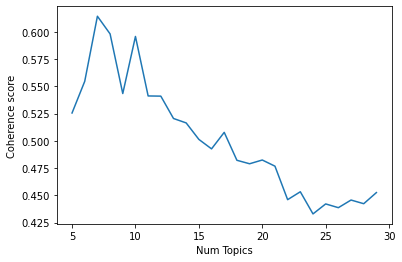

In [13]:
# Show graph
limit=30; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.savefig('20240701_PhD_MalletDiaChk-Coherence')
plt.show()

In [14]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.5256
Num Topics = 6 Coherence:  0.5547
Num Topics = 7 Coherence:  0.6145
Num Topics = 8 Coherence:  0.5982
Num Topics = 9 Coherence:  0.5435
Num Topics = 10 Coherence:  0.5959
Num Topics = 11 Coherence:  0.5413
Num Topics = 12 Coherence:  0.5411
Num Topics = 13 Coherence:  0.5205
Num Topics = 14 Coherence:  0.5165
Num Topics = 15 Coherence:  0.5013
Num Topics = 16 Coherence:  0.4926
Num Topics = 17 Coherence:  0.5078
Num Topics = 18 Coherence:  0.4822
Num Topics = 19 Coherence:  0.479
Num Topics = 20 Coherence:  0.4824
Num Topics = 21 Coherence:  0.4768
Num Topics = 22 Coherence:  0.446
Num Topics = 23 Coherence:  0.4532
Num Topics = 24 Coherence:  0.4329
Num Topics = 25 Coherence:  0.4421
Num Topics = 26 Coherence:  0.4386
Num Topics = 27 Coherence:  0.4456
Num Topics = 28 Coherence:  0.4423
Num Topics = 29 Coherence:  0.4525


In [22]:
# Coherence for 10-topic model
print(coherence_values[5])

# Topics for 10-topic model
malletModel_10 = model_list[5]
model_topics_10 = malletModel_10.show_topics(formatted=False)
pprint(sorted(malletModel_10.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA10 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_10)

# Visualize the topics
pyLDAvis.enable_notebook()
vis10 = pyLDAvis.gensim.prepare(MalletLDA10, corpus, id2word, sort_topics=False)
vis10

0.5958946739251414
[(0,
  '0.128*"tea" + 0.082*"dinner" + 0.044*"breakfast" + 0.036*"lot" + '
  '0.034*"bread" + 0.029*"clothe" + 0.023*"washing" + 0.022*"cake" + '
  '0.020*"wind" + 0.020*"fish" + 0.018*"job" + 0.018*"thing" + 0.018*"bath" + '
  '0.017*"meat" + 0.017*"kitchen" + 0.015*"cooking" + 0.013*"wash" + '
  '0.012*"garden" + 0.012*"trip" + 0.010*"milk"'),
 (1,
  '0.090*"letter" + 0.079*"pound" + 0.046*"train" + 0.041*"wife" + '
  '0.029*"port" + 0.027*"mill" + 0.024*"meeting" + 0.022*"land" + '
  '0.021*"board" + 0.018*"business" + 0.016*"ship" + 0.014*"school" + '
  '0.012*"news" + 0.011*"paper" + 0.011*"affair" + 0.009*"steamer" + '
  '0.009*"arrangement" + 0.009*"interest" + 0.009*"church" + 0.008*"reading"'),
 (2,
  '0.096*"town" + 0.055*"port" + 0.049*"wheat" + 0.037*"club" + 0.034*"flour" '
  '+ 0.026*"bank" + 0.022*"party" + 0.019*"office" + 0.016*"price" + '
  '0.016*"sale" + 0.015*"ton" + 0.014*"account" + 0.014*"church" + '
  '0.014*"wine" + 0.013*"doctor" + 0.012*"s

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.223637  0.014121       1        1  10.474907
1     -0.156828  0.134006       2        1  10.181152
2     -0.154547  0.250366       3        1  10.343614
3     -0.101016 -0.255486       4        1   9.855922
4     -0.103498 -0.258022       5        1   9.513129
5      0.295807  0.073332       6        1   9.501390
6     -0.077655 -0.077725       7        1   9.676833
7     -0.170323  0.196083       8        1  10.583484
8     -0.031528 -0.100385       9        1  10.043778
9      0.275952  0.023710      10        1   9.825791, topic_info=        Term        Freq       Total Category  logprob  loglift
60      home  768.000000  768.000000  Default  30.0000  30.0000
22       tea  527.000000  527.000000  Default  29.0000  29.0000
33     horse  501.000000  501.000000  Default  28.0000  28.0000
29    dinner  755.000000  755.000000  Default  27.0000  27.0000
642     town  389.000000  389.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
100     work  121.869900  318.792359  Topic10  -3.4586   1.3586
56   weather  123.935491  348.302090  Topic10  -3.4418   1.2869
29    dinner   68.164520  755.835601  Topic10  -4.0396  -0.0857
125    sleep   35.115056  202.311319  Topic10  -4.7029   0.5690
211      arm   25.819894   46.909687  Topic10  -5.0104   1.7231

[616 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
453       8  1.026968     abbage
2799      3  1.007757    account
1258      2  1.002848     affair
145       4  0.988974      albie
146       9  0.995742      aldom
...     ...       ...        ...
820       9  0.074759       word
100       5  0.617957       work
100      10  0.382694       work
340      10  0.990763    writing
792       3  0.990676  youngster

[650 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [25]:
MalletLDA10.save('20240701_PhD_TopicDiaChkMAL10')
pyLDAvis.save_html(vis10, '20240701_PhD_TopicDiaChkMAL10.html')

## 2. Range of alphas

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for alpha in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word, alpha=alpha, random_seed=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [27]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=1, 
                                                        limit=55, 
                                                        step=4)

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.15872
<20> LL/token: -7.79488
<30> LL/token: -7.66936
<40> LL/token: -7.59339

0	0.1	rain dinner governor work weather wind home hand ship return school message court dust meeting repair lady office life petition 
1	0.1	pound club house office wheat town flour question motion govt train port letter cabinet price matter meeting ton wife treasurer 
2	0.1	dinner tea breakfast bed home weather bath horse man station room clothe people garden sleep house lot work thing bread 
3	0.1	home dress child row walk dinner drive talk call garden buggy mama friend flower town church plant river thing leave 
4	0.1	home truck work boat dinner mill gun pound chapel dog bed aunt wood tea water wheat game rate shot duck 
5	0.1	horse boy water rain tea home buggy fire dinner tank weather sand drive breakfast road lot black wind walk thunder 
6	0.1	home town people poll walk boy ride thing 

<310> LL/token: -7.37304
<320> LL/token: -7.3789
<330> LL/token: -7.37759
<340> LL/token: -7.36973

0	0.1	rain wind dust bath work number town shower weather water ship cart ball message petition tide pill hand law heat 
1	0.1	house club office question motion govt bed cabinet treasurer letter vote genl wife member speech pound debate report matter return 
2	0.1	tea dinner breakfast bed home bath weather work walk horse lot house garden clothe room beach man dress vessel bread 
3	0.1	home dinner town talk walk church friend dress row child call buggy drive mama poll plant flower boy party read 
4	0.1	home truck work mill dinner gun boat dog aunt wood chapel bed pound game wheat water shot tea thing fire 
5	0.1	horse boy rain sand dinner buggy water fire tank black home thing hand breakfast thunder camp road head weather sheep 
6	0.1	home town dress walk ride garden row door child store poll mama post letter room drive deal sake papa flower 
7	0.1	port town pound letter train home wheat

<640> LL/token: -7.35444

0	0.1	dust wind shower people hand work bath number water child ball repair rain heat writing door country tide weather tion 
1	0.1	house question motion office govt cabinet club treasurer bed vote letter member genl speech debate business resolution return ministry matter 
2	0.1	dinner tea bed breakfast bath weather bread work dress child house beach mail walk home lot store washing fish garden 
3	0.1	home dinner town talk walk friend dress church child row drive poll buggy mama call rain supper flower thing party 
4	0.1	home truck work mill boat gun dinner dog pound chapel wood bed aunt wheat water game tea wind shot rate 
5	0.1	horse rain boy water dinner sand tea home fire tank buggy road breakfast thunder hand black sheep bread chop head 
6	0.1	home walk ride dress row town child garden store room deal post letter mama poll water talk papa call holiday 
7	0.1	port town pound train letter wheat home club flour mill wife bank dinner office church house weat

<940> LL/token: -7.35185

0	0.1	rain weather people wind water dust repair shower writing man child ship number store sea boat lady tide fellow door 
1	0.1	house question motion govt office club treasurer cabinet vote bed genl member letter speech matter wife debate mail resolution ministry 
2	0.1	dinner tea bed breakfast bread weather bath house work fish wind walk lot beach meat thing garden dress child clothe 
3	0.1	home dinner town walk friend talk dress child poll drive church rain thing buggy row supper call mama garden flower 
4	0.1	home truck work mill gun boat dinner wood chapel aunt dog pound game bed water wheat wind tea shot sleep 
5	0.1	horse boy rain sand water fire dinner tank home tea bed breakfast sheep buggy black thing station road chop camp 
6	0.1	home ride dress row walk town child mama store water garden deal room call papa letter school drive poll post 
7	0.1	port town pound letter train wheat home club flour mill bank wife church bed office weather dinner land m

<210> LL/token: -7.52179
<220> LL/token: -7.52
<230> LL/token: -7.51926
<240> LL/token: -7.5212

0	0.5	horse boy dinner fire sand rain hand buggy water bird sheep home thunder tank tea wind breakfast camp thing black 
1	0.5	house office question motion govt cabinet club treasurer member vote matter genl speech debate resolution letter ministry report pound meeting 
2	0.5	dinner tea breakfast bed bread bath mail washing weather clothe work lot meat garden job vessel walk fish wind beach 
3	0.5	port wife home party letter church house bed business mail club town man affair friend order state end people change 
4	0.5	town pound port train wheat letter flour mill club bank home weather sale ton land office ship dinner rain price 
5	0.5	home walk dress town row garden child poll mama dinner talk call drive ride plant friend flower buggy store deal 
6	0.5	horse tea home breakfast man road station house people bed mother dinner girl place lunch police sister water child board 
7	0.5	home truc

<510> LL/token: -7.49706
<520> LL/token: -7.50454
<530> LL/token: -7.5123
<540> LL/token: -7.51118

0	0.5	horse boy rain buggy fire dinner sand home water thing tea bird sheep tank hand camp road breakfast cook black 
1	0.5	house office question motion govt club cabinet treasurer member vote matter bed genl speech debate report return resolution pound ministry 
2	0.5	dinner tea breakfast bed bread weather bath washing mail clothe work walk meat garden fish wind beach cake lot dress 
3	0.5	letter home wife party mail port bed town affair church news money man house family business person change friend club 
4	0.5	town port pound train wheat flour letter club mill bank home meeting price sale ton weather office land ship share 
5	0.5	home walk child town dress row dinner talk garden drive poll mama call friend church buggy flower ride store papa 
6	0.5	horse tea home station dinner man bed house place breakfast road people mother lunch woman police girl child drink board 
7	0.5	home truc

<810> LL/token: -7.49541
<820> LL/token: -7.50548
<830> LL/token: -7.49865
<840> LL/token: -7.50385

0	0.5	horse boy rain water sand dinner buggy fire home tank sheep thing camp thunder tea cook breakfast hand scrub feed 
1	0.5	house question motion office govt club cabinet bed treasurer member vote matter genl letter speech debate report view resolution governor 
2	0.5	dinner tea breakfast bread bed weather clothe bath work mail washing fish meat garden wind beach lot vessel walk dress 
3	0.5	letter home wife party port church mail bed town family affair money business bath order office place news state house 
4	0.5	town port pound train wheat club flour letter mill bank home land price sale ton ship weather wife meeting share 
5	0.5	home walk dress town row dinner child talk poll mama drive call buggy ride garden flower friend door boy papa 
6	0.5	horse tea home breakfast man station bed road dinner house child place people mother thing board lunch supper sleep police 
7	0.5	home tru

<110> LL/token: -7.60715
<120> LL/token: -7.59012
<130> LL/token: -7.59617
<140> LL/token: -7.59537

0	0.9	dinner rain weather home work tea vessel place shower store breakfast room sea beach change showery water leave board message 
1	0.9	office house question club letter govt treasurer member matter business wife speech view genl resolution effect paper cabinet report note 
2	0.9	home child dress walk row garden mama ride drive flower buggy town plant deal door dinner friend round boy papa 
3	0.9	bed tea horse man child breakfast road house station thing room people letter sleep home place girl mail lunch trouble 
4	0.9	home work truck boat dinner mill game gun wood water aunt chapel dog bed river thing wind rate book pound 
5	0.9	horse boy black fire water thing buggy wind cake sand rain hand head supper tank sheep camp milk rest feed 
6	0.9	home church walk family talk poll town drive call people boy race read woman finish mind place kind visit face 
7	0.9	house motion town pound p

<410> LL/token: -7.55688
<420> LL/token: -7.56068
<430> LL/token: -7.57421
<440> LL/token: -7.56145

0	0.9	rain dinner weather home wind vessel tea thing beach work shower place store boy change breakfast bay letter showery sea 
1	0.9	house office question motion club govt treasurer cabinet member letter business genl report matter speech case debate governor party resolution 
2	0.9	home walk row dress child garden mama ride town door dinner drive call papa deal water room store plant finish 
3	0.9	tea bed breakfast horse station man child house dinner home room sleep trouble mother road people rest girl lunch police 
4	0.9	home work truck wood mill boat game dinner aunt gun bed chapel dog side pound water rate deal wind duck 
5	0.9	horse water boy buggy sand fire black hand thing road rain tank start fear breakfast sheep camp head supper wash 
6	0.9	home talk people friend dinner poll dress family walk drive place supper church town flower book child call woman buggy 
7	0.9	port town 

<710> LL/token: -7.56758
<720> LL/token: -7.57351
<730> LL/token: -7.55623
<740> LL/token: -7.56081

0	0.9	weather rain wind dinner mail vessel beach lot letter bay breakfast thing tea water dust change store home boy thunder 
1	0.9	house question office motion govt club cabinet treasurer member matter vote speech genl debate case governor bed resolution ministry report 
2	0.9	home child walk row dress town garden mama ride door call plant store deal glass papa room school gentleman sake 
3	0.9	tea bed dinner horse home breakfast station house man child people road mother place sleep girl rest drink trouble work 
4	0.9	home work truck boat wood water game mill aunt gun bed dinner chapel dog place side book fire load rate 
5	0.9	horse boy water buggy fire rain sand black road thing breakfast start tank hand camp sheep arm supper egg mare 
6	0.9	home friend dinner talk poll dress flower drive child walk people church boy thing buggy leave read trouble rain mind 
7	0.9	port town train pou

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.51004
<20> LL/token: -8.02035
<30> LL/token: -7.86601
<40> LL/token: -7.77263

0	1.3	home port board church people ship school foot wife letter life meeting reading man affair note company pay country steamer 
1	1.3	town port train letter wife mill party house pound paper meeting account club price vote news tender person debate answer 
2	1.3	dinner tea bed bath weather breakfast bread lot wind thing washing clothe fish rain vessel job cooking garden cake bay 
3	1.3	horse road house man station breakfast bed woman people place tea girl room police mail drink fear son milk gentleman 
4	1.3	work home dinner letter bed weather wood room kitchen place sleep game pain beach friend arm book rate hand change 
5	1.3	work home truck boat side thing mill fire wind aunt gun dog dust river place water rain lot point duck 
6	1.3	home drive dinner rain row talk walk town ride lunch 

<310> LL/token: -7.58173
<320> LL/token: -7.58877
<330> LL/token: -7.57541
<340> LL/token: -7.57673

0	1.3	letter home wife mail port flour weather people rain ship board dinner vessel man note news change family land reading 
1	1.3	town pound port train wheat letter club bank mill meeting price sale party account church doctor share paper affair tender 
2	1.3	dinner tea breakfast bread clothe washing lot mail fish weather bath thing work wind bird bed black meat house head 
3	1.3	horse tea road breakfast station man house people home child girl mother bed thing wash lunch police drink place trouble 
4	1.3	bed sleep weather room dinner place work tea bath kitchen hand dust pain rest bay shower floor bedroom bottle home 
5	1.3	home work truck boat wood mill game gun water chapel dog aunt pound bed place side rate beach duck load 
6	1.3	home dinner town drive row friend church talk call door ride rain dress mind read thing visit leave walk gentleman 
7	1.3	house office question motion go

<610> LL/token: -7.57684
<620> LL/token: -7.5751
<630> LL/token: -7.57988
<640> LL/token: -7.57874

0	1.3	letter wife weather home port mail rain board ship people vessel news bed showery note state man order sleep dinner 
1	1.3	town pound port train wheat flour club mill bank land letter price meeting sale office ton church share doctor affair 
2	1.3	dinner tea breakfast bread mail washing clothe weather lot fish bath meat garden bird black bed beach milk cook goat 
3	1.3	tea horse house road man breakfast station home people bed mother wash place thing girl woman police baby drink lunch 
4	1.3	bed room sleep wind breakfast work child weather dinner thing bath kitchen bay dust lot house tea fear care floor 
5	1.3	home work truck boat wood mill gun place game side aunt chapel dog dinner wind water pound beach load rate 
6	1.3	home dinner town friend drive row church ride talk call book walk dress leave visit mind wine door supper buggy 
7	1.3	house office question motion govt club cabi

<910> LL/token: -7.55582
<920> LL/token: -7.56619
<930> LL/token: -7.568
<940> LL/token: -7.56443

0	1.3	letter home mail wife weather bed rain port board ship people dinner man vessel news showery place money country family 
1	1.3	town pound port train wheat club flour letter mill bank land office meeting price sale ton wife share account doctor 
2	1.3	dinner tea breakfast bread clothe weather bed washing fish bath lot mail black meat walk beach cooking cake garden wind 
3	1.3	horse tea breakfast station man people bed road house lunch mother home water girl wash police sleep bay trouble drink 
4	1.3	bed room work sleep breakfast thing house place weather child wind kitchen bath dinner pain store lot floor dust bedroom 
5	1.3	home work truck boat wood mill aunt gun game thing chapel dog side pound water wheat load dinner rate duck 
6	1.3	home town dinner friend drive church row call talk book door leave ride read dress boy visit party end mind 
7	1.3	house office question motion govt 

<210> LL/token: -7.61999
<220> LL/token: -7.6047
<230> LL/token: -7.6152
<240> LL/token: -7.61475

0	1.7	letter house bed wife weather office club rain school lunched whist state person bath governor man hand return family life 
1	1.7	house question motion govt office club cabinet treasurer matter vote genl report notice speech business member debate resolution effect view 
2	1.7	breakfast tea room dinner house child man cake girl bath vessel rest bed care station baby mother floor dress bottle 
3	1.7	bed place people work tea thing sleep weather change board sister station supper water telegraph woman head husband music police 
4	1.7	home work truck boat wood mill dinner game aunt gun beach chapel book dog wind load rate duck order bit 
5	1.7	horse water boy fire rain road wind sand buggy thing hand tank black camp rest dust head scrub start supper 
6	1.7	home dress walk town talk row child friend call poll mama church finish dinner round turn mind plant papa book 
7	1.7	home dinner r

<510> LL/token: -7.59649
<520> LL/token: -7.60376
<530> LL/token: -7.60464
<540> LL/token: -7.60083

0	1.7	letter wife weather mail bed office club house return whist bath lunched charge change sleep note order state showery school 
1	1.7	house office question motion govt club cabinet treasurer member matter vote genl report notice business speech debate view case governor 
2	1.7	bed breakfast room sleep tea man dinner child girl lot vessel cake rest kitchen store job house work baby floor 
3	1.7	people place station water house tea road thing work trouble friend woman board man police sister drink bay lunch telegraph 
4	1.7	home work truck boat wood mill dinner gun aunt wind game chapel dog pound rate duck book load beach bit 
5	1.7	horse boy rain fire water sand thing wind head hand buggy supper start thunder tank black road arm camp sheep 
6	1.7	home dress walk child talk row town call church poll mama friend drive finish flower turn read party papa ride 
7	1.7	home dinner rain hors

<810> LL/token: -7.57698
<820> LL/token: -7.58445
<830> LL/token: -7.58502
<840> LL/token: -7.5896

0	1.7	letter wife bed mail weather house note people news school bath family return state office sleep order country business affair 
1	1.7	house office question motion govt club cabinet treasurer member matter vote genl report notice speech view debate governor resolution ministry 
2	1.7	bed room tea sleep work dinner breakfast child rest girl cake house kitchen job bath vessel store lot man arm 
3	1.7	horse place station road people tea man house water bed breakfast mother trouble woman lunch police wash board drink friend 
4	1.7	home work truck boat wood game mill aunt gun beach water chapel dog thing dinner pound book load side rate 
5	1.7	horse boy fire water rain hand sand thing buggy head wind thunder supper tank start camp breakfast sheep bay place 
6	1.7	home walk dress talk town child row call poll friend mama ride drive flower life church finish papa deal sake 
7	1.7	home dinn

<110> LL/token: -7.66529
<120> LL/token: -7.6617
<130> LL/token: -7.65714
<140> LL/token: -7.66175

0	2.1	home work truck boat mill wood game aunt gun chapel dog river deal load rate beach side duck bit ground 
1	2.1	house office club question motion govt meeting mill cabinet train business matter treasurer member ship vote genl report lunched affair 
2	2.1	port pound town wheat letter flour train wife bank club land price church sale ton doctor share news railway paper 
3	2.1	horse road man station house water buggy tea dinner breakfast people lunch mother room police drink baby son feed bird 
4	2.1	rain bed sleep place thing water wind board vessel rest house fire boy dust trouble side cold woman store change 
5	2.1	home dress hand room row drive ride poll talk flower buggy deal heat point finish thing read leave return sight 
6	2.1	home letter town weather bed people rain wife order family party door glass state person showery country rise paper end 
7	2.1	dinner tea breakfast bed w

<430> LL/token: -7.60222
<440> LL/token: -7.60363

0	2.1	home work truck boat wood mill game aunt gun beach side chapel dog water river pound deal book load rate 
1	2.1	house office question club motion govt cabinet matter treasurer member vote genl report business return notice speech meeting case debate 
2	2.1	port town pound train wheat flour club bank mill letter land wife price sale ton ship doctor board office share 
3	2.1	horse tea breakfast road man station house girl room water start lunch rest mother sister people wash police baby drink 
4	2.1	bed rain sleep weather wind thing vessel work room bath fire dust mail place care house writing fellow change bay 
5	2.1	dress home walk row garden ride town drive mama poll door flower deal heat call finish plant store feel papa 
6	2.1	home letter people wife bed rain weather family party town church glass wine fear country visit showery end paper person 
7	2.1	dinner tea breakfast bread clothe bath lot weather washing bed fish job kit

<730> LL/token: -7.57903
<740> LL/token: -7.56947

0	2.1	home work truck boat mill wood game water aunt gun side chapel dog river deal thing fire rate duck load 
1	2.1	house office question motion govt club cabinet matter treasurer member vote report genl notice speech paper business debate case governor 
2	2.1	port town pound train wheat flour club bank mill land letter meeting price sale ton ship office share lunched account 
3	2.1	horse road breakfast man tea station house lunch water girl mother police board baby drink wash people lot rest woman 
4	2.1	bed weather sleep mail room wind rain bath work vessel bay thing house dust black showery floor bottle writing change 
5	2.1	dress home walk town garden row ride poll mama door flower drive deal call plant store heat finish papa school 
6	2.1	home letter people wife bed place rain church leave glass paper family party return weather country wine visit mail shower 
7	2.1	dinner tea breakfast bread clothe lot washing fish job bath kitc

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.66535
<20> LL/token: -8.14521
<30> LL/token: -7.96173
<40> LL/token: -7.84213

0	2.5	bed house letter mail wife sleep bath dinner return man treasurer weather people foot shower home husband brother mine boot 
1	2.5	office club house question motion govt land cabinet matter account member vote genl report business speech debate governor case answer 
2	2.5	hand home weather board whist school order club wine railway book pound view money steamer arrangement charge opinion life duck 
3	2.5	horse tea road station water breakfast buggy man meat room rest tank door sister police arm baby camp bedroom drink 
4	2.5	dress drive room trouble row flower child ride boy store lunch place home deal woman work heat floor garden trip 
5	2.5	home rain talk fire thing garden wind dinner child friend wood game poll side point family call river showery head 
6	2.5	dinner walk child break

<310> LL/token: -7.62119
<320> LL/token: -7.63052
<330> LL/token: -7.60725
<340> LL/token: -7.6225

0	2.5	bed mail sleep house letter room weather man vessel fear bath change wife bay care writing foot telegraph heat country 
1	2.5	house office question motion govt club cabinet matter treasurer member vote genl report notice speech return view person debate governor 
2	2.5	weather hand board people place ship wine order life school showery note ground whist rise bath charge pay telegram family 
3	2.5	horse boy water road station buggy sand meat breakfast rest black sheep start man wash tank camp police drink bottle 
4	2.5	home walk dress child drive row flower ride garden town call poll mama deal buggy pair plant mind store catch 
5	2.5	home rain dinner fire thing talk place game wind supper leave door church garden glass gentleman fellow read visit turn 
6	2.5	dinner tea breakfast child cake friend trouble thing beach bed mother people sister girl woman store job shower race dust 
7	2

<610> LL/token: -7.5899
<620> LL/token: -7.59639
<630> LL/token: -7.58813
<640> LL/token: -7.59001

0	2.5	bed mail house sleep room weather letter man vessel fear bay change people floor writing bottle wife telegraph foot heat 
1	2.5	house office question motion govt club cabinet treasurer return member vote genl matter business paper notice speech report view case 
2	2.5	hand board place weather ship water note people point school shower order wine life dust showery friend family reading pay 
3	2.5	horse boy road water station buggy sand start breakfast thunder head tank police woman lunch sheep camp drink rest black 
4	2.5	home walk dress child drive town talk row flower ride call poll mama garden church store friend plant finish round 
5	2.5	rain home dinner thing fire wind place lot supper fellow glass care garden leave egg arm door end light coat 
6	2.5	tea breakfast child dinner bed cake girl trouble work mother beach bath walk sister baby people cold race husband beer 
7	2.5	hom

<910> LL/token: -7.59019
<920> LL/token: -7.59099
<930> LL/token: -7.59764
<940> LL/token: -7.59459

0	2.5	bed mail room house sleep weather letter man vessel change bay bath people floor writing bottle heart heat bedroom foot 
1	2.5	house office club question motion govt cabinet treasurer member matter vote genl report notice business speech view case return debate 
2	2.5	people board party hand friend weather ship home water school wine sea family life order wife place rise pay chair 
3	2.5	horse boy water road station buggy sand start breakfast rest black thunder tank head lunch police wash camp son bay 
4	2.5	home walk dress child talk garden town row drive ride call poll mama flower deal church finish plant buggy store 
5	2.5	rain home thing wind dinner place fire supper glass dust shower fellow trip leave door showery point arm lot pair 
6	2.5	tea dinner bed breakfast child cake bath trouble girl beach walk sister rest mother drink baby eat race husband beer 
7	2.5	home work truc

<210> LL/token: -7.65308
<220> LL/token: -7.63833
<230> LL/token: -7.63709
<240> LL/token: -7.6354

0	2.9	pound town port wheat train letter flour club mill bank price sale ton wife account share office paper doctor news 
1	2.9	house office question motion govt club cabinet matter treasurer member genl report business speech view state debate governor paper note 
2	2.9	town port church meeting party land board ship wine school family life friend order people mind bower end pay company 
3	2.9	home child walk garden dinner man drive dress talk friend leave call door pair son plant egg tree lunch girl 
4	2.9	bed letter house home mail sleep place wife people fear work change trouble heat writing telegraph country race sea return 
5	2.9	home work truck boat book wood row ride game aunt gun side thing mill poll chapel mama dog river rate 
6	2.9	horse boy road water buggy start thing woman sand station place rest tank mother baby drink supper camp mare lunch 
7	2.9	dinner weather hand lot wa

<510> LL/token: -7.59742
<520> LL/token: -7.59679
<530> LL/token: -7.58872
<540> LL/token: -7.59008

0	2.9	pound wheat letter port town flour train club mill bank land wife price sale ton office share news affair railway 
1	2.9	house office question motion govt club cabinet treasurer member vote genl report matter paper notice return speech business debate view 
2	2.9	town port church meeting party board friend ship wine train school life man glass leave college point vessel steamer bower 
3	2.9	home walk dress drive child talk garden row call poll ride mama buggy flower door read egg plant round finish 
4	2.9	bed house mail letter sleep people place home wife child fear trouble family heat writing woman country race husband state 
5	2.9	home work truck boat wood game aunt gun book side mill chapel dog river thing water rate duck place bit 
6	2.9	horse boy road station thing buggy sand water man supper girl start mother lunch police baby camp drink eat mare 
7	2.9	dinner room lot work 

<810> LL/token: -7.58139
<820> LL/token: -7.57559
<830> LL/token: -7.58586
<840> LL/token: -7.59083

0	2.9	pound wheat port letter flour town train club mill bank land wife price sale ton office account share lunched affair 
1	2.9	house office question motion govt club cabinet matter treasurer member vote paper genl report speech view case debate governor notice 
2	2.9	town home port church party board meeting ship train wine friend school doctor life glass leave college steamer bower chair 
3	2.9	walk home dress child drive talk row garden buggy ride call poll mama door friend finish flower plant read round 
4	2.9	bed place house letter mail people man sleep wife home trouble fear change family return woman writing sister state country 
5	2.9	home work truck boat wood book mill game aunt gun chapel dog side river load water rate duck bit shot 
6	2.9	horse boy road station water sand buggy supper breakfast lunch start thing mother girl tank baby camp police drink man 
7	2.9	dinner room

<110> LL/token: -7.69181
<120> LL/token: -7.67509
<130> LL/token: -7.66801
<140> LL/token: -7.67626

0	3.3	letter wheat mill wife flour club board price sale ton ship account office whist order news business state arrangement opinion 
1	3.3	house office question motion govt club cabinet return paper treasurer member party vote genl report matter notice speech view case 
2	3.3	home friend talk garden drive row ride child flower wine call glass leave mama life church woman duck party mind 
3	3.3	bed breakfast tea weather mail dinner sleep house bath man bay room lot milk writing heat people heart sheep mutton 
4	3.3	work home truck boat side water wood aunt book fire start chapel deal dog river floor son load lot bit 
5	3.3	dinner rain walk child dress thing store game supper boy mother poll sister buggy shower camp note rate mare family 
6	3.3	place home road people bed room wind vessel trouble lunch gun fear door showery foot care hand point race tree 
7	3.3	horse boy water rain statio

<410> LL/token: -7.59762
<420> LL/token: -7.59285
<430> LL/token: -7.60521
<440> LL/token: -7.5985

0	3.3	letter wheat wife club flour party office price sale ton mill whist account news lunched bank affair railway tender order 
1	3.3	house office question motion govt cabinet club treasurer member vote genl report matter paper notice return speech view case debate 
2	3.3	home walk friend talk dress drive garden row flower ride call poll mama church glass leave plant read gentleman round 
3	3.3	bed weather dinner tea mail breakfast sleep house bath man work bay floor writing heart heat pair husband beer shirt 
4	3.3	home work truck boat water wood game aunt gun mill chapel fire dog river side book load rate wind duck 
5	3.3	rain dinner child thing beach supper store rest boy buggy mother walk shower sister deal dress family cold egg mare 
6	3.3	place room people home bed wind hand vessel trouble fear change dust door head care foot showery sea race tree 
7	3.3	horse water boy road stati

<710> LL/token: -7.5915
<720> LL/token: -7.60343
<730> LL/token: -7.59214
<740> LL/token: -7.58209

0	3.3	letter wheat wife club flour mill party office price sale ton wine whist account news lunched bank affair railway tender 
1	3.3	house question motion govt office cabinet treasurer member club return vote matter report genl notice speech view paper debate case 
2	3.3	home dress walk friend talk row drive flower ride garden call poll mama plant read life round finish visit deal 
3	3.3	bed weather mail breakfast sleep dinner house tea man bath bay vessel work floor writing bottle heart beer husband heat 
4	3.3	home work truck boat wood game mill aunt gun water book chapel dog side deal load river rate foot fire 
5	3.3	rain dinner child thing beach lot supper boy store walk buggy shower leave sister thunder glass rest door cold note 
6	3.3	wind room place people home thing bed trouble fear change dust family head tea sea state care telegraph race message 
7	3.3	horse water boy road sta

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.80751
<20> LL/token: -8.28219
<30> LL/token: -8.04794
<40> LL/token: -7.9136

0	3.7	home water talk drive supper house sand flower dinner return bed shower letter life state person milk table governor note 
1	3.7	house office club train question motion govt paper cabinet business matter treasurer account member wife vote genl report notice speech 
2	3.7	port pound town wheat letter mill flour wife bank land club price sale ton ship train wine whist doctor meeting 
3	3.7	breakfast dinner people tea walk mail dress man lot rain sleep child place meat wash woman sister mama leave police 
4	3.7	horse boy thing road fire buggy station breakfast cake room sheep water rain girl head bay rest tea tank start 
5	3.7	home work truck rain boat wood aunt gun thing ride poll game water dog river point showery deal store walk 
6	3.7	home letter town hand church friend mother share me

<310> LL/token: -7.62188
<320> LL/token: -7.63385
<330> LL/token: -7.61668
<340> LL/token: -7.62812

0	3.7	walk dress hand drive talk friend call poll mama heat garden cake life flower plant finish book read return round 
1	3.7	house office club question motion govt cabinet matter treasurer member wife vote genl report notice business speech view person debate 
2	3.7	port pound town wheat train flour wife mill bank club land meeting price sale ton ship account doctor share lunched 
3	3.7	dinner breakfast tea bed man wash trouble meat cook people sister room pair drink mail bottle race heart lot eat 
4	3.7	horse boy water fire road house thing station sand girl sheep buggy supper mother start cake tank woman police camp 
5	3.7	home work truck boat beach wood side mill game aunt gun water chapel dog river foot book rate duck ground 
6	3.7	letter home town church people party paper school family leave news college note mind visit end order wine company business 
7	3.7	rain weather bed win

<610> LL/token: -7.60294
<620> LL/token: -7.60497
<630> LL/token: -7.59905
<640> LL/token: -7.59951

0	3.7	walk dress drive friend talk row flower hand call poll mama life heat finish plant lunch round turn read light 
1	3.7	house office question motion govt club cabinet treasurer member return vote matter business genl notice speech report view case debate 
2	3.7	port pound town wheat train wife flour club mill bank land meeting price sale ton ship doctor share account lunched 
3	3.7	bed tea dinner breakfast man mail room wash people cook sister floor drink bottle beach sewing job heart eat bay 
4	3.7	horse boy water road house station sand girl buggy supper start thing sheep tank mother camp police head breakfast scrub 
5	3.7	work home truck boat wood book side game mill water aunt gun beach chapel dog river thing rate duck ground 
6	3.7	letter home town church party people wine school family leave news paper college woman mind reading visit end brother death 
7	3.7	weather rain wind

<920> LL/token: -7.59388
<930> LL/token: -7.5961
<940> LL/token: -7.59675

0	3.7	walk dress drive talk friend row ride flower call poll hand mama child life heat finish read plant note round 
1	3.7	house club question office motion govt cabinet wife matter treasurer member paper vote genl report notice return speech business view 
2	3.7	port pound town wheat train flour club mill bank wife land meeting office sale ton ship price account doctor share 
3	3.7	bed tea breakfast dinner mail man room people bath beach wash cook sister floor bottle bay drink heart sewing race 
4	3.7	horse boy water road station thing sand girl buggy lunch start head fire sheep mother tank police baby camp scrub 
5	3.7	home work truck boat wood mill game aunt gun water chapel dog side river load thing rate duck ground fellow 
6	3.7	home letter town church party school family people mail wine money leave news college paper mind reading visit pay end 
7	3.7	weather rain bed wind sleep black vessel store hand boa

<210> LL/token: -7.62496
<220> LL/token: -7.61123
<230> LL/token: -7.61702
<240> LL/token: -7.61453

0	4.1	weather rain water hand child vessel man fear change shower head fellow sea care pair floor leave heat board turn 
1	4.1	office house question motion govt club cabinet treasurer member matter vote genl report speech view notice case debate governor answer 
2	4.1	tea room bread clothe station lot house cake girl man job trouble meat wash woman cooking cook mother dinner rest 
3	4.1	dinner bed breakfast tea bath mail thing washing fish sleep beach people sister pain bedroom writing sewing cold heart potato 
4	4.1	work wind truck thing boat place side book wood game aunt mill sleep chapel dog trip river fire deal load 
5	4.1	walk dress garden child drive friend talk row flower ride buggy call poll mama door glass deal plant read round 
6	4.1	letter wife house meeting party people business price ship club school order mail news board railway place tender state interest 
7	4.1	home din

<510> LL/token: -7.59671
<520> LL/token: -7.598
<530> LL/token: -7.59965
<540> LL/token: -7.59402

0	4.1	weather rain hand water store kitchen child head room cooking vessel fear shower thunder sea fellow door pair care floor 
1	4.1	house office question motion govt club cabinet matter return treasurer member vote paper genl report notice speech case debate governor 
2	4.1	tea man breakfast people room station rest cake wash girl job place child house woman mother lot baby drink bottle 
3	4.1	dinner tea breakfast bath bread mail clothe thing wind washing fish lot work beach garden sister pain meat bedroom writing 
4	4.1	work home truck boat side wood book wind place aunt gun mill game chapel dog deal river rate duck beach 
5	4.1	walk dress drive child talk garden row flower ride call friend poll church mama finish plant tree read deal round 
6	4.1	letter wife meeting party board house mail business ship school life news family railway tender state place interest country reading 
7	4.1	

<810> LL/token: -7.57342
<820> LL/token: -7.57885
<830> LL/token: -7.58842
<840> LL/token: -7.58581

0	4.1	weather rain wind hand vessel kitchen store cooking child thing fear shower change thunder bay trip pair sea showery care 
1	4.1	house office question motion govt club cabinet matter return treasurer member paper vote genl report notice speech view case debate 
2	4.1	room breakfast house man tea station people rest cake wash girl child trouble woman lot work mother friend sister police 
3	4.1	dinner tea breakfast bath bread mail clothe bed washing lot fish meat beach pain garden bedroom milk job mutton cold 
4	4.1	home work truck boat water side wood book game aunt gun mill chapel dog river load deal rate duck bit 
5	4.1	walk dress drive child talk garden row buggy call poll ride mama door flower deal heat friend finish plant tree 
6	4.1	letter wife town church party board business ship school people family mail news tender leave country life mind visit pay 
7	4.1	home bed dinner 

<110> LL/token: -7.72613
<120> LL/token: -7.71238
<130> LL/token: -7.69989
<140> LL/token: -7.71496

0	4.5	work water home fire truck boat sand wood side game aunt gun chapel dog tank river deal rain foot scrub 
1	4.5	letter wife church talk party change life account view country ground mind effect read school feeling home friend end case 
2	4.5	town port pound wheat train mill flour letter bank meeting land price club sale ton ship doctor news wife railway 
3	4.5	rain dinner walk dress home garden hand drive bath poll mama room family door leave mutton store return sewing deal 
4	4.5	horse boy road station head buggy cake trouble bed meat lunch start police heat heart potato wash people tea cup 
5	4.5	house office club question motion govt paper cabinet treasurer whist member vote share genl lunched report notice college speech person 
6	4.5	child man people rest supper girl row flower woman thing friend water call note mother sister drink fear baby buggy 
7	4.5	wind sleep thing dinne

<410> LL/token: -7.62939
<420> LL/token: -7.63497
<430> LL/token: -7.62947
<440> LL/token: -7.62603

0	4.5	home work truck boat water fire wood side game beach aunt gun chapel dog river deal load rate duck ground 
1	4.5	letter wife church talk party change school family order affair heat college mail view return country mind news feeling visit 
2	4.5	town port pound wheat train mill flour bank club land meeting price sale ton ship doctor share lunched railway tender 
3	4.5	home rain dress garden hand walk drive room ride poll buggy mama door leave deal store plant egg finish round 
4	4.5	horse boy water road head station cake sand sheep buggy breakfast trouble start tank wash thunder police camp scrub supper 
5	4.5	house office club question motion govt cabinet matter treasurer paper member vote genl report notice speech business case debate governor 
6	4.5	child man dinner rest friend girl people row flower woman walk fear mother call sister supper baby care drink son 
7	4.5	thing tea

<710> LL/token: -7.60821
<720> LL/token: -7.60825
<730> LL/token: -7.60973
<740> LL/token: -7.60153

0	4.5	home work truck boat mill wood book game aunt gun side water chapel dog river beach load rate duck deal 
1	4.5	letter wife church talk party business mail change leave school news affair return college state country mind note effect visit 
2	4.5	town port pound wheat train flour bank mill meeting club land price sale ton ship share lunched railway doctor tender 
3	4.5	home walk dress garden row rain ride drive call glass poll mama deal door store hand plant finish egg room 
4	4.5	horse boy water road buggy station sand sheep start fire breakfast head thunder tank police camp scrub fear mare chop 
5	4.5	house office club question motion govt cabinet matter treasurer member vote report genl speech notice view debate governor case paper 
6	4.5	child man people dinner rest friend supper girl flower woman tea mother lunch care pair baby drink son gentleman drive 
7	4.5	thing wind dinne

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85463
<20> LL/token: -8.42217
<30> LL/token: -8.16958
<40> LL/token: -8.00731

0	4.9	horse water rain boy thing dress dinner job deal rest store shower sister lunch door weather camp son goat wash 
1	4.9	house letter wife question motion paper cabinet return fear vote affair report doctor table interest matter country mind opinion note 
2	4.9	home hand drive friend talk ride aunt room mother call whist man river lunched horse heat bed pain gentleman duck 
3	4.9	tea dinner bath clothe washing black head lot vessel meat cooking cake fire bed child cook man room baby arm 
4	4.9	work weather sleep rain people home place wood dinner bed dust mail floor water arrangement answer family finish shot load 
5	4.9	home truck boat horse fire wind side sheep gun game house station chapel point tank pair dinner telegraph child resolution 
6	4.9	walk bread child buggy garden home lot 

<310> LL/token: -7.63617
<320> LL/token: -7.64993
<330> LL/token: -7.63577
<340> LL/token: -7.64655

0	4.9	horse water boy rain thing black start bird rest wash buggy shower thunder tank baby camp care mother feed cold 
1	4.9	house wife letter question motion cabinet return treasurer member vote report genl speech paper debate case answer effect business feeling 
2	4.9	home drive friend talk hand row ride call leave family rest gentleman river wine mind read end sewing kind feel 
3	4.9	tea dinner bath bread clothe breakfast head lot washing job vessel kitchen meat cooking fish black sister mail cake fire 
4	4.9	bed work weather sleep place room thing people rain sheep mail dust trip change floor load heart husband chair beach 
5	4.9	home truck fire wind boat deal side wood game aunt gun point mill chapel dog sea door book rate duck 
6	4.9	child walk dress garden dinner buggy store trouble flower lunch beach woman girl poll mama pain cake son drink pair 
7	4.9	pound club office mill gov

<610> LL/token: -7.62931
<620> LL/token: -7.63398
<630> LL/token: -7.62365
<640> LL/token: -7.62134

0	4.9	horse boy water hand thing sand supper black rain buggy road start thunder tank bird baby camp feed scrub eat 
1	4.9	house question motion office cabinet matter return club treasurer member vote genl notice business speech report view state case debate 
2	4.9	home drive friend talk row ride call leave family glass mama life country mind read visit round end door gentleman 
3	4.9	dinner tea bath breakfast lot bread clothe head washing fish job meat kitchen wash cooking pain sea vessel black sheep 
4	4.9	weather rain mail sleep room wind thing fire bed place people cook dust work change care showery floor writing bottle 
5	4.9	home work truck boat wood side game book aunt gun beach mill place water chapel dog river load rate duck 
6	4.9	child dinner walk dress garden flower buggy woman girl deal store poll lunch cake trouble pair son cold finish plant 
7	4.9	pound wheat wife club fl

<910> LL/token: -7.59756
<920> LL/token: -7.60125
<930> LL/token: -7.60185
<940> LL/token: -7.59868

0	4.9	horse boy water thing rain sand road hand buggy supper start thunder tank black arm camp scrub feed fishing eat 
1	4.9	house question motion govt office cabinet club matter treasurer member return vote genl report notice speech view state case debate 
2	4.9	home drive friend talk row ride call glass family leave mama door life dress gentleman book mind read wine visit 
3	4.9	dinner tea breakfast bath bread clothe lot washing head fish wash sheep job meat kitchen cooking bird vessel cake bedroom 
4	4.9	weather rain wind mail sleep room bed fire thing place bay cook change dust shower trip lot black showery floor 
5	4.9	work home truck boat beach wood water game aunt gun place chapel dog fellow mill side sea river book load 
6	4.9	child walk garden dinner dress girl trouble store flower buggy woman deal hand poll cake pair note cold finish plant 
7	4.9	pound wheat wife club flour mi

<210> LL/token: -7.66542
<220> LL/token: -7.65388
<230> LL/token: -7.656
<240> LL/token: -7.64921

0	5.3	rain work home water side wood game gun glass dust fellow door order place foot rate son shot visit cloud 
1	5.3	house office question motion govt club cabinet paper matter treasurer member vote report genl notice speech view case debate governor 
2	5.3	port pound town wheat train wife club church party meeting land price sale ton whist school affair railway college tender 
3	5.3	home truck dinner boat beach friend deal book store ride aunt family dog life sea river call duck race lunch 
4	5.3	horse boy fire water road black head sand sheep buggy breakfast kitchen start cook thunder place tank board rest police 
5	5.3	bed weather mail sleep house dinner man people fear change leave supper showery floor writing bottle shower state heart husband 
6	5.3	tea thing bath dinner lot bread room hand station cake girl meat cooking mother rest sister baby drink mutton people 
7	5.3	child walk

<510> LL/token: -7.61159
<520> LL/token: -7.60975
<530> LL/token: -7.61063
<540> LL/token: -7.60845

0	5.3	work rain place water wind black wood game side shower dust point fellow door pair rate ground light cloud glass 
1	5.3	house office question motion govt paper club cabinet matter treasurer member vote genl report notice business speech view case debate 
2	5.3	town port pound wheat train club flour meeting party land price sale ton whist share account affair railway tender church 
3	5.3	home truck dinner boat beach friend ride book aunt gun chapel dog deal river sea duck race bit shot load 
4	5.3	horse boy fire road buggy head water sand sheep rest lunch start cook thunder tank wash police camp son supper 
5	5.3	bed weather mail sleep people room man house station fear black change showery floor bedroom writing supper bottle bay heart 
6	5.3	thing tea dinner bath lot bread hand breakfast cake girl meat cooking trouble mother sister woman baby drink gentleman mutton 
7	5.3	child wa

<810> LL/token: -7.57675
<820> LL/token: -7.57279
<830> LL/token: -7.57989
<840> LL/token: -7.58801

0	5.3	rain work place wind fire black water side wood shower dust fellow door pair point ground game chair face iron 
1	5.3	house office question motion govt club cabinet matter treasurer member paper vote genl report notice speech case debate view answer 
2	5.3	town port pound wheat train flour club bank meeting land price sale ton school share lunched account railway college tender 
3	5.3	home truck boat beach work mill book aunt gun chapel dog deal river ride load rate duck race bit game 
4	5.3	horse boy road water station sand sheep rest buggy supper head lunch start mother thunder tank police camp son scrub 
5	5.3	bed weather mail house sleep room people man fear change bay showery floor drink writing bottle foot state heart husband 
6	5.3	dinner tea bath lot bread breakfast child thing hand cake girl trouble meat cooking sister sea baby care woman mutton 
7	5.3	walk dress child ga

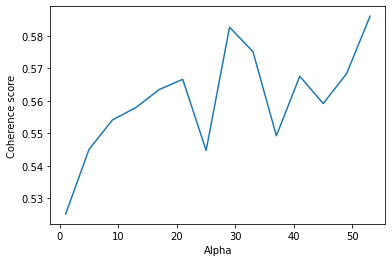

In [30]:
# Show graph
limit=55; start=1; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [31]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 1 Coherence:  0.5251
Alpha = 5 Coherence:  0.5451
Alpha = 9 Coherence:  0.5541
Alpha = 13 Coherence:  0.5579
Alpha = 17 Coherence:  0.5635
Alpha = 21 Coherence:  0.5666
Alpha = 25 Coherence:  0.5447
Alpha = 29 Coherence:  0.5827
Alpha = 33 Coherence:  0.5751
Alpha = 37 Coherence:  0.5492
Alpha = 41 Coherence:  0.5676
Alpha = 45 Coherence:  0.5592
Alpha = 49 Coherence:  0.5684
Alpha = 53 Coherence:  0.5861


In [32]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=50, 
                                                        limit=60, 
                                                        step=3)

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<210> LL/token: -7.66542
<220> LL/token: -7.65388
<230> LL/token: -7.656
<240> LL/token: -7.64921

0	5.3	rain work home water side wood game gun glass dust fellow door order place foot rate son shot visit cloud 
1	5.3	house office question motion govt club cabinet paper matter treasurer member vote report genl notice speech view case debate governor 
2	5.3	port pound town wheat train wife club church party meeting land price sale ton whist school affair railway college tender 
3	5.3	home truck dinner boat beach friend deal book store ride aunt family dog life sea river call duck race lunch 
4	5.3	horse boy fire water road black head sand sheep buggy breakfast kitchen start cook thunder place tank board rest police 
5	5.3	bed weather mail sleep house dinner man people fear change leave supper showery floor writing bottle shower state heart husband 
6	5.3	tea thing bath dinner lot bread room hand station cake girl meat cooking mother rest sister baby drink mutton people 
7	5.3	child walk

<510> LL/token: -7.61159
<520> LL/token: -7.60975
<530> LL/token: -7.61063
<540> LL/token: -7.60845

0	5.3	work rain place water wind black wood game side shower dust point fellow door pair rate ground light cloud glass 
1	5.3	house office question motion govt paper club cabinet matter treasurer member vote genl report notice business speech view case debate 
2	5.3	town port pound wheat train club flour meeting party land price sale ton whist share account affair railway tender church 
3	5.3	home truck dinner boat beach friend ride book aunt gun chapel dog deal river sea duck race bit shot load 
4	5.3	horse boy fire road buggy head water sand sheep rest lunch start cook thunder tank wash police camp son supper 
5	5.3	bed weather mail sleep people room man house station fear black change showery floor bedroom writing supper bottle bay heart 
6	5.3	thing tea dinner bath lot bread hand breakfast cake girl meat cooking trouble mother sister woman baby drink gentleman mutton 
7	5.3	child wa

<810> LL/token: -7.57675
<820> LL/token: -7.57279
<830> LL/token: -7.57989
<840> LL/token: -7.58801

0	5.3	rain work place wind fire black water side wood shower dust fellow door pair point ground game chair face iron 
1	5.3	house office question motion govt club cabinet matter treasurer member paper vote genl report notice speech case debate view answer 
2	5.3	town port pound wheat train flour club bank meeting land price sale ton school share lunched account railway college tender 
3	5.3	home truck boat beach work mill book aunt gun chapel dog deal river ride load rate duck race bit game 
4	5.3	horse boy road water station sand sheep rest buggy supper head lunch start mother thunder tank police camp son scrub 
5	5.3	bed weather mail house sleep room people man fear change bay showery floor drink writing bottle foot state heart husband 
6	5.3	dinner tea bath lot bread breakfast child thing hand cake girl trouble meat cooking sister sea baby care woman mutton 
7	5.3	walk dress child ga

<110> LL/token: -7.78857
<120> LL/token: -7.75824
<130> LL/token: -7.74859
<140> LL/token: -7.75344

0	5.6	bed rain weather sleep house matter point family tank ship mail showery lunched life state hand note steamer rise people 
1	5.6	house club question motion govt paper cabinet business treasurer member whist return vote genl report wife tender view speech debate 
2	5.6	horse man room road child station bed people girl lunch start woman home call mother place store baby care drink 
3	5.6	home walk dinner dress drive talk friend row ride poll mama beach door pair heat finish plant heart egg change 
4	5.6	letter pound wheat mill home party church price sale ton wine share book railway case affair glass end cheque quarter 
5	5.6	town port train office flour wife club bank meeting land account school doctor order church notice college news interest arrangement 
6	5.6	tea place black child dinner wash board vessel wood flower trouble cooking sister police room shower buggy people weather 

<410> LL/token: -7.61886
<420> LL/token: -7.6181
<430> LL/token: -7.61885
<440> LL/token: -7.6235

0	5.6	bed weather rain mail sleep house thing supper point dust showery heat family state fellow cold country rise chair message 
1	5.6	house office question motion govt club paper cabinet matter treasurer member return vote genl report business notice speech view case 
2	5.6	horse room man people place road station girl lunch start woman fear mother police care baby drink son gentleman telegraph 
3	5.6	home walk dress drive child friend talk row flower ride garden call leave poll mama door finish plant tree read 
4	5.6	letter pound wheat mill party home price sale ton wine order news share affair railway tender charge end carriage cheque 
5	5.6	town port train wife flour club church bank meeting pound land ship account whist doctor lunched board college school steamer 
6	5.6	tea dinner breakfast child beach wash work vessel trouble change shower sister thunder foot sea board egg table ar

<710> LL/token: -7.62201
<720> LL/token: -7.62386
<730> LL/token: -7.61567
<740> LL/token: -7.61455

0	5.6	bed weather rain mail sleep bay house supper shower people point showery floor family dust writing note telegraph country rise 
1	5.6	house office question motion govt cabinet matter return club treasurer member vote business genl notice speech report view debate governor 
2	5.6	horse place man room road station people girl lunch woman fear mother police glass baby drink son gentleman rest race 
3	5.6	home walk dress drive friend talk child garden row flower ride call poll leave mama door church life plant finish 
4	5.6	letter wheat mill wife party price sale ton pound wine paper share news order railway tender affair flour home charge 
5	5.6	town port pound train club flour bank meeting land church ship board account whist school doctor lunched college steamer interest 
6	5.6	tea dinner breakfast child beach vessel trouble wash change sister thunder sea store work cold fishing se

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.8582
<20> LL/token: -8.38262
<30> LL/token: -8.15939
<40> LL/token: -8.01922

0	5.9	port pound town wheat office letter mill flour club train bank wife church matter ton ship account whist lunched news 
1	5.9	house question motion town govt meeting club land cabinet train business wife sale letter return treasurer party member order paper 
2	5.9	tea dinner breakfast bed bread clothe bath washing fish wash room girl mail meat mother station lot foot son lubra 
3	5.9	home hand rain friend beach row place change glass book tank dinner door bed police writing care note cold table 
4	5.9	thing sleep home boy board vessel kitchen woman black work store bed dust pain leave heat house fire life money 
5	5.9	walk child dress head garden people wind trouble drive fear call poll dinner thing mama weather bath trip mutton home 
6	5.9	rain horse buggy dinner wind sand home side fir

<310> LL/token: -7.64067
<320> LL/token: -7.63804
<330> LL/token: -7.62853
<340> LL/token: -7.64652

0	5.9	town port pound wheat train mill letter flour club bank wife land price sale ton ship account whist share lunched 
1	5.9	house office question motion govt club meeting cabinet business matter treasurer member vote genl report notice speech view person debate 
2	5.9	tea breakfast dinner bread bath clothe washing fish bed girl meat cooking cake wash sister job drink bedroom mutton fishing 
3	5.9	home church friend party talk book flower paper mother glass doctor leave door table mind music end cold read brother 
4	5.9	water sleep place house hand work board vessel trouble kitchen woman store change dust wine trip pain care heat police 
5	5.9	child walk dress garden drive dinner row ride call poll family mama sewing plant finish tree visit chair school feel 
6	5.9	dinner rain thing wind weather fire lot buggy rest supper thunder tank shower pair showery sea writing goat heart message

<610> LL/token: -7.61339
<620> LL/token: -7.61912
<630> LL/token: -7.60141
<640> LL/token: -7.60752

0	5.9	port pound town wheat train flour letter wife club mill bank land price sale ton ship account doctor share lunched 
1	5.9	house office club question motion govt cabinet business meeting matter treasurer member vote return genl report notice speech view case 
2	5.9	dinner tea breakfast bread bath clothe washing fish job meat kitchen cooking wash sister cake milk goat mutton fishing potato 
3	5.9	home town church friend talk party book flower wine glass leave life paper drive mind visit end news door brother 
4	5.9	water house place sleep hand board vessel store trouble woman dust note pain police care change heat beach telegraph music 
5	5.9	child walk dinner dress garden row ride call drive poll family mama plant finish buggy tree sewing race gentleman round 
6	5.9	rain thing wind fire lot black weather buggy supper rest shower thunder sea trip tank pair baby sleep cold lubra 
7	5

<910> LL/token: -7.6111
<920> LL/token: -7.62273
<930> LL/token: -7.62223
<940> LL/token: -7.61163

0	5.9	port pound town letter wheat train flour bank club wife land mill price sale ton ship account doctor share meeting 
1	5.9	house office club question motion govt cabinet business matter treasurer member vote genl report notice return speech view debate governor 
2	5.9	dinner tea breakfast bread clothe bath washing cake fish job meat kitchen wash sister cooking milk goat mutton head fishing 
3	5.9	home church town friend party talk flower book wine glass paper life door money leave mind read visit end music 
4	5.9	water house place hand rest board vessel wife trouble store woman note dust sea police heat telegraph care sight window 
5	5.9	child walk dress garden dinner drive row ride buggy call poll mama deal sewing finish race plant tree round turn 
6	5.9	rain thing wind weather lot fire black supper buggy sleep shower thunder trip tank pair baby lubra cold boy table 
7	5.9	work hom

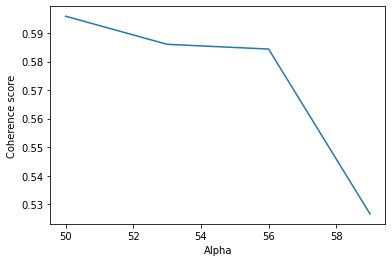

In [33]:
# Show graph
limit=60; start=50; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Alpha")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [34]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Alpha =", m, 'Coherence: ', round(cv, 4))

Alpha = 50 Coherence:  0.5959
Alpha = 53 Coherence:  0.5861
Alpha = 56 Coherence:  0.5844
Alpha = 59 Coherence:  0.5266


## 3. Range of iterations

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_iter in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, alpha=50, id2word=id2word, random_seed=100, iterations=num_iter)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=500, 
                                                        limit=5500, 
                                                        step=500)

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.60058
<720> LL/token: -7.59593
<730> LL/token: -7.59162
<740> LL/token: -7.595

0	5	tea dinner breakfast bread clothe washing cake fish job meat kitchen wash cooking lot wind garden milk goat mutton sewing 
1	5	letter pound train wife flour mill meeting land business ship board school news money paper steamer interest arrangement bower reading 
2	5	town port wheat club church bank party price sale ton account whist doctor share order wine lunched affair railway tender 
3	5	home walk child dress drive talk garden row flower ride call glass poll mama deal door plant finish tree read 
4	5	home work truck boat side book wood game aunt gun mill chapel dog point load place rate river duck fellow 
5	5	bed dinner sleep bath hand lot head beach friend supper vessel weather change shower leave store life sea heat foot 
6	5	thing people place man house station child girl trouble lunch woman mother family sister dust rest police baby road drink 
7	5	house office question motion 

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing trouble place woman store mother tank vessel drink pair 
7	5	house office motion govt talk return treas

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1520> LL/token: -7.62025
<1530> LL/token: -7.61974
<1540> LL/token: -7.63013

0	5	tea dinner breakfast bread lot clothe bath washing cake fish meat thing job wash garden milk goat beach mutton sewing 
1	5	pound letter town port train wife mill church meeting land ship school board affair college business steamer bower reading committee 
2	5	wheat town club port letter flour bank office party price sale ton account wine paper whist order doctor share news 
3	5	home walk dress child friend talk drive row garden ride flower call poll mama door finish plant tree mind deal 
4	5	home work truck boat side book wood place game aunt gun mill beach chapel dog money river deal load rate 
5	5	weather rain dinner bed hand head supper vessel store sleep point shower dust fellow trip life change pain showery care 
6	5	house people man child station home place road girl trouble lunch woman mother family sister police baby drink thing son 
7	5	house question motion govt office cabinet matter return tr

<1830> LL/token: -7.62809
<1840> LL/token: -7.63021

0	5	tea dinner breakfast bread bath lot clothe washing cake fish job meat thing garden milk wash mutton sewing beach fishing 
1	5	town port letter train pound church meeting mill land wife ship board school affair college doctor party business steamer bower 
2	5	wheat letter club pound flour town bank wife port office price sale ton account wine whist paper party share news 
3	5	home walk dress child drive friend talk garden row flower call poll mama door ride glass finish plant tree read 
4	5	home work truck boat mill book wood side game aunt gun beach chapel dog deal river load rate duck ground 
5	5	weather rain dinner bed hand vessel store bird head place change shower dust people fellow pain sea trip point life 
6	5	man place house road station people thing home child girl trouble lunch woman mother family sister tea baby drink wash 
7	5	house office question motion govt club cabinet matter treasurer member vote genl report notic

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.60058
<720> LL/token: -7.59593
<730> LL/token: -7.59162
<740> LL/token: -7.595

0	5	tea dinner breakfast bread clothe washing cake fish job meat kitchen wash cooking lot wind garden milk goat mutton sewing 
1	5	letter pound train wife flour mill meeting land business ship board school news money paper steamer interest arrangement bower reading 
2	5	town port wheat club church bank party price sale ton account whist doctor share order wine lunched affair railway tender 
3	5	home walk child dress drive talk garden row flower ride call glass poll mama deal door plant finish tree read 
4	5	home work truck boat side book wood game aunt gun mill chapel dog point load place rate river duck fellow 
5	5	bed dinner sleep bath hand lot head beach friend supper vessel weather change shower leave store life sea heat foot 
6	5	thing people place man house station child girl trouble lunch woman mother family sister dust rest police baby road drink 
7	5	house office question motion 

<1010> LL/token: -7.60627
<1020> LL/token: -7.6111
<1030> LL/token: -7.6024
<1040> LL/token: -7.6092

0	5	tea dinner lot bread breakfast clothe cake washing wind thing fish job meat kitchen cooking trip bath wash milk goat 
1	5	letter pound train wife meeting church port land board business ship school news mill affair money interest steamer bower reading 
2	5	town port wheat club flour bank party mill price sale ton office wine whist doctor account share lunched railway college 
3	5	home walk dress child garden drive talk row flower ride friend call poll mama door glass deal finish buggy plant 
4	5	home work truck boat wood book game aunt gun side mill chapel dog river deal load rate duck ground bit 
5	5	dinner bed weather sleep hand bath head beach supper vessel store change shower leave life sea fellow care heat foot 
6	5	place thing man house people child station girl trouble lunch woman rest mother sister police baby family son drink wash 
7	5	house office question motion govt cab

<1320> LL/token: -7.62109
<1330> LL/token: -7.61944
<1340> LL/token: -7.61706

0	5	tea dinner breakfast bread lot clothe bath thing washing cake fish job meat milk goat mutton wash sewing cooking fishing 
1	5	pound letter train town wife port church meeting mill business price ship board land school money college steamer interest reading 
2	5	town wheat port club flour bank office letter party sale ton account whist order doctor wine share news lunched paper 
3	5	home walk dress drive garden friend talk child row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat mill side book wood game beach gun aunt chapel dog deal river load rate duck ground 
5	5	dinner weather bed rain hand head supper sleep vessel store change dust leave bath trip life pain sea fellow care 
6	5	people man place child house thing station girl trouble lunch woman rest mother family sister road wash police baby drink 
7	5	house question motion govt office cabinet club treasurer me

<1630> LL/token: -7.62085
<1640> LL/token: -7.62247

0	5	tea dinner breakfast lot bread clothe bath washing cake fish job meat thing beach wash garden milk goat mutton sewing 
1	5	town letter port train wife pound church mill meeting land board ship school affair college business steamer bower reading pay 
2	5	wheat pound club flour town office bank port letter party price sale ton account wine whist order paper share news 
3	5	home walk child dress drive friend talk garden row flower ride leave poll call mama door finish plant mind read 
4	5	home work truck boat side book wood mill game aunt gun chapel dog deal money river load rate duck ground 
5	5	weather rain dinner hand head supper vessel store bed point change dust shower fellow trip life pain sea care writing 
6	5	house people man place bed station thing child girl trouble woman rest home lunch mother family sister road police baby 
7	5	house question motion govt office cabinet matter return treasurer member club vote genl repor


0	5	tea dinner breakfast bath lot bread clothe cake washing fish job beach meat wash milk cooking goat sewing fishing potato 
1	5	port town train letter pound church meeting land mill ship wife school doctor board affair college business person steamer bower 
2	5	letter wheat pound club flour wife bank office party town price sale ton account wine whist share news lunched railway 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door finish plant tree read round 
4	5	home work truck boat mill deal side book wood game aunt gun chapel dog river load rate duck ground bit 
5	5	weather rain dinner hand head store place vessel bird point mail shower dust change trip pain sea fellow showery writing 
6	5	man people house home place station child girl trouble woman lunch mother sister family supper thing police care heat baby 
7	5	house question motion govt office cabinet matter return club treasurer paper member vote genl report speech notice view case debate 


0	5	tea dinner breakfast bath lot bread clothe cake washing fish job meat thing wash beach pain milk goat mutton sewing 
1	5	town port pound train church mill meeting land ship school board letter doctor affair college person steamer business bower reading 
2	5	letter wheat club flour wife pound bank party price paper ton sale account whist order share office news lunched railway 
3	5	walk home dress garden child talk friend row flower drive ride call poll leave mama door finish plant tree mind 
4	5	home work truck boat side wood mill book game aunt gun deal water chapel dog river load beach rate duck 
5	5	weather rain dinner hand mail vessel store cooking point bird change shower dust trip sea writing showery life fellow place 
6	5	man people place home child road station house girl trouble rest woman mother lunch sister police drink family baby son 
7	5	house office question motion govt cabinet matter return treasurer member vote genl report notice club speech view state case debate

<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing trouble place woman store mother tank vessel drink pair 
7	5	house office motion govt talk return treas

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1520> LL/token: -7.62025
<1530> LL/token: -7.61974
<1540> LL/token: -7.63013

0	5	tea dinner breakfast bread lot clothe bath washing cake fish meat thing job wash garden milk goat beach mutton sewing 
1	5	pound letter town port train wife mill church meeting land ship school board affair college business steamer bower reading committee 
2	5	wheat town club port letter flour bank office party price sale ton account wine paper whist order doctor share news 
3	5	home walk dress child friend talk drive row garden ride flower call poll mama door finish plant tree mind deal 
4	5	home work truck boat side book wood place game aunt gun mill beach chapel dog money river deal load rate 
5	5	weather rain dinner bed hand head supper vessel store sleep point shower dust fellow trip life change pain showery care 
6	5	house people man child station home place road girl trouble lunch woman mother family sister police baby drink thing son 
7	5	house question motion govt office cabinet matter return tr

<1830> LL/token: -7.62809
<1840> LL/token: -7.63021

0	5	tea dinner breakfast bread bath lot clothe washing cake fish job meat thing garden milk wash mutton sewing beach fishing 
1	5	town port letter train pound church meeting mill land wife ship board school affair college doctor party business steamer bower 
2	5	wheat letter club pound flour town bank wife port office price sale ton account wine whist paper party share news 
3	5	home walk dress child drive friend talk garden row flower call poll mama door ride glass finish plant tree read 
4	5	home work truck boat mill book wood side game aunt gun beach chapel dog deal river load rate duck ground 
5	5	weather rain dinner bed hand vessel store bird head place change shower dust people fellow pain sea trip point life 
6	5	man place house road station people thing home child girl trouble lunch woman mother family sister tea baby drink wash 
7	5	house office question motion govt club cabinet matter treasurer member vote genl report notic

<2140> LL/token: -7.58922

0	5	tea dinner breakfast bath bread lot clothe thing washing cake fish job meat wash cooking garden milk goat mutton sewing 
1	5	town port pound train letter church mill wife meeting land ship board school doctor affair college person business steamer bower 
2	5	letter wheat club flour pound bank party wife office price sale paper ton account whist order wine share news lunched 
3	5	walk home dress drive friend talk child garden row ride flower call poll mama door plant finish tree read round 
4	5	home work truck boat book wood deal side game mill aunt gun beach chapel dog river load rate duck ground 
5	5	weather dinner rain hand mail vessel store place point bird head change shower dust trip sea showery fellow writing telegraph 
6	5	people man child home place station house girl road trouble lunch woman mother leave family sister rest police drink son 
7	5	house office question motion govt cabinet matter return treasurer club member vote genl notice speech v

<2440> LL/token: -7.59107

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job meat wash beach pain milk mutton goat garden fishing 
1	5	town port pound train church mill meeting land letter board ship wine school doctor college person steamer interest business bower 
2	5	letter wheat club wife flour pound bank party office price sale ton account whist paper order share news lunched affair 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat deal wood book side game aunt gun mill chapel dog river beach money rate duck ground 
5	5	dinner weather rain hand vessel mail store cooking bird point shower dust trip life sea writing leave change country fellow 
6	5	place people man house road child station home girl thing trouble lunch woman mother rest sister police baby drink family 
7	5	house office question motion govt cabinet treasurer return club member matter vote genl report notice

<2740> LL/token: -7.58872

0	5	dinner tea breakfast bath bread clothe lot washing cake fish job meat garden pain beach milk goat mutton sewing fishing 
1	5	port town train pound church meeting land mill ship wine school board doctor college business person interest steamer money bower 
2	5	letter wheat pound wife club flour bank paper party price sale ton town whist share news order affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door finish plant read tree mind 
4	5	home work truck boat mill deal side book wood game aunt gun water chapel dog beach river load duck rate 
5	5	weather rain dinner hand wind vessel store mail bird cooking change shower dust point trip life sea pair showery note 
6	5	place people man road house station thing wash girl trouble child lunch woman mother family sister police baby drink horse 
7	5	house office question motion govt cabinet club matter treasurer member return vote genl report speech view stat

<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing trouble place woman store mother tank vessel drink pair 
7	5	house office motion govt talk return treas

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1520> LL/token: -7.62025
<1530> LL/token: -7.61974
<1540> LL/token: -7.63013

0	5	tea dinner breakfast bread lot clothe bath washing cake fish meat thing job wash garden milk goat beach mutton sewing 
1	5	pound letter town port train wife mill church meeting land ship school board affair college business steamer bower reading committee 
2	5	wheat town club port letter flour bank office party price sale ton account wine paper whist order doctor share news 
3	5	home walk dress child friend talk drive row garden ride flower call poll mama door finish plant tree mind deal 
4	5	home work truck boat side book wood place game aunt gun mill beach chapel dog money river deal load rate 
5	5	weather rain dinner bed hand head supper vessel store sleep point shower dust fellow trip life change pain showery care 
6	5	house people man child station home place road girl trouble lunch woman mother family sister police baby drink thing son 
7	5	house question motion govt office cabinet matter return tr

<1830> LL/token: -7.62809
<1840> LL/token: -7.63021

0	5	tea dinner breakfast bread bath lot clothe washing cake fish job meat thing garden milk wash mutton sewing beach fishing 
1	5	town port letter train pound church meeting mill land wife ship board school affair college doctor party business steamer bower 
2	5	wheat letter club pound flour town bank wife port office price sale ton account wine whist paper party share news 
3	5	home walk dress child drive friend talk garden row flower call poll mama door ride glass finish plant tree read 
4	5	home work truck boat mill book wood side game aunt gun beach chapel dog deal river load rate duck ground 
5	5	weather rain dinner bed hand vessel store bird head place change shower dust people fellow pain sea trip point life 
6	5	man place house road station people thing home child girl trouble lunch woman mother family sister tea baby drink wash 
7	5	house office question motion govt club cabinet matter treasurer member vote genl report notic

<2140> LL/token: -7.58922

0	5	tea dinner breakfast bath bread lot clothe thing washing cake fish job meat wash cooking garden milk goat mutton sewing 
1	5	town port pound train letter church mill wife meeting land ship board school doctor affair college person business steamer bower 
2	5	letter wheat club flour pound bank party wife office price sale paper ton account whist order wine share news lunched 
3	5	walk home dress drive friend talk child garden row ride flower call poll mama door plant finish tree read round 
4	5	home work truck boat book wood deal side game mill aunt gun beach chapel dog river load rate duck ground 
5	5	weather dinner rain hand mail vessel store place point bird head change shower dust trip sea showery fellow writing telegraph 
6	5	people man child home place station house girl road trouble lunch woman mother leave family sister rest police drink son 
7	5	house office question motion govt cabinet matter return treasurer club member vote genl notice speech v

<2440> LL/token: -7.59107

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job meat wash beach pain milk mutton goat garden fishing 
1	5	town port pound train church mill meeting land letter board ship wine school doctor college person steamer interest business bower 
2	5	letter wheat club wife flour pound bank party office price sale ton account whist paper order share news lunched affair 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat deal wood book side game aunt gun mill chapel dog river beach money rate duck ground 
5	5	dinner weather rain hand vessel mail store cooking bird point shower dust trip life sea writing leave change country fellow 
6	5	place people man house road child station home girl thing trouble lunch woman mother rest sister police baby drink family 
7	5	house office question motion govt cabinet treasurer return club member matter vote genl report notice

<2740> LL/token: -7.58872

0	5	dinner tea breakfast bath bread clothe lot washing cake fish job meat garden pain beach milk goat mutton sewing fishing 
1	5	port town train pound church meeting land mill ship wine school board doctor college business person interest steamer money bower 
2	5	letter wheat pound wife club flour bank paper party price sale ton town whist share news order affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door finish plant read tree mind 
4	5	home work truck boat mill deal side book wood game aunt gun water chapel dog beach river load duck rate 
5	5	weather rain dinner hand wind vessel store mail bird cooking change shower dust point trip life sea pair showery note 
6	5	place people man road house station thing wash girl trouble child lunch woman mother family sister police baby drink horse 
7	5	house office question motion govt cabinet club matter treasurer member return vote genl report speech view stat

<3030> LL/token: -7.58832
<3040> LL/token: -7.59373

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat bed pain beach milk garden mutton goat sewing 
1	5	town port train pound mill church meeting land ship school doctor board wine college business steamer interest bower reading glass 
2	5	letter wheat wife club flour pound bank party paper price sale ton account whist share news lunched affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door buggy plant tree mind read 
4	5	home work truck boat side book wood mill aunt gun water game dog chapel river beach deal load rate duck 
5	5	weather rain dinner wind hand vessel store bird shower dust change sea trip life showery writing telegraph cooking message point 
6	5	place people man house station wash girl trouble horse road lunch woman mother leave family sister home thing police baby 
7	5	house office question motion govt club cabinet matter return treasurer mem

<3320> LL/token: -7.5707
<3330> LL/token: -7.58643
<3340> LL/token: -7.58224

0	5	tea dinner breakfast lot bread clothe bath washing cake fish job meat cooking pain milk goat beach mutton sewing fishing 
1	5	town port pound train church meeting land board mill ship school doctor money wine college person business steamer bower reading 
2	5	letter wheat wife flour club pound bank party paper price sale ton account whist share news lunched affair railway office 
3	5	home walk dress child drive friend talk garden row flower ride call glass poll mama door buggy finish plant round 
4	5	home work truck boat side wood book deal game aunt gun mill chapel dog river beach load rate duck bit 
5	5	weather rain dinner wind hand vessel store bird point bath change shower dust life sea showery writing telegraph message fellow 
6	5	place man people road house station child girl horse trouble lunch woman thing mother rest wash family sister police baby 
7	5	house office question motion govt club cabine

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.60058
<720> LL/token: -7.59593
<730> LL/token: -7.59162
<740> LL/token: -7.595

0	5	tea dinner breakfast bread clothe washing cake fish job meat kitchen wash cooking lot wind garden milk goat mutton sewing 
1	5	letter pound train wife flour mill meeting land business ship board school news money paper steamer interest arrangement bower reading 
2	5	town port wheat club church bank party price sale ton account whist doctor share order wine lunched affair railway tender 
3	5	home walk child dress drive talk garden row flower ride call glass poll mama deal door plant finish tree read 
4	5	home work truck boat side book wood game aunt gun mill chapel dog point load place rate river duck fellow 
5	5	bed dinner sleep bath hand lot head beach friend supper vessel weather change shower leave store life sea heat foot 
6	5	thing people place man house station child girl trouble lunch woman mother family sister dust rest police baby road drink 
7	5	house office question motion 

<1010> LL/token: -7.60627
<1020> LL/token: -7.6111
<1030> LL/token: -7.6024
<1040> LL/token: -7.6092

0	5	tea dinner lot bread breakfast clothe cake washing wind thing fish job meat kitchen cooking trip bath wash milk goat 
1	5	letter pound train wife meeting church port land board business ship school news mill affair money interest steamer bower reading 
2	5	town port wheat club flour bank party mill price sale ton office wine whist doctor account share lunched railway college 
3	5	home walk dress child garden drive talk row flower ride friend call poll mama door glass deal finish buggy plant 
4	5	home work truck boat wood book game aunt gun side mill chapel dog river deal load rate duck ground bit 
5	5	dinner bed weather sleep hand bath head beach supper vessel store change shower leave life sea fellow care heat foot 
6	5	place thing man house people child station girl trouble lunch woman rest mother sister police baby family son drink wash 
7	5	house office question motion govt cab

<1320> LL/token: -7.62109
<1330> LL/token: -7.61944
<1340> LL/token: -7.61706

0	5	tea dinner breakfast bread lot clothe bath thing washing cake fish job meat milk goat mutton wash sewing cooking fishing 
1	5	pound letter train town wife port church meeting mill business price ship board land school money college steamer interest reading 
2	5	town wheat port club flour bank office letter party sale ton account whist order doctor wine share news lunched paper 
3	5	home walk dress drive garden friend talk child row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat mill side book wood game beach gun aunt chapel dog deal river load rate duck ground 
5	5	dinner weather bed rain hand head supper sleep vessel store change dust leave bath trip life pain sea fellow care 
6	5	people man place child house thing station girl trouble lunch woman rest mother family sister road wash police baby drink 
7	5	house question motion govt office cabinet club treasurer me

<1630> LL/token: -7.62085
<1640> LL/token: -7.62247

0	5	tea dinner breakfast lot bread clothe bath washing cake fish job meat thing beach wash garden milk goat mutton sewing 
1	5	town letter port train wife pound church mill meeting land board ship school affair college business steamer bower reading pay 
2	5	wheat pound club flour town office bank port letter party price sale ton account wine whist order paper share news 
3	5	home walk child dress drive friend talk garden row flower ride leave poll call mama door finish plant mind read 
4	5	home work truck boat side book wood mill game aunt gun chapel dog deal money river load rate duck ground 
5	5	weather rain dinner hand head supper vessel store bed point change dust shower fellow trip life pain sea care writing 
6	5	house people man place bed station thing child girl trouble woman rest home lunch mother family sister road police baby 
7	5	house question motion govt office cabinet matter return treasurer member club vote genl repor


0	5	tea dinner breakfast bath lot bread clothe cake washing fish job beach meat wash milk cooking goat sewing fishing potato 
1	5	port town train letter pound church meeting land mill ship wife school doctor board affair college business person steamer bower 
2	5	letter wheat pound club flour wife bank office party town price sale ton account wine whist share news lunched railway 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door finish plant tree read round 
4	5	home work truck boat mill deal side book wood game aunt gun chapel dog river load rate duck ground bit 
5	5	weather rain dinner hand head store place vessel bird point mail shower dust change trip pain sea fellow showery writing 
6	5	man people house home place station child girl trouble woman lunch mother sister family supper thing police care heat baby 
7	5	house question motion govt office cabinet matter return club treasurer paper member vote genl report speech notice view case debate 


0	5	tea dinner breakfast bath lot bread clothe cake washing fish job meat thing wash beach pain milk goat mutton sewing 
1	5	town port pound train church mill meeting land ship school board letter doctor affair college person steamer business bower reading 
2	5	letter wheat club flour wife pound bank party price paper ton sale account whist order share office news lunched railway 
3	5	walk home dress garden child talk friend row flower drive ride call poll leave mama door finish plant tree mind 
4	5	home work truck boat side wood mill book game aunt gun deal water chapel dog river load beach rate duck 
5	5	weather rain dinner hand mail vessel store cooking point bird change shower dust trip sea writing showery life fellow place 
6	5	man people place home child road station house girl trouble rest woman mother lunch sister police drink family baby son 
7	5	house office question motion govt cabinet matter return treasurer member vote genl report notice club speech view state case debate

<2540> LL/token: -7.57493

0	5	tea dinner breakfast bath lot bread clothe cake washing fish job meat garden pain beach milk goat mutton sewing fishing 
1	5	town port pound train church mill meeting land board ship school doctor money college person steamer bower reading business pay 
2	5	letter wheat club wife flour bank party pound price sale ton office account whist order news share wine lunched affair 
3	5	home walk dress child drive friend talk garden row flower ride call glass poll mama door finish plant mind read 
4	5	home work truck boat deal side wood game aunt gun mill book chapel dog beach river water load rate duck 
5	5	weather dinner rain hand wind vessel store cooking mail bird point change dust shower trip sea life showery pair writing 
6	5	place people man house child road station wash thing girl trouble lunch woman mother family sister police baby drink leave 
7	5	house office question motion govt cabinet club matter treasurer member vote genl report return notice speec

<2840> LL/token: -7.59892

0	5	tea dinner breakfast bath bread clothe lot washing cake fish job meat garden pain milk goat sewing mutton fishing potato 
1	5	town port train pound church mill meeting land ship board school doctor college steamer interest bower reading business money pay 
2	5	letter wheat wife club pound flour bank party paper price sale ton whist account share news lunched affair railway town 
3	5	walk home dress child friend talk drive row flower garden ride poll call mama door finish plant buggy mind round 
4	5	home work truck boat deal side wood book game mill aunt gun beach chapel dog river load rate duck ground 
5	5	weather rain dinner wind hand mail vessel store bird cooking change shower dust sea point writing trip showery pair telegraph 
6	5	man people house place road station home horse wash girl thing trouble woman child lunch mother family sister leave police 
7	5	house office question motion govt cabinet matter treasurer member club return vote genl report n

<3130> LL/token: -7.57719
<3140> LL/token: -7.57184

0	5	tea dinner breakfast lot bread bath clothe washing cake fish job meat pain milk mutton beach cooking goat fishing potato 
1	5	town port train pound church meeting land board mill ship school doctor college person business steamer interest bower reading money 
2	5	letter wheat wife club pound flour bank party paper price sale ton account whist share news lunched affair railway tender 
3	5	home walk dress garden drive child talk friend row flower call glass poll mama ride door buggy deal finish plant 
4	5	home work truck boat mill side wood game book aunt gun beach chapel dog river deal load rate water duck 
5	5	weather rain dinner wind hand vessel store bird change shower dust trip life sea showery writing note telegraph message point 
6	5	place man child house people road station wash girl trouble lunch woman horse mother rest leave family sister police baby 
7	5	house office question motion govt cabinet matter club treasurer mem

<3420> LL/token: -7.57988
<3430> LL/token: -7.57999
<3440> LL/token: -7.58781

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat kitchen cooking pain milk goat mutton sewing wash 
1	5	town port pound train church meeting land board ship school doctor money mill business college person steamer bower reading pay 
2	5	letter wheat wife flour club pound bank party paper mill price sale ton account whist order office share news affair 
3	5	home walk dress child garden drive friend talk row flower ride call poll mama door finish plant buggy mind deal 
4	5	home work truck boat side book wood game aunt gun beach mill chapel dog deal river water load rate duck 
5	5	weather rain dinner wind hand vessel black store bird point change shower dust life sea thunder showery writing telegraph message 
6	5	place people man house road child station thing trouble woman lunch mother sister family wash horse police girl baby drink 
7	5	house office question motion govt club cabinet t

<3710> LL/token: -7.59269
<3720> LL/token: -7.5831
<3730> LL/token: -7.59489
<3740> LL/token: -7.59128

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job meat kitchen thing wash pain milk goat garden mutton 
1	5	town port pound train church mill meeting land board ship account doctor money college school person steamer wife reading end 
2	5	letter wheat flour wife pound club party paper bank price sale ton office whist share news order lunched affair railway 
3	5	home walk dress child drive talk garden row flower friend ride call poll mama door buggy plant finish glass tree 
4	5	home work truck boat deal mill book wood side beach game aunt water gun chapel dog river load rate duck 
5	5	dinner weather rain wind hand vessel store black point change shower dust thunder trip sea cooking showery writing fellow note 
6	5	place house people man tea station road home girl trouble lunch woman mother family thing sister police baby drink son 
7	5	house office question motion g

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1520> LL/token: -7.62025
<1530> LL/token: -7.61974
<1540> LL/token: -7.63013

0	5	tea dinner breakfast bread lot clothe bath washing cake fish meat thing job wash garden milk goat beach mutton sewing 
1	5	pound letter town port train wife mill church meeting land ship school board affair college business steamer bower reading committee 
2	5	wheat town club port letter flour bank office party price sale ton account wine paper whist order doctor share news 
3	5	home walk dress child friend talk drive row garden ride flower call poll mama door finish plant tree mind deal 
4	5	home work truck boat side book wood place game aunt gun mill beach chapel dog money river deal load rate 
5	5	weather rain dinner bed hand head supper vessel store sleep point shower dust fellow trip life change pain showery care 
6	5	house people man child station home place road girl trouble lunch woman mother family sister police baby drink thing son 
7	5	house question motion govt office cabinet matter return tr

<1830> LL/token: -7.62809
<1840> LL/token: -7.63021

0	5	tea dinner breakfast bread bath lot clothe washing cake fish job meat thing garden milk wash mutton sewing beach fishing 
1	5	town port letter train pound church meeting mill land wife ship board school affair college doctor party business steamer bower 
2	5	wheat letter club pound flour town bank wife port office price sale ton account wine whist paper party share news 
3	5	home walk dress child drive friend talk garden row flower call poll mama door ride glass finish plant tree read 
4	5	home work truck boat mill book wood side game aunt gun beach chapel dog deal river load rate duck ground 
5	5	weather rain dinner bed hand vessel store bird head place change shower dust people fellow pain sea trip point life 
6	5	man place house road station people thing home child girl trouble lunch woman mother family sister tea baby drink wash 
7	5	house office question motion govt club cabinet matter treasurer member vote genl report notic

<2140> LL/token: -7.58922

0	5	tea dinner breakfast bath bread lot clothe thing washing cake fish job meat wash cooking garden milk goat mutton sewing 
1	5	town port pound train letter church mill wife meeting land ship board school doctor affair college person business steamer bower 
2	5	letter wheat club flour pound bank party wife office price sale paper ton account whist order wine share news lunched 
3	5	walk home dress drive friend talk child garden row ride flower call poll mama door plant finish tree read round 
4	5	home work truck boat book wood deal side game mill aunt gun beach chapel dog river load rate duck ground 
5	5	weather dinner rain hand mail vessel store place point bird head change shower dust trip sea showery fellow writing telegraph 
6	5	people man child home place station house girl road trouble lunch woman mother leave family sister rest police drink son 
7	5	house office question motion govt cabinet matter return treasurer club member vote genl notice speech v

<2440> LL/token: -7.59107

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job meat wash beach pain milk mutton goat garden fishing 
1	5	town port pound train church mill meeting land letter board ship wine school doctor college person steamer interest business bower 
2	5	letter wheat club wife flour pound bank party office price sale ton account whist paper order share news lunched affair 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat deal wood book side game aunt gun mill chapel dog river beach money rate duck ground 
5	5	dinner weather rain hand vessel mail store cooking bird point shower dust trip life sea writing leave change country fellow 
6	5	place people man house road child station home girl thing trouble lunch woman mother rest sister police baby drink family 
7	5	house office question motion govt cabinet treasurer return club member matter vote genl report notice

<2740> LL/token: -7.58872

0	5	dinner tea breakfast bath bread clothe lot washing cake fish job meat garden pain beach milk goat mutton sewing fishing 
1	5	port town train pound church meeting land mill ship wine school board doctor college business person interest steamer money bower 
2	5	letter wheat pound wife club flour bank paper party price sale ton town whist share news order affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door finish plant read tree mind 
4	5	home work truck boat mill deal side book wood game aunt gun water chapel dog beach river load duck rate 
5	5	weather rain dinner hand wind vessel store mail bird cooking change shower dust point trip life sea pair showery note 
6	5	place people man road house station thing wash girl trouble child lunch woman mother family sister police baby drink horse 
7	5	house office question motion govt cabinet club matter treasurer member return vote genl report speech view stat

<3030> LL/token: -7.58832
<3040> LL/token: -7.59373

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat bed pain beach milk garden mutton goat sewing 
1	5	town port train pound mill church meeting land ship school doctor board wine college business steamer interest bower reading glass 
2	5	letter wheat wife club flour pound bank party paper price sale ton account whist share news lunched affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door buggy plant tree mind read 
4	5	home work truck boat side book wood mill aunt gun water game dog chapel river beach deal load rate duck 
5	5	weather rain dinner wind hand vessel store bird shower dust change sea trip life showery writing telegraph cooking message point 
6	5	place people man house station wash girl trouble horse road lunch woman mother leave family sister home thing police baby 
7	5	house office question motion govt club cabinet matter return treasurer mem

<3320> LL/token: -7.5707
<3330> LL/token: -7.58643
<3340> LL/token: -7.58224

0	5	tea dinner breakfast lot bread clothe bath washing cake fish job meat cooking pain milk goat beach mutton sewing fishing 
1	5	town port pound train church meeting land board mill ship school doctor money wine college person business steamer bower reading 
2	5	letter wheat wife flour club pound bank party paper price sale ton account whist share news lunched affair railway office 
3	5	home walk dress child drive friend talk garden row flower ride call glass poll mama door buggy finish plant round 
4	5	home work truck boat side wood book deal game aunt gun mill chapel dog river beach load rate duck bit 
5	5	weather rain dinner wind hand vessel store bird point bath change shower dust life sea showery writing telegraph message fellow 
6	5	place man people road house station child girl horse trouble lunch woman thing mother rest wash family sister police baby 
7	5	house office question motion govt club cabine

<3610> LL/token: -7.58496
<3620> LL/token: -7.57997
<3630> LL/token: -7.57844
<3640> LL/token: -7.58038

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat kitchen wash cooking pain garden milk goat beach 
1	5	town port pound train church mill meeting wife land ship board school doctor money business college steamer interest reading committee 
2	5	letter wheat club flour bank wife party paper price sale ton account whist share news lunched office railway affair pound 
3	5	home walk dress child drive friend talk garden row flower ride call poll mama glass door finish plant mind read 
4	5	home work truck boat deal side wood mill game book aunt gun beach chapel dog water river load rate duck 
5	5	weather dinner rain wind hand black vessel store change shower dust thunder trip sea life point showery writing telegraph message 
6	5	place people house man road station home girl thing lunch woman mother family sister police leave baby tea son drink 
7	5	house office ques

<3910> LL/token: -7.5836
<3920> LL/token: -7.57792
<3930> LL/token: -7.57899
<3940> LL/token: -7.59838

0	5	dinner tea breakfast lot bread bath clothe washing cake fish job wash meat kitchen cooking thing pain beach garden milk 
1	5	town port train pound church mill meeting land ship account school doctor money board college person letter steamer bower reading 
2	5	letter wheat wife club flour pound bank party paper office price sale ton whist order share news affair railway lunched 
3	5	walk home dress drive talk garden child row flower ride call poll friend mama door heat plant mind read round 
4	5	home work truck boat side wood book mill game deal aunt gun chapel dog river beach rate duck ground bit 
5	5	weather rain dinner wind black hand vessel store point shower dust change life thunder sea trip showery writing message light 
6	5	place people man house home road tea station girl trouble woman lunch mother leave sister family police baby drink son 
7	5	house office question motion

<4210> LL/token: -7.59563
<4220> LL/token: -7.58659
<4230> LL/token: -7.58909
<4240> LL/token: -7.59527

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job kitchen meat wash pain cooking milk goat mutton sewing 
1	5	town port pound train church meeting land mill ship account wife doctor board school affair college person steamer bower reading 
2	5	letter wheat club flour pound wife bank party paper office price sale ton house wine whist share news lunched railway 
3	5	walk home dress garden drive talk child friend row flower ride call poll mama door finish plant read heat round 
4	5	home work truck boat mill deal wood side game aunt gun book chapel dog money water river beach load rate 
5	5	weather rain dinner wind hand vessel store black change shower dust beach thunder life point sea fellow showery writing trip 
6	5	place people man road station house tea thing trouble breakfast lunch woman family sister leave home police baby son drink 
7	5	house office question mo

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1520> LL/token: -7.62025
<1530> LL/token: -7.61974
<1540> LL/token: -7.63013

0	5	tea dinner breakfast bread lot clothe bath washing cake fish meat thing job wash garden milk goat beach mutton sewing 
1	5	pound letter town port train wife mill church meeting land ship school board affair college business steamer bower reading committee 
2	5	wheat town club port letter flour bank office party price sale ton account wine paper whist order doctor share news 
3	5	home walk dress child friend talk drive row garden ride flower call poll mama door finish plant tree mind deal 
4	5	home work truck boat side book wood place game aunt gun mill beach chapel dog money river deal load rate 
5	5	weather rain dinner bed hand head supper vessel store sleep point shower dust fellow trip life change pain showery care 
6	5	house people man child station home place road girl trouble lunch woman mother family sister police baby drink thing son 
7	5	house question motion govt office cabinet matter return tr

<1830> LL/token: -7.62809
<1840> LL/token: -7.63021

0	5	tea dinner breakfast bread bath lot clothe washing cake fish job meat thing garden milk wash mutton sewing beach fishing 
1	5	town port letter train pound church meeting mill land wife ship board school affair college doctor party business steamer bower 
2	5	wheat letter club pound flour town bank wife port office price sale ton account wine whist paper party share news 
3	5	home walk dress child drive friend talk garden row flower call poll mama door ride glass finish plant tree read 
4	5	home work truck boat mill book wood side game aunt gun beach chapel dog deal river load rate duck ground 
5	5	weather rain dinner bed hand vessel store bird head place change shower dust people fellow pain sea trip point life 
6	5	man place house road station people thing home child girl trouble lunch woman mother family sister tea baby drink wash 
7	5	house office question motion govt club cabinet matter treasurer member vote genl report notic

<2140> LL/token: -7.58922

0	5	tea dinner breakfast bath bread lot clothe thing washing cake fish job meat wash cooking garden milk goat mutton sewing 
1	5	town port pound train letter church mill wife meeting land ship board school doctor affair college person business steamer bower 
2	5	letter wheat club flour pound bank party wife office price sale paper ton account whist order wine share news lunched 
3	5	walk home dress drive friend talk child garden row ride flower call poll mama door plant finish tree read round 
4	5	home work truck boat book wood deal side game mill aunt gun beach chapel dog river load rate duck ground 
5	5	weather dinner rain hand mail vessel store place point bird head change shower dust trip sea showery fellow writing telegraph 
6	5	people man child home place station house girl road trouble lunch woman mother leave family sister rest police drink son 
7	5	house office question motion govt cabinet matter return treasurer club member vote genl notice speech v

<2440> LL/token: -7.59107

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job meat wash beach pain milk mutton goat garden fishing 
1	5	town port pound train church mill meeting land letter board ship wine school doctor college person steamer interest business bower 
2	5	letter wheat club wife flour pound bank party office price sale ton account whist paper order share news lunched affair 
3	5	walk home dress child drive garden friend talk row flower ride call poll mama door glass finish plant tree mind 
4	5	home work truck boat deal wood book side game aunt gun mill chapel dog river beach money rate duck ground 
5	5	dinner weather rain hand vessel mail store cooking bird point shower dust trip life sea writing leave change country fellow 
6	5	place people man house road child station home girl thing trouble lunch woman mother rest sister police baby drink family 
7	5	house office question motion govt cabinet treasurer return club member matter vote genl report notice

<2740> LL/token: -7.58872

0	5	dinner tea breakfast bath bread clothe lot washing cake fish job meat garden pain beach milk goat mutton sewing fishing 
1	5	port town train pound church meeting land mill ship wine school board doctor college business person interest steamer money bower 
2	5	letter wheat pound wife club flour bank paper party price sale ton town whist share news order affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door finish plant read tree mind 
4	5	home work truck boat mill deal side book wood game aunt gun water chapel dog beach river load duck rate 
5	5	weather rain dinner hand wind vessel store mail bird cooking change shower dust point trip life sea pair showery note 
6	5	place people man road house station thing wash girl trouble child lunch woman mother family sister police baby drink horse 
7	5	house office question motion govt cabinet club matter treasurer member return vote genl report speech view stat

<3030> LL/token: -7.58832
<3040> LL/token: -7.59373

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat bed pain beach milk garden mutton goat sewing 
1	5	town port train pound mill church meeting land ship school doctor board wine college business steamer interest bower reading glass 
2	5	letter wheat wife club flour pound bank party paper price sale ton account whist share news lunched affair railway tender 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door buggy plant tree mind read 
4	5	home work truck boat side book wood mill aunt gun water game dog chapel river beach deal load rate duck 
5	5	weather rain dinner wind hand vessel store bird shower dust change sea trip life showery writing telegraph cooking message point 
6	5	place people man house station wash girl trouble horse road lunch woman mother leave family sister home thing police baby 
7	5	house office question motion govt club cabinet matter return treasurer mem

<3320> LL/token: -7.5707
<3330> LL/token: -7.58643
<3340> LL/token: -7.58224

0	5	tea dinner breakfast lot bread clothe bath washing cake fish job meat cooking pain milk goat beach mutton sewing fishing 
1	5	town port pound train church meeting land board mill ship school doctor money wine college person business steamer bower reading 
2	5	letter wheat wife flour club pound bank party paper price sale ton account whist share news lunched affair railway office 
3	5	home walk dress child drive friend talk garden row flower ride call glass poll mama door buggy finish plant round 
4	5	home work truck boat side wood book deal game aunt gun mill chapel dog river beach load rate duck bit 
5	5	weather rain dinner wind hand vessel store bird point bath change shower dust life sea showery writing telegraph message fellow 
6	5	place man people road house station child girl horse trouble lunch woman thing mother rest wash family sister police baby 
7	5	house office question motion govt club cabine

<3610> LL/token: -7.58496
<3620> LL/token: -7.57997
<3630> LL/token: -7.57844
<3640> LL/token: -7.58038

0	5	tea dinner breakfast bath bread lot clothe washing cake fish job meat kitchen wash cooking pain garden milk goat beach 
1	5	town port pound train church mill meeting wife land ship board school doctor money business college steamer interest reading committee 
2	5	letter wheat club flour bank wife party paper price sale ton account whist share news lunched office railway affair pound 
3	5	home walk dress child drive friend talk garden row flower ride call poll mama glass door finish plant mind read 
4	5	home work truck boat deal side wood mill game book aunt gun beach chapel dog water river load rate duck 
5	5	weather dinner rain wind hand black vessel store change shower dust thunder trip sea life point showery writing telegraph message 
6	5	place people house man road station home girl thing lunch woman mother family sister police leave baby tea son drink 
7	5	house office ques

<3910> LL/token: -7.5836
<3920> LL/token: -7.57792
<3930> LL/token: -7.57899
<3940> LL/token: -7.59838

0	5	dinner tea breakfast lot bread bath clothe washing cake fish job wash meat kitchen cooking thing pain beach garden milk 
1	5	town port train pound church mill meeting land ship account school doctor money board college person letter steamer bower reading 
2	5	letter wheat wife club flour pound bank party paper office price sale ton whist order share news affair railway lunched 
3	5	walk home dress drive talk garden child row flower ride call poll friend mama door heat plant mind read round 
4	5	home work truck boat side wood book mill game deal aunt gun chapel dog river beach rate duck ground bit 
5	5	weather rain dinner wind black hand vessel store point shower dust change life thunder sea trip showery writing message light 
6	5	place people man house home road tea station girl trouble woman lunch mother leave sister family police baby drink son 
7	5	house office question motion

<4210> LL/token: -7.59563
<4220> LL/token: -7.58659
<4230> LL/token: -7.58909
<4240> LL/token: -7.59527

0	5	tea dinner breakfast bath lot bread clothe washing cake fish job kitchen meat wash pain cooking milk goat mutton sewing 
1	5	town port pound train church meeting land mill ship account wife doctor board school affair college person steamer bower reading 
2	5	letter wheat club flour pound wife bank party paper office price sale ton house wine whist share news lunched railway 
3	5	walk home dress garden drive talk child friend row flower ride call poll mama door finish plant read heat round 
4	5	home work truck boat mill deal wood side game aunt gun book chapel dog money water river beach load rate 
5	5	weather rain dinner wind hand vessel store black change shower dust beach thunder life point sea fellow showery writing trip 
6	5	place people man road station house tea thing trouble breakfast lunch woman family sister leave home police baby son drink 
7	5	house office question mo

<4510> LL/token: -7.59404
<4520> LL/token: -7.59468
<4530> LL/token: -7.58765
<4540> LL/token: -7.58468

0	5	dinner tea lot bread breakfast clothe washing bath cake fish wash job meat kitchen garden cooking pain milk goat mutton 
1	5	town port train pound church mill meeting land ship account board school doctor affair college steamer bower reading carriage cheque 
2	5	letter wheat wife flour pound club bank party price sale ton wine office whist share news hand order lunched railway 
3	5	home walk dress child drive talk row flower ride garden friend call poll mama life door read mind plant round 
4	5	home work truck boat deal side book wood mill game aunt gun chapel dog water river load rate duck ground 
5	5	weather rain dinner wind vessel store bath black change shower dust beach fellow trip sea showery writing point bay telegraph 
6	5	place people house man road station tea thing trouble home lunch woman water mother family leave sister police baby drink 
7	5	house office question c

<4810> LL/token: -7.58625
<4820> LL/token: -7.5937
<4830> LL/token: -7.60216
<4840> LL/token: -7.59194

0	5	dinner tea breakfast bread lot clothe bath washing cake garden fish job wash meat kitchen cooking pain milk goat mutton 
1	5	town port pound train church meeting mill land board ship school doctor money college account affair steamer interest bower reading 
2	5	letter wheat wife club flour bank party sale ton paper wine whist office pound share news lunched railway price tender 
3	5	home walk dress child friend talk drive row flower ride call deal poll mama door garden finish plant tree mind 
4	5	home work truck boat mill wood side book game aunt gun chapel dog beach river load rate duck ground bit 
5	5	weather rain dinner wind vessel store bath point shower dust fellow sea trip beach change showery writing black cold telegraph 
6	5	people place man horse road house station tea trouble thing lunch home woman mother family sister police baby drink water 
7	5	house office question 

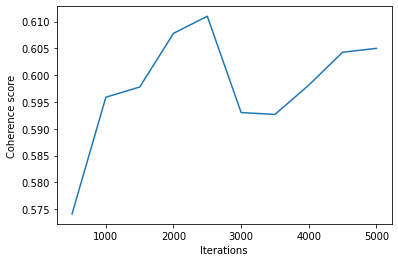

In [38]:
# Show graph
limit=5500; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Iterations")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [39]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Iterations =", m, 'Coherence: ', round(cv, 4))

Iterations = 500 Coherence:  0.5741
Iterations = 1000 Coherence:  0.5959
Iterations = 1500 Coherence:  0.5978
Iterations = 2000 Coherence:  0.6078
Iterations = 2500 Coherence:  0.611
Iterations = 3000 Coherence:  0.593
Iterations = 3500 Coherence:  0.5927
Iterations = 4000 Coherence:  0.5981
Iterations = 4500 Coherence:  0.6043
Iterations = 5000 Coherence:  0.605


In [40]:
# Coherence for 10-topic model, 50-alpha (default), 2500-iteration model
print(coherence_values[4])

# Topics for 10-topic model, 50-alpha (default), 2500-iteration model
malletModel_10a5i25 = model_list[4]
model_topics_10a5i25 = malletModel_10a5i25.show_topics(formatted=False)
pprint(sorted(malletModel_10a5i25.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA10a5i25 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_10a5i25)

# Visualize the topics
pyLDAvis.enable_notebook()
vis10a5i25 = pyLDAvis.gensim.prepare(MalletLDA10a5i25, corpus, id2word, sort_topics=False)
vis10a5i25


0.610987907616916
[(0,
  '0.134*"tea" + 0.120*"dinner" + 0.065*"breakfast" + 0.040*"bath" + '
  '0.038*"lot" + 0.036*"bread" + 0.030*"clothe" + 0.024*"washing" + '
  '0.023*"cake" + 0.020*"fish" + 0.017*"meat" + 0.012*"pain" + 0.011*"beach" + '
  '0.010*"milk" + 0.010*"goat" + 0.009*"sewing" + 0.009*"mutton" + '
  '0.009*"fishing" + 0.009*"job" + 0.008*"potato"'),
 (1,
  '0.094*"town" + 0.082*"port" + 0.055*"pound" + 0.044*"train" + 0.033*"mill" '
  '+ 0.028*"church" + 0.023*"meeting" + 0.021*"land" + 0.015*"ship" + '
  '0.013*"school" + 0.013*"board" + 0.012*"doctor" + 0.010*"college" + '
  '0.010*"person" + 0.009*"wine" + 0.009*"steamer" + 0.009*"interest" + '
  '0.008*"wife" + 0.008*"bower" + 0.008*"reading"'),
 (2,
  '0.089*"letter" + 0.050*"wheat" + 0.035*"flour" + 0.034*"wife" + '
  '0.029*"club" + 0.024*"bank" + 0.023*"party" + 0.022*"pound" + '
  '0.020*"office" + 0.019*"paper" + 0.016*"price" + 0.016*"sale" + 0.016*"ton" '
  '+ 0.015*"account" + 0.014*"whist" + 0.013*"order" +

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.227914  0.173247       1        1  10.287408
1      0.216078  0.103452       2        1  10.392275
2      0.278851  0.138995       3        1  10.213398
3     -0.037519 -0.255605       4        1   9.907783
4     -0.060249 -0.220696       5        1   9.471988
5     -0.195532  0.169108       6        1   9.586674
6      0.021214 -0.227786       7        1   9.767510
7      0.211886  0.071380       8        1  10.538928
8     -0.026064 -0.084563       9        1  10.028883
9     -0.180751  0.132469      10        1   9.805153, topic_info=          Term        Freq       Total Category  logprob  loglift
22         tea  544.000000  544.000000  Default  30.0000  30.0000
29      dinner  751.000000  751.000000  Default  29.0000  29.0000
1          bed  521.000000  521.000000  Default  28.0000  28.0000
33       horse  504.000000  504.000000  Default  27.0000  27.0000
60        home  770.000000  770.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
50        mail  144.751026  214.293987  Topic10  -3.2844   1.9299
187       wind  124.072308  216.263632  Topic10  -3.4385   1.7666
3    breakfast  133.377731  398.143360  Topic10  -3.3662   1.2286
100       work  107.529334  319.487495  Topic10  -3.5816   1.2333
112        job   45.493180   80.795264  Topic10  -4.4418   1.7479

[618 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
453       3  0.981442    abbage
604       5  0.967172  accident
2799      3  0.998363   account
2950      8  0.988773    action
1258      3  1.003747    affair
...     ...       ...       ...
1091      7  0.958175     worry
679       4  0.997884     write
340       4  0.021974   writing
340       6  0.988831   writing
939       5  0.967172      yard

[669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [41]:
MalletLDA10a5i25.save('20240701_PhD_TopicDiaChkMAL10a5i25')
pyLDAvis.save_html(vis10a5i25, '20240701_PhD_TopicDiaChkMAL10a5i25.html')

## 4. Optimize hyperparameters

In [42]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for optimize_interval in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, alpha=50, iterations=2500, id2word=id2word, random_seed=100, optimize_interval=optimize_interval)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=100, 
                                                        limit=1350, 
                                                        step=200)

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.68866
<320> LL/token: -7.71802
<330> LL/token: -7.70191
<340> LL/token: -7.71718

0	4.65496	tea dinner bread clothe lot cake fish sheep job kitchen meat bath cooking washing cook wash bird arm shower milk 
1	4.29773	pound letter wife train town flour meeting paper land business ship account board school news arrangement opinion purchase bower interest 
2	4.30481	port town wheat mill club bank church party price sale ton whist wine doctor share lunched railway tender affair college 
3	4.29404	home walk dress garden child drive talk row flower ride call poll mama door plant read mind finish gentleman chair 
4	4.28087	home work truck boat wood game mill aunt gun side deal chapel dog river book rate duck load beach bit 
5	4.54742	dinner bed sleep house man hand head bath friend supper beach change pain leave care weather heat writing ground beer 
6	4.38348	thing boy place people child station trouble store woman mother family vessel sister police drink race board sea mus

<610> LL/token: -7.73223
<620> LL/token: -7.73533
<630> LL/token: -7.72493
<640> LL/token: -7.73186

0	3.39124	dinner tea breakfast lot bread clothe thing washing bath cake fish job meat walk wash cooking cook bird beach garden 
1	2.62775	town letter port train pound wife mill land church meeting home ship account school affair board party business steamer reading 
2	2.48237	wheat pound club flour port bank office town letter ton sale whist price share party paper lunched railway tender wine 
3	2.40717	dress home walk child garden row talk drive ride call poll mama friend flower church plant finish deal mind papa 
4	2.32972	home work truck boat wood mill aunt gun book game chapel side dog river deal place duck rate beach bit 
5	3.17071	bed home weather dinner work sleep hand man people head bath supper water writing foot leave sea heat shirt light 
6	2.73271	house place station people breakfast girl tea man road child woman trouble mother lunch family police drink friend board son 
7	2

<910> LL/token: -7.64203
<920> LL/token: -7.65211
<930> LL/token: -7.66996
<940> LL/token: -7.65487

0	2.14062	dinner tea breakfast bread bed clothe bath washing lot weather garden fish walk thing beach work meat wash cake bird 
1	1.38112	port town train pound letter mill land church meeting board ship doctor wife account bank school bower reading college home 
2	1.24364	wheat club letter pound flour office wife town bank party sale ton whist port share news railway tender hand price 
3	1.0835	home walk dress row town talk call poll mama child drive garden ride church plant flower finish papa friend door 
4	1.03051	home truck work boat wood aunt gun mill chapel dog game rate shot side water duck river bit piece wheat 
5	1.9148	home bed dinner work man people water thing weather sleep friend house bath child foot bottle shower breakfast rain sea 
6	1.496	horse breakfast house tea station trouble road place girl lunch people mother police baby drink woman sister boy rest child 
7	0.96336

<1210> LL/token: -7.54785
<1220> LL/token: -7.5506
<1230> LL/token: -7.54593
<1240> LL/token: -7.55295

0	1.20802	dinner tea breakfast bed bread weather clothe bath cake lot fish washing thing work sleep hand job walk bird boy 
1	0.61982	port town train pound letter home mill land church wife ship meeting doctor board business school bower account bank mail 
2	0.58547	wheat club flour town pound office letter port bank sale ton house weather price wife share whist party railway tender 
3	0.39623	home row walk town dress poll mama call deal papa flower child garden plant door store gentleman drive party paper 
4	0.393	home truck work mill gun boat chapel aunt dog wood game pound wheat shot duck rate bit side wind water 
5	1.07049	home dinner child rain place friend thing bed drive work talk water leave people walk house supper weather book life 
6	0.69932	horse man tea breakfast station house road bed people mother police lunch girl drink water woman board sister race wife 
7	0.40796	ho

<1510> LL/token: -7.42898
<1520> LL/token: -7.42256
<1530> LL/token: -7.42033
<1540> LL/token: -7.43526

0	0.67425	dinner tea breakfast bed weather bread work bath mail clothe lot washing home walk horse fish rain meat head hand 
1	0.285	port town pound train home letter mill church land ship wife board doctor meeting school bank man people dinner bower 
2	0.28687	wheat club letter flour town port pound office house bank weather wife sale ton rain party railway home tender bed 
3	0.11679	row mama town home walk ride garden papa dress call deal door store codgie post butter drive munch fun life 
4	0.15779	home truck work mill gun boat aunt wood chapel dog pound game dinner water wheat shot rate bit wind bed 
5	0.41432	home dinner child dress walk poll friend talk town drive church buggy rain flower water boy room call thing leave 
6	0.33379	horse tea home bed station breakfast man road house dinner place mother work drink people police girl child wife lunch 
7	0.19103	house question mot

<1810> LL/token: -7.30387
<1820> LL/token: -7.30514
<1830> LL/token: -7.28957
<1840> LL/token: -7.30731

0	0.37495	dinner tea breakfast bed weather bread bath home work mail clothe lot washing horse thing fish rain child meat head 
1	0.15201	port town train pound home letter church mill ship bed land club meeting board wife school people bank tea college 
2	0.16044	wheat pound club port flour town house letter office home wife bank weather ton mill rain sale whist train railway 
3	0.04496	home row walk town dress papa store ride letter deal mama post call poll heat child munch gentleman garden painting 
4	0.08215	home truck work mill gun boat dinner aunt dog chapel wood pound water shot game bed wind duck rate thing 
5	0.1335	home dinner town walk dress talk poll drive child mama row church friend rain buggy garden call thing flower boy 
6	0.17305	horse tea home breakfast bed man house road dinner station people drink work wife place beer thing water child boy 
7	0.1032	house motion qu

<2110> LL/token: -7.22884
<2120> LL/token: -7.23566
<2130> LL/token: -7.22923
<2140> LL/token: -7.23296

0	0.24035	dinner tea breakfast weather bed home bread work bath mail clothe horse rain lot washing wind thing house letter boy 
1	0.10472	town port train pound home letter church mill wife ship land board meeting bed bank doctor business club school tea 
2	0.09715	wheat pound town port club flour letter office house home weather ton rain bank sale train bed wife dinner price 
3	0.02576	home walk row dress ride town store papa deal letter call child heat garden post water munch mama talk butter 
4	0.05521	home truck work mill gun boat dinner chapel dog wood aunt pound bed wheat game water shot rate wind tea 
5	0.06436	home dinner town walk dress row child poll mama talk drive rain church friend buggy call garden thing flower plant 
6	0.10423	horse home bed tea breakfast dinner man house station road place wife people drink beer work child water wash mother 
7	0.0681	house motion ques

<2410> LL/token: -7.16864
<2420> LL/token: -7.17425
<2430> LL/token: -7.16946
<2440> LL/token: -7.18418

0	0.18202	dinner tea bed breakfast weather home mail work horse bread bath room rain clothe lot washing letter house thing wind 
1	0.07541	town port train pound letter church home mill wife bed board land dinner ship meeting business people price school mail 
2	0.07582	wheat pound port club town letter home flour office bank weather house train sale ton mill rain wife tender dinner 
3	0.01972	home walk row ride dress store town garden call deal letter papa horse heat child post talk work munch mama 
4	0.0424	home truck work mill gun dinner boat chapel aunt wood dog pound bed game wheat water shot wind rate fire 
5	0.04625	home dinner town walk dress drive child mama poll talk row friend rain church thing buggy call garden plant water 
6	0.07742	horse tea dinner home breakfast bed house man road station place thing mother people wife beer room work drink sleep 
7	0.05334	house motion

<210> LL/token: -7.65546
<220> LL/token: -7.64141
<230> LL/token: -7.64131
<240> LL/token: -7.63173

0	5	tea dinner lot clothe cake sheep fish bath job meat kitchen cooking cook shower sister arm bottle goat feed sewing 
1	5	pound letter train wife flour club meeting paper land business ship account member news school board interest arrangement opinion purchase 
2	5	town port wheat mill church club bank party price ton wine doctor sale share money order affair lunched railway college 
3	5	home walk dress drive child talk row flower ride garden call poll mama door finish plant deal pair lunch mind 
4	5	home work truck boat fire side wind book wood game aunt gun chapel dog trip river deal water sea dust 
5	5	bed dinner sleep hand head man beach friend bath house supper change leave glass pain board people heat foot life 
6	5	thing boy place child bread people vessel station store trouble garden woman mother family police drink mutton race mare beer 
7	5	house office question motion govt 

<510> LL/token: -7.70157
<520> LL/token: -7.73391
<530> LL/token: -7.71579
<540> LL/token: -7.71989

0	4.65496	tea dinner breakfast bread clothe washing cake lot bath fish job meat thing bird beach cook wash garden goat mutton 
1	4.29773	letter pound town train wife meeting land church mill ship account business steamer board arrangement purchase bower school cheque difficulty 
2	4.30481	port wheat club flour town bank party price sale ton share affair railway wine college tender whist lunched doctor order 
3	4.29404	walk home dress child talk drive garden row ride call friend flower poll mama deal plant read church light finish 
4	4.28087	home work truck boat wood aunt game mill gun book side chapel dog river fellow deal rate duck place beach 
5	4.54742	bed dinner weather sleep man hand head home bath work house supper pain sea writing bottle baby friend cup shirt 
6	4.38348	thing place people station child girl store house lunch woman lot mother trouble sister family board police dri

<810> LL/token: -7.74494
<820> LL/token: -7.76374
<830> LL/token: -7.76377
<840> LL/token: -7.76882

0	4.24856	tea dinner breakfast bread clothe lot washing bath fish cake job meat thing beach garden bird sheep walk wash milk 
1	3.66044	letter port town train pound wife church meeting mill land ship account doctor board school business steamer bower college reading 
2	3.60049	wheat pound club town flour bank port office party price sale ton house whist share paper lunched news railway tender 
3	3.63068	home walk dress talk child drive row garden call poll mama ride store friend flower finish read plant door deal 
4	3.56463	home work truck boat water wood game aunt gun mill chapel dog book side river rate duck bit fellow shot 
5	4.077	bed dinner sleep breakfast man work weather room bath hand rest people pain thing bottle lot beer tea deal water 
6	3.80812	home house place station road people girl horse trouble child woman mother lunch leave sister family friend police drink race 
7	3.3

<1110> LL/token: -7.75751
<1120> LL/token: -7.73992
<1130> LL/token: -7.7455
<1140> LL/token: -7.74218

0	3.83964	dinner tea breakfast bread thing clothe bath lot washing cake fish job garden meat cook walk bird hand beach head 
1	3.1309	port town train pound letter mill meeting church land wife ship home business board doctor account affair steamer money bower 
2	2.93951	wheat letter club flour pound wife bank office party town ton sale house price whist railway tender share news paper 
3	2.98486	home dress walk talk drive row child call garden ride poll mama flower plant mind door deal church read finish 
4	2.85646	home work truck boat wood mill aunt gun game chapel side dog deal water river book load duck rate shot 
5	3.57109	bed dinner work sleep child man breakfast weather house wash rest people baby cold trouble care beer room bottle shirt 
6	3.24596	home horse station people tea road house place lunch girl woman friend mother family supper leave police drink breakfast race 
7	2.

<1410> LL/token: -7.73623
<1420> LL/token: -7.72514
<1430> LL/token: -7.73818
<1440> LL/token: -7.73839

0	3.39195	tea dinner breakfast bread clothe bath washing cake lot hand fish job meat garden thing beach head cook bird walk 
1	2.6066	town port letter train pound wife mill church land meeting ship home doctor business board account affair bank school bower 
2	2.40697	wheat club pound flour office party bank letter sale ton house whist port share lunched town price railway tender news 
3	2.38407	home walk dress talk row drive child ride call poll garden mama friend flower plant round door dinner papa mind 
4	2.26815	home truck boat work wood mill gun aunt game chapel book dog river deal water duck rate side load shot 
5	3.05378	bed work sleep child breakfast dinner home house place room trouble thing people letter mail water bottle floor man rest 
6	2.7341	home man station horse house people road girl place lunch friend woman mother police leave family drink side board wash 
7	2.071

<1710> LL/token: -7.6994
<1720> LL/token: -7.69098
<1730> LL/token: -7.70884
<1740> LL/token: -7.70045

0	2.95359	dinner tea breakfast bed bread bath clothe washing fish job lot walk cake garden meat beach hand thing head work 
1	2.13444	port town pound train letter home mill land church wife meeting ship board doctor account business affair bower reading school 
2	1.94129	wheat club flour letter pound office bank party town wife sale ton whist price house share news lunched railway tender 
3	1.86663	home walk dress row drive talk call poll garden friend mama child flower church town ride deal door plant buggy 
4	1.75676	home work truck boat mill wood aunt gun game chapel dog rate thing book bit side water shot river duck 
5	2.61005	bed child sleep room mail work letter place house people home water thing trouble dinner rest lot floor bottle ride 
6	2.24268	horse home man tea road house station breakfast woman people mother lunch girl family police drink friend place sister race 
7	1.5

<2010> LL/token: -7.66243
<2020> LL/token: -7.65989
<2030> LL/token: -7.6705
<2040> LL/token: -7.65367

0	2.55511	dinner tea breakfast bread bed bath clothe lot walk washing thing fish cake job garden meat weather hand beach bird 
1	1.69481	port town train pound letter mill meeting land church wife home ship doctor board school account money bower college bank 
2	1.5423	wheat club flour letter office pound wife bank sale ton town party whist share port house news railway tender order 
3	1.4185	home dress walk row talk town call poll mama drive garden child friend church ride flower plant visit papa round 
4	1.33504	home work truck boat wood mill game gun aunt chapel dog pound book water rate deal bit duck river shot 
5	2.21723	bed child work sleep room place house mail letter home trouble people man thing arm water rest floor heat bottle 
6	1.80841	horse station home man road people lunch breakfast mother bed tea place house woman police drink thing son girl board 
7	1.21452	house ques

<2310> LL/token: -7.63793
<2320> LL/token: -7.63256
<2330> LL/token: -7.6386
<2340> LL/token: -7.63054

0	2.15451	dinner tea breakfast bed bread clothe bath lot cake washing walk fish garden job meat beach weather bird mail head 
1	1.32769	port town train pound letter home land church mill ship meeting wife club doctor account board school bank business bower 
2	1.20352	wheat flour pound club office letter wife bank town sale ton house price share whist party railway mill tender order 
3	1.05175	home walk dress row town talk poll mama child drive call garden church friend flower ride plant store papa party 
4	0.99455	home truck work boat aunt gun wood mill chapel dog game duck shot rate bit water beach river pound side 
5	1.84928	bed child room sleep work house place letter thing mail trouble people rest home arm floor bottle kitchen return heat 
6	1.44183	horse man breakfast tea station road house people mother home lunch police woman girl drink friend wife place race board 
7	0.92288

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.72988
<720> LL/token: -7.73355
<730> LL/token: -7.71869
<740> LL/token: -7.70955

0	4.68456	tea dinner breakfast bread clothe bath cake lot washing fish job meat thing garden wash head milk goat mutton feed 
1	4.28973	letter town port train wife pound mill meeting church land ship school news board affair business party steamer account bower 
2	4.25751	pound wheat club flour town port bank office price sale ton whist paper share lunched railway party tender doctor interest 
3	4.26753	home dress walk child talk row garden flower ride drive call poll mama store door plant finish read church mind 
4	4.2072	home work truck boat wood book game aunt gun mill side deal chapel dog place load rate duck river beach 
5	4.53362	bed dinner sleep house hand friend weather walk beach change leave point glass dust pain bath supper sea heat foot 
6	4.42163	people man place thing child station home girl trouble lunch breakfast woman mother sister family police drink son gentleman rest

<1010> LL/token: -7.72751
<1020> LL/token: -7.72872
<1030> LL/token: -7.74268
<1040> LL/token: -7.74347

0	4.26692	dinner tea breakfast bread lot clothe washing cake fish bath meat job garden walk head mutton beach wash fishing thing 
1	3.64792	letter town port train wife pound church meeting land ship mill business board account college doctor party bower steamer school 
2	3.53527	wheat pound club flour port bank town office mill price sale ton whist share news party lunched railway paper tender 
3	3.55944	home walk dress child drive talk row garden call friend poll mama flower ride plant deal mind door round finish 
4	3.48842	home work truck boat wood game aunt gun side mill chapel beach dog river book fellow deal rate duck bit 
5	4.03998	bed dinner weather sleep thing hand bath place vessel supper dust fear glass change sea heat foot writing care leave 
6	3.86356	home house man people child station place road girl trouble breakfast woman lunch mother sister police drink son rest rac

<1310> LL/token: -7.76232
<1320> LL/token: -7.77293
<1330> LL/token: -7.76291
<1340> LL/token: -7.76415

0	4.26692	dinner tea breakfast bread bed clothe bath cake washing fish meat lot job work beach head walk garden mutton cooking 
1	3.64792	town port train pound mill wife meeting letter land church ship account doctor board affair home school college reading bower 
2	3.53527	letter wheat pound flour club bank office wife price sale ton town whist party share news lunched paper railway tender 
3	3.55944	home dress walk talk garden child row friend drive ride call flower poll mama plant door church visit mind finish 
4	3.48842	home work truck boat mill wood game gun aunt chapel dog book side river deal water money load duck rate 
5	4.03998	bed thing sleep weather place dinner people supper wind change hand letter dust bath sea lot heat trip telegraph return 
6	3.86356	home house child man breakfast station girl road people rest lunch woman wash mother place family trouble police baby d

<1610> LL/token: -7.75533
<1620> LL/token: -7.75684
<1630> LL/token: -7.74448
<1640> LL/token: -7.76605

0	3.83682	dinner tea breakfast bread bed clothe bath washing cake fish beach work meat garden job walk lot hand mutton cooking 
1	3.07283	port town pound train letter mill meeting land church wife home board ship account doctor business school steamer bower reading 
2	2.92464	wheat letter club flour pound bank office wife party house sale ton town whist share paper wine news railway tender 
3	2.91	home walk dress child talk row drive garden friend town flower poll call mama church ride plant mind tree papa 
4	2.82422	home work truck boat wood mill game aunt gun book side chapel dog river rate duck load shot island deal 
5	3.52438	bed thing home sleep weather place people trouble change trip pain wind water dust care lot sea heat life ride 
6	3.31936	man house horse child road station breakfast girl tea woman lunch people mother family home sister rest police wash start 
7	2.58967	ho

<1910> LL/token: -7.77959
<1920> LL/token: -7.7615
<1930> LL/token: -7.77045
<1940> LL/token: -7.75613

0	3.83682	dinner tea breakfast bath bread clothe bed cake lot washing fish job meat walk beach wash garden dress pain hand 
1	3.07283	port town pound train letter mill church meeting land ship wife doctor board account college school affair business steamer bower 
2	2.92464	wheat letter flour club bank wife pound office party town price sale ton whist paper share house lunched news railway 
3	2.91	home walk talk dress child garden row drive call flower poll friend mama ride buggy plant read deal finish church 
4	2.82422	home truck boat work mill wood gun game side aunt chapel deal dog book river point rate duck bit beach 
5	3.52438	bed home work sleep thing dinner place weather people trouble dust house trip heat wind telegraph change message husband supper 
6	3.31936	child man house station road horse breakfast rest girl people lunch woman tea mother sister family police fear drink 

<2210> LL/token: -7.73242
<2220> LL/token: -7.73387
<2230> LL/token: -7.72001
<2240> LL/token: -7.73256

0	3.40761	dinner tea breakfast bread bed bath clothe washing lot cake garden fish hand beach meat head job walk pain wash 
1	2.54141	port town pound train letter meeting mill church wife ship land doctor board account school business bower reading steamer college 
2	2.39274	wheat club letter flour pound party wife bank office paper sale ton price whist town share news railway house tender 
3	2.31062	home walk dress row talk child drive call poll mama town garden friend flower ride plant church read deal finish 
4	2.22886	home work truck boat wood aunt gun book game chapel mill dog river side duck rate wind bit shot load 
5	3.05054	bed home dinner weather thing rain place work sleep people dust trip trouble message sea heat dance state cloud supper 
6	2.78933	horse house man child station road breakfast rest people girl lunch mother friend woman tea place police drink water family 
7

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.716
<920> LL/token: -7.71288
<930> LL/token: -7.72063
<940> LL/token: -7.71389

0	4.6667	tea dinner breakfast bread clothe lot thing washing cake wash fish job kitchen meat cook cooking trip garden milk mutton 
1	4.25688	letter town port train wife pound church meeting land board party ship mill school college business steamer bower reading money 
2	4.23823	pound wheat club flour town bank office port sale ton account whist price doctor share order news affair railway tender 
3	4.25562	walk home dress child drive talk garden friend row flower ride call poll mama door deal finish plant visit round 
4	4.18698	home work truck boat mill wood game beach aunt gun chapel dog river side book fellow load rate duck ground 
5	4.52825	bed dinner wind hand bath head weather sleep supper vessel store fear change pain sea shower care foot glass lot 
6	4.44552	place people man child thing house station home girl trouble lunch woman mother road family sister police rest drink baby 
7

<1210> LL/token: -7.7266
<1220> LL/token: -7.72208
<1230> LL/token: -7.72046
<1240> LL/token: -7.72962

0	4.6667	dinner tea breakfast bread bath clothe cake lot fish washing job meat bird wash garden milk goat mutton fishing stew 
1	4.25688	letter town port train wife church pound mill meeting land ship account doctor affair board college school bower steamer committee 
2	4.23823	pound wheat club flour town port bank office party price sale ton whist share news wine lunched railway tender house 
3	4.25562	home walk dress talk child garden drive row flower call poll mama ride life friend door plant finish mind read 
4	4.18698	home work truck boat wood book mill game aunt gun chapel dog side river rate duck load beach bit shot 
5	4.52825	wind bed thing weather dinner hand head vessel store water fear point kitchen pain sea trip change cooking heat place 
6	4.44552	people child man home house horse place station road lunch woman trouble girl mother family friend sister rest police baby 
7

<1510> LL/token: -7.75333
<1520> LL/token: -7.75671
<1530> LL/token: -7.75264
<1540> LL/token: -7.74409

0	4.23802	dinner tea breakfast bread bath clothe washing cake fish garden job meat lot wash beach cooking bird bed milk sewing 
1	3.648	town port letter train pound mill church meeting land wife ship doctor school account college steamer business board reading pay 
2	3.51328	wheat pound club flour bank office party wife sale ton price town whist share news paper railway tender port lunched 
3	3.56507	walk home dress child drive row ride talk call garden poll friend mama flower plant read deal papa feel life 
4	3.43386	home work truck boat wood side book game aunt gun mill chapel dog river deal load duck rate ground bit 
5	3.99507	thing wind weather bed house dinner place lot head vessel fear trip hand dust change board store care water sea 
6	3.88739	home people man horse child house road station place trouble woman mother lunch girl sister police family son drink friend 
7	3.25372	

<1810> LL/token: -7.76444
<1820> LL/token: -7.76567
<1830> LL/token: -7.76697
<1840> LL/token: -7.76277

0	4.23802	dinner tea breakfast bread clothe washing cake fish bed garden meat job bath bird beach walk cooking wash milk mutton 
1	3.648	port town train pound letter mill church meeting land ship wife party home doctor board affair college money account bank 
2	3.51328	wheat letter pound flour club wife bank office price sale ton share news lunched whist railway tender order paper wine 
3	3.56507	home dress walk drive talk row child town call garden poll friend mama flower door ride plant buggy read life 
4	3.43386	home work truck boat wood mill side game aunt gun chapel dog river book deal ground load duck rate shot 
5	3.99507	weather wind rain thing bed hand lot place water vessel store head fear change point dust shower trip heat showery 
6	3.88739	house road home man station people girl breakfast place horse trouble lunch woman mother family sister drink baby friend son 
7	3.253

<2110> LL/token: -7.72083
<2120> LL/token: -7.73769
<2130> LL/token: -7.73581
<2140> LL/token: -7.7296

0	3.82344	dinner tea breakfast bread bath bed clothe cake lot washing fish job meat garden walk bird beach wash cook pain 
1	3.05259	town port pound train letter mill home church wife meeting land ship account doctor affair board school business steamer college 
2	2.88895	wheat club flour letter pound bank office party wife sale ton price whist port share order railway tender house lunched 
3	2.91962	walk dress home talk row garden drive child call poll friend mama flower town ride door read church plant round 
4	2.76005	home work truck boat wood mill aunt book gun game deal side chapel dog water rate duck load beach bit 
5	3.50854	weather rain wind bed thing bay kitchen vessel lot sleep store change shower hand dust fellow care trip bedroom fear 
6	3.34696	home man road house people station horse place lunch woman girl mother family leave police supper drink friend board trouble 
7	

<2410> LL/token: -7.74221
<2420> LL/token: -7.74453
<2430> LL/token: -7.74445
<2440> LL/token: -7.73746

0	3.82344	dinner tea breakfast bread bath bed clothe washing cake fish lot thing meat job garden bird cook beach pain head 
1	3.05259	port town pound train letter mill church wife meeting land home ship account doctor business affair school board steamer bower 
2	2.88895	wheat club flour letter pound bank party wife office price ton sale whist town share news lunched paper tender railway 
3	2.91962	home walk dress talk drive row garden child call ride poll mama friend flower plant deal life church town papa 
4	2.76005	home work truck boat wood game gun aunt mill book chapel dog river side rate deal beach duck water shot 
5	3.50854	weather rain wind bay vessel black store fire lot shower trip fear home cooking dust sea thunder thing showery writing 
6	3.34696	man home horse station road house dinner breakfast people lunch girl woman mother tea friend wash family board son drink 
7	2.

<210> LL/token: -7.65546
<220> LL/token: -7.64141
<230> LL/token: -7.64131
<240> LL/token: -7.63173

0	5	tea dinner lot clothe cake sheep fish bath job meat kitchen cooking cook shower sister arm bottle goat feed sewing 
1	5	pound letter train wife flour club meeting paper land business ship account member news school board interest arrangement opinion purchase 
2	5	town port wheat mill church club bank party price ton wine doctor sale share money order affair lunched railway college 
3	5	home walk dress drive child talk row flower ride garden call poll mama door finish plant deal pair lunch mind 
4	5	home work truck boat fire side wind book wood game aunt gun chapel dog trip river deal water sea dust 
5	5	bed dinner sleep hand head man beach friend bath house supper change leave glass pain board people heat foot life 
6	5	thing boy place child bread people vessel station store trouble garden woman mother family police drink mutton race mare beer 
7	5	house office question motion govt 

<510> LL/token: -7.60092
<520> LL/token: -7.60984
<530> LL/token: -7.60539
<540> LL/token: -7.60711

0	5	tea dinner breakfast bread clothe washing cake lot fish wind job meat kitchen cooking girl wash garden trip bath milk 
1	5	letter pound train wife flour mill meeting land business ship school board money news steamer interest arrangement paper purchase bower 
2	5	town port club wheat church bank party price sale ton account whist doctor wine affair railway college tender lunched share 
3	5	walk home dress child drive talk garden row flower ride call poll mama door deal finish plant mind read round 
4	5	home work truck boat wood side book game aunt mill gun chapel dog wind river fellow deal rate duck point 
5	5	dinner sleep bed hand bath head house man beach weather friend supper change leave life pain sea shower care heat 
6	5	thing people place child station store lunch woman trouble lot mother family sister vessel man police baby drink son rest 
7	5	house office question motion go

<810> LL/token: -7.60119
<820> LL/token: -7.60301
<830> LL/token: -7.60832
<840> LL/token: -7.61761

0	5	tea dinner breakfast bread clothe lot wind washing cake fish job thing meat kitchen cooking wash milk goat mutton feed 
1	5	letter pound wife train mill meeting land business port ship money board news school return paper steamer interest arrangement bower 
2	5	town port wheat club flour bank church party train price sale ton whist order wine doctor share lunched account affair 
3	5	home walk dress child garden drive talk row flower ride call poll mama door glass gentleman deal buggy finish plant 
4	5	home work truck boat side wood book mill game aunt gun chapel dog fellow river deal place load rate duck 
5	5	dinner bed sleep bath weather hand beach friend vessel supper store change leave head life pain sea heat foot care 
6	5	thing people man house place child station road girl trouble lunch woman mother family sister police baby drink son race 
7	5	house office question motion gov

<1110> LL/token: -7.73918
<1120> LL/token: -7.73233
<1130> LL/token: -7.73439
<1140> LL/token: -7.7255

0	4.64707	dinner tea breakfast bread clothe bath cake lot washing fish job meat kitchen garden trip wash walk milk goat mutton 
1	4.24688	letter port train pound wife town mill church meeting land business ship account board news affair money steamer price bower 
2	4.23323	town wheat club pound flour port bank party office ton sale whist paper share railway lunched tender wine arrangement rise 
3	4.25043	home dress walk child drive talk row flower ride friend garden call poll mama door plant mind tree finish pair 
4	4.18263	home work truck boat wood mill book aunt gun game deal place chapel dog side beach river load duck rate 
5	4.52429	bed dinner thing weather sleep hand head wind supper bath water change pain sea house dust foot beach leave care 
6	4.44656	home man people house place station tea child road trouble girl lunch woman rest mother family sister police baby drink 
7	4.07

<1410> LL/token: -7.72868
<1420> LL/token: -7.73466
<1430> LL/token: -7.73274
<1440> LL/token: -7.74202

0	4.64707	tea dinner breakfast bread clothe bath cake washing fish job meat beach bird garden lot milk goat mutton wash cooking 
1	4.24688	town port letter train wife pound mill church meeting land ship doctor account affair college board bank business school bower 
2	4.23323	pound wheat club flour party house letter sale bank ton office paper whist news share wine railway town tender lunched 
3	4.25043	walk dress home child talk drive garden row friend ride call poll mama flower door finish plant read tree round 
4	4.18263	home work truck boat mill wood book game aunt gun chapel dog place river side load rate duck ground shot 
5	4.52429	bed weather sleep dinner thing water hand head lot store change shower supper pain sea bath dust foot wind pair 
6	4.44656	home house people man place child station girl road trouble woman lunch leave mother family sister wash police drink baby 
7	4

<1710> LL/token: -7.72601
<1720> LL/token: -7.71075
<1730> LL/token: -7.72753
<1740> LL/token: -7.71862

0	4.64707	dinner tea breakfast bread clothe bath cake washing fish bed job lot garden meat bird wash cook trip beach milk 
1	4.24688	town port pound train letter meeting mill land wife church ship board doctor home school account money steamer college bower 
2	4.23323	letter wheat club flour pound bank party wife office price sale ton whist town paper share news lunched railway tender 
3	4.25043	walk home dress child drive talk row flower ride garden call mama poll friend church plant deal mind tree life 
4	4.18263	home work truck boat mill wood side game aunt gun book chapel beach dog deal river load rate duck point 
5	4.52429	bed weather thing sleep dinner hand water head work lot mail shower change pain sea bath people foot country showery 
6	4.44656	house man child home people place station road girl trouble lunch woman rest mother sister family friend police drink baby 
7	4.073

<2010> LL/token: -7.74269
<2020> LL/token: -7.73432
<2030> LL/token: -7.7421
<2040> LL/token: -7.7217

0	4.23855	dinner tea breakfast bread clothe bath washing cake fish job bed meat bird lot beach garden wash milk goat mutton 
1	3.604	port town pound train mill meeting letter church land ship doctor account wife board affair home school college money bower 
2	3.51919	wheat letter club flour pound wife office bank party price sale ton whist share news lunched town railway tender order 
3	3.57739	home walk dress drive talk row garden ride child friend call poll mama door flower finish plant mind town leave 
4	3.44059	home work truck boat wood game aunt book gun side mill chapel dog rate river load duck bit shot deal 
5	4.02227	bed weather sleep thing water hand lot people bath dinner head deal pain sea pair sewing shower showery writing foot 
6	3.88586	child home man house station place people road rest woman breakfast lunch mother trouble tea sister girl police drink son 
7	3.23725	hou

<2310> LL/token: -7.74927
<2320> LL/token: -7.75527
<2330> LL/token: -7.75899
<2340> LL/token: -7.75371

0	4.23855	dinner tea breakfast bread clothe bath washing cake fish garden job lot bed bird meat cook wash walk milk goat 
1	3.604	town port pound train meeting letter land mill church ship account board doctor wife affair business school steamer bower college 
2	3.51919	letter wheat flour club pound wife bank office party price sale ton whist town news share paper railway tender lunched 
3	3.57739	home walk dress talk drive child row flower ride call friend poll mama church garden deal door plant read finish 
4	3.44059	home work truck boat mill wood side game book aunt gun chapel dog river beach deal duck rate ground load 
5	4.02227	bed weather sleep dinner thing rain hand lot head water bath people shower pain showery home writing sewing work trip 
6	3.88586	house child man home place station breakfast people horse road girl trouble mother woman sister tea police drink family lunch

<110> LL/token: -7.70918
<120> LL/token: -7.69342
<130> LL/token: -7.6963
<140> LL/token: -7.71127

0	5	dinner tea bath clothe cake sheep fish kitchen meat cook cooking lot shower sister arm beach milk bottle goat bed 
1	5	pound letter train club flour wife meeting question land cabinet paper ship account business member news lunched arrangement opinion purchase 
2	5	town port wheat mill church bank party club price sale ton whist wine order doctor share money affair railway college 
3	5	home walk dress child drive deal row ride talk aunt gun call poll mama garden finish plant read mind school 
4	5	work home fire wind truck place water wood side game dust chapel dog sea beach lot rate duck trip bit 
5	5	bed sleep dinner man head hand boat friend home board supper flower weather book house people pain heat foot bath 
6	5	thing boy bread child station garden place vessel store trouble breakfast woman people mother tank police camp drink gentleman mutton 
7	5	house office motion govt matt

<410> LL/token: -7.604
<420> LL/token: -7.60125
<430> LL/token: -7.61083
<440> LL/token: -7.60998

0	5	tea dinner bread breakfast clothe lot washing cake wind fish bath job meat kitchen cooking shower sister milk sheep goat 
1	5	letter pound train wife flour mill meeting land business ship account member school board paper money news steamer interest arrangement 
2	5	town port club wheat church bank party price sale ton whist order doctor wine share lunched affair railway college tender 
3	5	home walk child dress drive talk garden row flower ride call poll mama door plant tree read finish pair round 
4	5	home work truck boat mill wood side game book aunt gun deal chapel dog river water wind load rate duck 
5	5	dinner bed sleep man hand head beach friend bath supper house change leave pain heat care glass weather foot dust 
6	5	thing place people station vessel store trouble woman mother child family police lot baby drink lunch gentleman race egg boy 
7	5	house office question motion go

<710> LL/token: -7.60058
<720> LL/token: -7.59593
<730> LL/token: -7.59162
<740> LL/token: -7.595

0	5	tea dinner breakfast bread clothe washing cake fish job meat kitchen wash cooking lot wind garden milk goat mutton sewing 
1	5	letter pound train wife flour mill meeting land business ship board school news money paper steamer interest arrangement bower reading 
2	5	town port wheat club church bank party price sale ton account whist doctor share order wine lunched affair railway tender 
3	5	home walk child dress drive talk garden row flower ride call glass poll mama deal door plant finish tree read 
4	5	home work truck boat side book wood game aunt gun mill chapel dog point load place rate river duck fellow 
5	5	bed dinner sleep bath hand lot head beach friend supper vessel weather change shower leave store life sea heat foot 
6	5	thing people place man house station child girl trouble lunch woman mother family sister dust rest police baby road drink 
7	5	house office question motion 

<1010> LL/token: -7.60627
<1020> LL/token: -7.6111
<1030> LL/token: -7.6024
<1040> LL/token: -7.6092

0	5	tea dinner lot bread breakfast clothe cake washing wind thing fish job meat kitchen cooking trip bath wash milk goat 
1	5	letter pound train wife meeting church port land board business ship school news mill affair money interest steamer bower reading 
2	5	town port wheat club flour bank party mill price sale ton office wine whist doctor account share lunched railway college 
3	5	home walk dress child garden drive talk row flower ride friend call poll mama door glass deal finish buggy plant 
4	5	home work truck boat wood book game aunt gun side mill chapel dog river deal load rate duck ground bit 
5	5	dinner bed weather sleep hand bath head beach supper vessel store change shower leave life sea fellow care heat foot 
6	5	place thing man house people child station girl trouble lunch woman rest mother sister police baby family son drink wash 
7	5	house office question motion govt cab

<1310> LL/token: -7.72243
<1320> LL/token: -7.73471
<1330> LL/token: -7.73478
<1340> LL/token: -7.72977

0	4.63913	tea dinner breakfast bread clothe bath washing cake lot wash fish job meat walk beach garden milk mutton sewing cooking 
1	4.2398	letter town port train wife pound mill meeting church land ship money board account doctor school steamer business committee bower 
2	4.21758	wheat pound flour club town bank party port office price sale ton whist wine share paper news lunched affair order 
3	4.24909	home dress walk talk garden child row flower drive friend call ride poll mama door church finish plant read mind 
4	4.17847	home work truck boat mill wood book aunt game gun side chapel dog deal river load duck rate point bit 
5	4.52173	bed weather thing sleep hand wind dinner place head vessel store supper change pain sea bath life lot fellow heat 
6	4.43771	child people man house home station horse road girl trouble place woman lunch mother family sister police baby drink care 
7	

<1610> LL/token: -7.72274
<1620> LL/token: -7.73155
<1630> LL/token: -7.72026
<1640> LL/token: -7.72604

0	4.63913	dinner tea breakfast bread clothe washing cake fish lot job beach meat bath garden trip wash walk mutton potato fishing 
1	4.2398	port town pound train letter mill church meeting land board ship account wife doctor college affair school steamer bower reading 
2	4.21758	wheat letter club flour pound wife bank town office party price sale ton whist share news lunched wine railway tender 
3	4.24909	home dress walk child talk garden row drive friend flower ride poll mama call finish door buggy plant read tree 
4	4.17847	home work truck boat side wood mill book game aunt gun chapel dog river load rate duck shot deal island 
5	4.52173	bed thing sleep weather wind hand bath vessel lot place change shower pain dust care writing supper foot fear sea 
6	4.43771	man people house place road home child horse station girl trouble woman lunch mother family sister police baby drink wash 


<1910> LL/token: -7.73586
<1920> LL/token: -7.73443
<1930> LL/token: -7.71541
<1940> LL/token: -7.71871

0	4.63913	tea dinner breakfast bath bread clothe cake washing fish job garden meat beach lot pain walk trip store sewing eat 
1	4.2398	town port pound train church meeting mill land letter ship doctor business board school account wife affair college steamer bower 
2	4.21758	letter wheat club flour wife pound bank office party price sale ton whist share paper lunched news railway town order 
3	4.24909	home walk dress child talk drive row flower friend garden call poll ride mama door plant read finish store visit 
4	4.17847	home work truck boat mill wood book side aunt game gun deal chapel dog river load rate duck beach bit 
5	4.52173	bed weather wind sleep rain thing hand lot vessel place fear change dust point care fellow house heat supper foot 
6	4.43771	people man home road place house station horse trouble lunch girl woman mother wash family sister police drink baby child 
7	4.0

<2210> LL/token: -7.73827
<2220> LL/token: -7.74769
<2230> LL/token: -7.74469
<2240> LL/token: -7.74457

0	4.20049	dinner tea breakfast bath bed bread clothe lot cake fish washing beach meat wash garden job pain store mutton walk 
1	3.60529	town port pound train letter mill church meeting land ship board account doctor school college affair steamer business bower reading 
2	3.50896	letter wheat club flour wife pound bank party office ton sale price paper whist share news wine railway tender lunched 
3	3.55056	home walk dress talk garden child row flower drive ride call poll mama door friend deal plant read mind feel 
4	3.42924	home work truck boat mill wood book game aunt gun chapel dog river load side duck rate deal bit shot 
5	4.04437	weather bed rain wind thing sleep place vessel hand change lot dust shower fear fellow trip showery water care foot 
6	3.85708	home house man people station road horse place lunch trouble woman mother family friend police girl drink thing leave baby 
7	

Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 63
total tokens: 38838
<10> LL/token: -8.85928
<20> LL/token: -8.39821
<30> LL/token: -8.15249
<40> LL/token: -7.98833

0	5	dinner tea clothe cake fish meat kitchen bath sheep cook bed head man lunch black beach sister fear room weather 
1	5	pound train letter flour mill question meeting wife club land paper cabinet business party matter ship town member share vote 
2	5	town port wheat club bank church home letter price wife ton whist order doctor railway glass affair money steamer people 
3	5	home walk child dress drive row ride aunt gun call deal poll mama mill showery foot school cold finish opinion 
4	5	wind fire thing work truck water home side lot wood place game cooking dust chapel dog care trip point sleep 
5	5	bed tea sleep weather bath boat board dinner supper flower people friend pain home head heat man eat ground tent 
6	5	boy horse breakfast bread dinner garden station road child washing thing tr

<310> LL/token: -7.62054
<320> LL/token: -7.62062
<330> LL/token: -7.60613
<340> LL/token: -7.61102

0	5	tea dinner bread clothe lot cake sheep fish job meat kitchen cooking cook bath sister washing arm shower garden milk 
1	5	letter pound train wife flour meeting land paper business ship account member school news board club interest arrangement opinion purchase 
2	5	town port wheat club mill church bank party price ton sale wine whist order doctor share lunched railway college tender 
3	5	home walk dress child drive talk garden row flower ride call poll mama door plant finish mind read deal chair 
4	5	home work truck boat side wood game aunt gun wind chapel mill deal dog river book load rate duck fishing 
5	5	dinner bed sleep man hand house bath head friend beach supper change glass dust leave pain care heat foot ground 
6	5	thing boy place people child station store trouble vessel woman mother lot family police drink board race mare egg husband 
7	5	house office question motion govt

<610> LL/token: -7.60414
<620> LL/token: -7.60205
<630> LL/token: -7.59988
<640> LL/token: -7.60202

0	5	tea dinner breakfast lot bread clothe washing cake fish wash job meat kitchen cooking bath wind trip milk goat mutton 
1	5	letter pound train wife flour mill meeting land board business ship paper school news steamer interest arrangement bower reading money 
2	5	town port wheat club church bank party price sale ton account wine whist order doctor share lunched railway college affair 
3	5	home walk child dress garden drive talk row flower ride call poll deal mama door glass plant finish mind read 
4	5	home work truck boat side book wood place game aunt gun mill chapel dog fellow river load wind rate duck 
5	5	dinner sleep bed hand bath head weather beach friend supper vessel shower leave life sea change pain care heat foot 
6	5	thing people house man place station child girl store trouble woman mother lunch family dust sister police rest baby drink 
7	5	house office question motion g

<910> LL/token: -7.60104
<920> LL/token: -7.61077
<930> LL/token: -7.62052
<940> LL/token: -7.60934

0	5	tea breakfast dinner bread wind clothe lot washing cake thing fish job wash meat kitchen cooking bath trip milk goat 
1	5	letter pound train wife mill church board meeting business ship port land school news steamer interest arrangement bower reading pay 
2	5	town port wheat club flour bank office party price sale ton account whist share wine doctor lunched railway college tender 
3	5	home walk dress drive garden child talk row flower ride call poll mama door deal glass finish plant mind buggy 
4	5	home work truck boat side wood game book aunt gun mill chapel dog river load rate duck water ground deal 
5	5	dinner bed weather sleep hand bath head beach vessel supper store friend change shower leave pain sea lot care foot 
6	5	place people man thing child house station girl trouble road lunch woman mother family sister note police drink baby rest 
7	5	house question motion govt office

<1210> LL/token: -7.60758
<1220> LL/token: -7.60182
<1230> LL/token: -7.60756
<1240> LL/token: -7.61857

0	5	tea dinner breakfast bread wind clothe bath washing cake lot fish job thing meat wash cooking milk goat garden mutton 
1	5	letter pound train wife church mill meeting land board business port price ship school money news affair interest town return 
2	5	town port wheat club flour bank sale party ton office whist wine account share lunched doctor railway tender arrangement charge 
3	5	home walk child dress drive friend talk garden row flower ride call poll mama door glass finish plant tree deal 
4	5	home work truck boat side book wood game aunt gun mill chapel dog deal river beach load rate duck point 
5	5	dinner bed weather rain hand sleep head supper vessel store lot bath change leave life pain sea shower beach heat 
6	5	place people man thing house station road girl child trouble lunch woman mother family sister rest police baby drink son 
7	5	house office question motion govt

<1510> LL/token: -7.72486
<1520> LL/token: -7.72175
<1530> LL/token: -7.72532
<1540> LL/token: -7.72154

0	4.63097	dinner tea breakfast bath bread clothe bed washing cake lot fish meat job garden wash beach pain work milk mutton 
1	4.25276	town port train letter pound church meeting land mill wife ship board school business steamer reading affair college arrangement cheque 
2	4.19663	wheat pound letter flour club bank wife office party port sale ton price whist account doctor share news railway lunched 
3	4.25474	home walk dress child talk drive row garden ride flower friend call poll mama deal plant read visit chair papa 
4	4.18	home work truck boat wood side book game aunt gun chapel dog mill water river deal load rate duck mind 
5	4.52774	weather rain dinner thing home hand vessel store lot sleep shower wind dust trip fellow place change point showery writing 
6	4.42945	house man people place child station road trouble woman thing mother horse girl lunch sister police family baby so

<1810> LL/token: -7.71711
<1820> LL/token: -7.72051
<1830> LL/token: -7.73112
<1840> LL/token: -7.73548

0	4.63097	dinner tea breakfast bath bread bed clothe lot washing cake fish meat job walk head garden pain wash milk mutton 
1	4.25276	town port train pound letter church meeting mill land ship school board doctor return college money arrangement wife bower reading 
2	4.19663	letter wheat pound flour wife club bank office price sale ton party paper share news whist lunched railway tender matter 
3	4.25474	home dress child walk talk drive garden row call poll mama flower friend door finish gentleman read plant ride round 
4	4.18	home work truck boat mill wood side game water aunt gun beach chapel dog deal river book load ride duck 
5	4.52774	weather rain dinner thing wind place vessel store home change shower dust trip fellow sea showery writing point leave life 
6	4.42945	house man road people station breakfast home child place girl trouble lunch woman horse bed mother family sister 

<2110> LL/token: -7.69144
<2120> LL/token: -7.70758
<2130> LL/token: -7.72351
<2140> LL/token: -7.69911

0	4.63097	tea dinner breakfast bread bath clothe cake washing fish lot job garden meat bird wash beach pain walk milk goat 
1	4.25276	town port pound train church letter mill land meeting ship board doctor school wife college home person steamer committee bower 
2	4.19663	letter wheat club flour pound wife bank party office price sale ton account whist news share paper lunched affair railway 
3	4.25474	home child dress walk talk drive row friend garden call poll mama flower door ride read plant round finish feel 
4	4.18	home work truck boat wood book game aunt side gun mill deal chapel dog water load rate duck river bit 
5	4.52774	weather rain dinner wind home vessel store lot black change shower dust thunder mail sea writing showery fellow trip telegraph 
6	4.42945	man house road people bed station place girl horse trouble lunch woman mother rest family child police sister drink ba

<2410> LL/token: -7.7109
<2420> LL/token: -7.71329
<2430> LL/token: -7.7099
<2440> LL/token: -7.70241

0	4.63097	dinner tea breakfast bath bread clothe washing cake lot fish job meat bird beach pain garden goat milk cooking mutton 
1	4.25276	town port pound train mill meeting land church ship school account board letter doctor wife college steamer business bower cheque 
2	4.19663	letter wheat club flour wife party bank price sale ton paper office wine share news whist lunched affair railway tender 
3	4.25474	home dress walk child talk garden drive row ride friend call poll mama door flower plant glass life mind church 
4	4.18	home work truck boat wood side game book aunt gun mill chapel dog deal river beach rate water place duck 
5	4.52774	weather rain dinner wind thing black vessel store shower lot dust trip bay home sea thunder showery writing kitchen telegraph 
6	4.42945	place man house people station home road horse girl trouble lunch tea mother woman wash leave family drink baby s

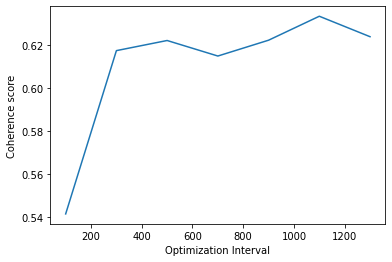

In [45]:
# Show graph
limit=1350; start=100; step=200;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Optimization Interval")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [46]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Interval =", m, 'Coherence: ', round(cv, 4))

Interval = 100 Coherence:  0.5414
Interval = 300 Coherence:  0.6174
Interval = 500 Coherence:  0.6221
Interval = 700 Coherence:  0.6149
Interval = 900 Coherence:  0.6223
Interval = 1100 Coherence:  0.6334
Interval = 1300 Coherence:  0.6239


In [49]:
# Coherence for 10-topic model, 50-alpha (default), 2500-iteration model, 1100-optimization-interval model
print(coherence_values[6])

# Topics for 10-topic model, 50-alpha (default), 2500-iteration model, 1100-optimization-interval model
malletModel_10a5i25o11 = model_list[6]
model_topics_10a5i25o11 = malletModel_10a5i25o11.show_topics(formatted=False)
pprint(sorted(malletModel_10a5i25o11.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
MalletLDA10a5i25o11 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_10a5i25o11)

# Visualize the topics
pyLDAvis.enable_notebook()
vis10a5i25o11 = pyLDAvis.gensim.prepare(MalletLDA10a5i25o11, corpus, id2word, sort_topics=False)
vis10a5i25o11

0.6239057003091281
[(0,
  '0.130*"dinner" + 0.128*"tea" + 0.061*"breakfast" + 0.039*"bath" + '
  '0.034*"bread" + 0.029*"clothe" + 0.023*"washing" + 0.021*"cake" + '
  '0.019*"lot" + 0.019*"fish" + 0.017*"meat" + 0.015*"job" + 0.012*"pain" + '
  '0.011*"beach" + 0.010*"milk" + 0.009*"bird" + 0.009*"goat" + 0.009*"mutton" '
  '+ 0.008*"potato" + 0.008*"garden"'),
 (1,
  '0.090*"town" + 0.080*"port" + 0.058*"pound" + 0.044*"train" + 0.028*"mill" '
  '+ 0.026*"church" + 0.022*"meeting" + 0.021*"land" + 0.015*"ship" + '
  '0.014*"account" + 0.014*"wife" + 0.012*"doctor" + 0.011*"board" + '
  '0.009*"college" + 0.009*"school" + 0.008*"arrangement" + 0.008*"steamer" + '
  '0.008*"bower" + 0.008*"committee" + 0.007*"purchase"'),
 (2,
  '0.086*"letter" + 0.048*"wheat" + 0.034*"flour" + 0.031*"club" + '
  '0.027*"wife" + 0.022*"office" + 0.022*"bank" + 0.018*"pound" + '
  '0.017*"party" + 0.016*"price" + 0.015*"ton" + 0.015*"paper" + 0.014*"sale" '
  '+ 0.013*"whist" + 0.012*"share" + 0.012*"ne

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.185711  0.166436       1        1  10.885537
1      0.235892 -0.092283       2        1  10.337563
2      0.307790  0.073351       3        1  10.084951
3     -0.069955 -0.225760       4        1   9.778441
4     -0.054916 -0.275106       5        1   9.164329
5     -0.170219  0.238024       6        1  10.040863
6     -0.082710 -0.123352       7        1   9.883595
7      0.247010  0.154597       8        1   9.980757
8     -0.125395  0.004791       9        1   9.943048
9     -0.101786  0.079301      10        1   9.900915, topic_info=       Term        Freq       Total Category  logprob  loglift
29   dinner  750.000000  750.000000  Default  30.0000  30.0000
22      tea  551.000000  551.000000  Default  29.0000  29.0000
1       bed  532.000000  532.000000  Default  28.0000  28.0000
60     home  762.000000  762.000000  Default  27.0000  27.0000
33    horse  520.000000  520.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
119   chair   23.273915   30.230538  Topic10  -5.1218   2.0510
202    foot   29.621347   46.108162  Topic10  -4.8806   1.8700
63     note   33.852968   62.099417  Topic10  -4.7471   1.7058
111   house   32.795063  382.483179  Topic10  -4.7789  -0.1439
538  return   19.042294   68.593645  Topic10  -5.3225   1.0310

[731 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
453       3  1.006523       abbage
2814      2  1.004512      absence
2799      2  1.004512      account
0         6  1.019883         ache
3246      8  1.029235  adjournment
...     ...       ...          ...
2643      5  0.976935       wright
340       6  0.959545      writing
340       9  0.022315      writing
340      10  0.022315      writing
1317      6  0.959890       yester

[949 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [50]:
MalletLDA10a5i25o11.save('20240701_PhD_TopicDiaChkMAL10a5i25o13')
pyLDAvis.save_html(vis10a5i25o11, '20240701_PhD_TopicDiaChkMAL10a5i25o13.html')

In [64]:
#model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=7, alpha=37, id2word=id2word, random_seed=100, optimize_interval=550)
#coherencemodel = CoherenceModel(model=model, coherence='c_v', dictionary=id2word, corpus=corpus, texts=data_lemmatizedNouns)
#coherencemodel.get_coherence()

# Topics for alpha-37 model, 7-topic model, 1K iterations, 550 optimization interval
#malletModel_07a37i1ko55 = model
#model_topics_07a37i1ko55 = malletModel_07a37i1ko55.show_topics(formatted=False)
#pprint(sorted(malletModel_07a37i1ko55.print_topics(num_words=20)))

# Convert results to lda model format for visualization.
#MalletLDA07a37i1ko55 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_07a37i1ko55)

# Visualize the topics
#pyLDAvis.enable_notebook()
#vis07a37i1ko55 = pyLDAvis.gensim.prepare(MalletLDA07a37i1ko55, corpus, id2word, sort_topics=False)
#vis07a37i1ko55